<a href="https://colab.research.google.com/github/Jamal-1018/Cardiovascular_Risk_Prediction_Classification/blob/main/Cardiovascular_Risk_Prediction_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Cardiovascular Risk Prediction**



##### **Project Type**    - **Classification**
##### **Contribution**    - **Individual**
##### **Team Member**     - **Mohammad Jamaluddin**

# **Project Summary -**

The goal of this project was to use machine learning techniques to predict the 10-year risk of future coronary heart disease (CHD) in patients using data from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The dataset provided information on over 4,000 patients and included 15 attributes, each representing a potential risk factor for CHD. These attributes included demographic, behavioral, and medical risk factors.

To prepare the data for analysis, extensive preprocessing was performed to clean and transform the data. This included handling missing values using median, mode, and KNN imputation techniques, as well as identifying and removing outliers using the Interquartile Range (IQR) method. Skewed continuous variables were also transformed using log and square root transformations to reduce skewness and improve model performance.

Feature selection was performed using variance inflation factor to remove multicollinearity and a new feature called pulse pressure was created to capture the relationship between systolic and diastolic blood pressure. Redundant columns were also removed to simplify the dataset. The most important features for predicting CHD risk were identified as ‘age’, ‘sex’, ‘education’, ‘cigs_per_day’, ‘bp_meds’, ‘prevalent_stroke’, ‘prevalent_hyp’, ‘diabetes’, ‘total_cholesterol’, ‘bmi’, ‘heart_rate’, ‘glucose’, and ‘pulse_pressure’.

To handle the imbalanced nature of the dataset, the SMOTE combined with Tomek links undersampling technique was used to balance the class distribution and improve model performance. The data was also scaled using standard scalar method to ensure that all features were on the same scale.

Several machine learning models were evaluated on their performance on the primary evaluation metric of recall. After careful analysis, The logistic regression was chosen as the final prediction model because it had the highest recall score among the models evaluated. By selecting a model with a high recall score, the goal was to correctly identify as many patients with CHD risk as possible, even if it meant having some false positives.

Overall, this project demonstrated the potential of machine learning techniques to accurately predict CHD risk in patients using data from a cardiovascular study. By carefully preprocessing and transforming the data, selecting relevant features, and choosing an appropriate model based on its performance on a relevant evaluation metric, it was possible to achieve a positive business impact by accurately predicting CHD risk in patients.

# **GitHub Link -**

https://github.com/Jamal-1018/Cardiovascular_Risk_Prediction_Classification/blob/main/Cardiovascular_Risk_Prediction_Classification.ipynb

# **Problem Statement**


The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients demographic, behavioral, and medical risk factors.. It includes over 4,000 records and 15 attributes. Each attribute is a potential risk factor.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from datetime import datetime as dt

#for plotting charts
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for statistical tests
from scipy.stats import chi2_contingency,chi2

# for imputing the missing values
from sklearn.impute import KNNImputer
from sklearn.feature_selection import chi2


# For multicolinearity of VIF technique
from statsmodels.stats.outliers_influence import variance_inflation_factor

# For train test of the data
from sklearn.model_selection import train_test_split

# For scaling the data
from sklearn.preprocessing import StandardScaler

# For handling imbalanced dataset
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

# For metrics of the model
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report

# For Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RepeatedStratifiedKFold
import xgboost as xgb
from xgboost import XGBClassifier


# For cross validation and hyper parameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
path = '/content/drive/MyDrive/ALMABETTER CAPSTONE PROJECTS/CLASSIFICATION_cardiovascular_Risk_prediction/data_cardiovascular_risk.csv'

DATA = pd.read_csv(path)

### Dataset First View

In [4]:
# Dataset First Look
DATA.head(5)  #First 5 rows

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [5]:
# Data last 5 rows
DATA.tail(5)

id  age  education sex is_smoking  cigsPerDay  BPMeds  \
3385  3385   60        1.0   F         NO         0.0     0.0   
3386  3386   46        1.0   F         NO         0.0     0.0   
3387  3387   44        3.0   M        YES         3.0     0.0   
3388  3388   60        1.0   M         NO         0.0     NaN   
3389  3389   54        3.0   F         NO         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
3385                0             0         0    261.0  123.5   79.0  29.28   
3386                0             0         0    199.0  102.0   56.0  21.96   
3387                0             1         0    352.0  164.0  119.0  28.92   
3388                0             1         0    191.0  167.0  105.0  23.01   
3389                0             0         0    288.0  124.0   77.0  29.88   

      heartRate  glucose  TenYearCHD  
3385       70.0    103.0           0  
3386       80.0     84.0           0  
3387       73.0     72.0           1  
3388       80.0     85.0           0  
3389       79.0     92.0           0

### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
print(f'The number of rows in the data is : {DATA.shape[0]}')
print(f'The number of columns in the data is : {DATA.shape[1]}')

The number of rows in the data is : 3390
The number of columns in the data is : 17


### Dataset Information

In [7]:
# Dataset Info
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [8]:
# Creating copy of dataset
df = DATA.copy()

In [9]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

<Axes: >

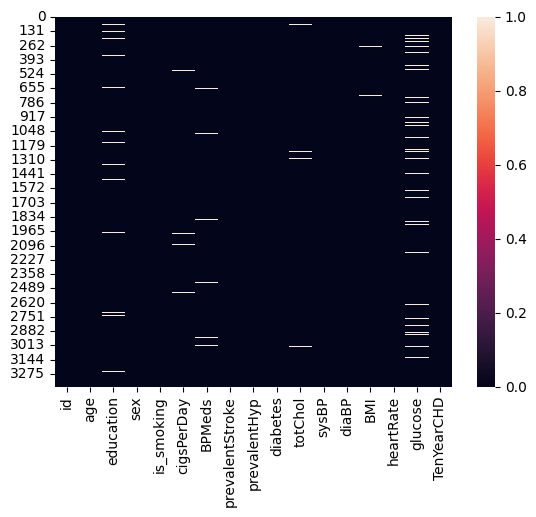

In [11]:
# Visualizing the missing values
sns.heatmap(df.isnull())

### What did you know about your dataset?

- Dataset have 3390 rows and 17 columns and the TenYearCHd is dependent variable.
- It does not have any duplicate rows.

- It contains missing values in education,CigsPerDay,BPMeds.totChol,BMI,glucose columns.

## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [13]:
# Dataset Describe
df.describe(include = 'all').T

count unique  top  freq        mean         std    min  \
id               3390.0    NaN  NaN   NaN      1694.5  978.753033    0.0   
age              3390.0    NaN  NaN   NaN   49.542183    8.592878   32.0   
education        3303.0    NaN  NaN   NaN    1.970936    1.019081    1.0   
sex                3390      2    F  1923         NaN         NaN    NaN   
is_smoking         3390      2   NO  1703         NaN         NaN    NaN   
cigsPerDay       3368.0    NaN  NaN   NaN    9.069477   11.879078    0.0   
BPMeds           3346.0    NaN  NaN   NaN    0.029886    0.170299    0.0   
prevalentStroke  3390.0    NaN  NaN   NaN     0.00649    0.080309    0.0   
prevalentHyp     3390.0    NaN  NaN   NaN    0.315339    0.464719    0.0   
diabetes         3390.0    NaN  NaN   NaN    0.025664    0.158153    0.0   
totChol          3352.0    NaN  NaN   NaN  237.074284    45.24743  107.0   
sysBP            3390.0    NaN  NaN   NaN   132.60118    22.29203   83.5   
diaBP            3390.0    NaN  NaN   NaN   82.883038   12.023581   48.0   
BMI              3376.0    NaN  NaN   NaN   25.794964    4.115449  15.96   
heartRate        3389.0    NaN  NaN   NaN   75.977279   11.971868   45.0   
glucose          3086.0    NaN  NaN   NaN    82.08652   24.244753   40.0   
TenYearCHD       3390.0    NaN  NaN   NaN    0.150737    0.357846    0.0   

                    25%     50%      75%     max  
id               847.25  1694.5  2541.75  3389.0  
age                42.0    49.0     56.0    70.0  
education           1.0     2.0      3.0     4.0  
sex                 NaN     NaN      NaN     NaN  
is_smoking          NaN     NaN      NaN     NaN  
cigsPerDay          0.0     0.0     20.0    70.0  
BPMeds              0.0     0.0      0.0     1.0  
prevalentStroke     0.0     0.0      0.0     1.0  
prevalentHyp        0.0     0.0      1.0     1.0  
diabetes            0.0     0.0      0.0     1.0  
totChol           206.0   234.0    264.0   696.0  
sysBP             117.0   128.5    144.0   295.0  
diaBP              74.5    82.0     90.0   142.5  
BMI               23.02   25.38    28.04    56.8  
heartRate          68.0    75.0     83.0   143.0  
glucose            71.0    78.0     87.0   394.0  
TenYearCHD          0.0     0.0      0.0     1.0

### Variables Description

Demographic:

- id : id of the patitent

- age : age of the patient

- education : education of the patient

- sex : sex of the patient (M/F)

Behaviour:

- is_smoking : If the patient has the habit of smoking (YES/NO)

- cigsPerDay : The average number of ciagrettes that the patient smokes `continuous`

Medical History:

- BPMeds : Whether or not the patient takes the Blood Pressure medication or not (1/0)

- prevalentStroke : Whether or not  the patient has any history of stroke (1/0)

- prevalentHyp : Whether or not the patient has any history of hypertension (1/0)

- diabetes : WHether or not the patient has diabetes (1/0)

Medical (Current) :

- totChol : Total Cholestrol level `Continuous`

- sysBP : siastol levels in blood pressure `Continuous`

- diaBP : Diastol levels in blood pressure `continuous`

- BMI : Body Mass Index of the patient `Continuous`

- heartrate : Heart Rate of the patient `Continuous`

- glucose : Glucose levels of the patient `continuous`

Target variable:

- TenYearCHD : 10 year Coronary Heart Disease (1: Yes, 0: No) `dependent varaible`

### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print(f'the number of unique values in {i} is {df[i].nunique()}')

the number of unique values in id is 3390
the number of unique values in age is 39
the number of unique values in education is 4
the number of unique values in sex is 2
the number of unique values in is_smoking is 2
the number of unique values in cigsPerDay is 32
the number of unique values in BPMeds is 2
the number of unique values in prevalentStroke is 2
the number of unique values in prevalentHyp is 2
the number of unique values in diabetes is 2
the number of unique values in totChol is 240
the number of unique values in sysBP is 226
the number of unique values in diaBP is 142
the number of unique values in BMI is 1259
the number of unique values in heartRate is 68
the number of unique values in glucose is 132
the number of unique values in TenYearCHD is 2


## 3. ***Data Wrangling***

### Data Wrangling Code

In [15]:
# dropping id column
df.drop('id', axis = 1, inplace = True )

In [16]:
# renaming the columns
df.rename(columns = {'cigsPerDay': 'cigs_per_day','BPMeds':'bp_meds','prevalentStroke': 'prevalent_stroke',
           'prevalentHyp' : 'prevalent_hyp','totChol' : 'total_chol', 'sysBP' : 'sys_bp',
                     'diaBp' : 'dia_bp','BMI': 'bmi','heartRate': 'heart_rate','TenYearCHD' : 'ten_year_chd'},inplace = True)

In [17]:
# After renaming the columns
df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigs_per_day', 'bp_meds',
       'prevalent_stroke', 'prevalent_hyp', 'diabetes', 'total_chol', 'sys_bp',
       'diaBP', 'bmi', 'heart_rate', 'glucose', 'ten_year_chd'],
      dtype='object')

In [18]:
# categorizing the variables
dep_var = ['ten_year_chd']
dep_var

['ten_year_chd']

In [19]:
# continuous variables
cont_var = ['age','cigs_per_day','total_chol','sys_bp','diaBP','bmi','heart_rate','glucose']
cont_var

['age',
 'cigs_per_day',
 'total_chol',
 'sys_bp',
 'diaBP',
 'bmi',
 'heart_rate',
 'glucose']

In [20]:
# categorical variables
cat_var = [i for i in df.columns if i not in cont_var]
cat_var.remove('ten_year_chd')
cat_var

['education',
 'sex',
 'is_smoking',
 'bp_meds',
 'prevalent_stroke',
 'prevalent_hyp',
 'diabetes']

### What all manipulations have you done and insights you found?

- Column names have been renamed for the ease of use

- Categorized the continuous, dependent and cateforical variabes for futher analysis

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Visualization on dependent variable `ten_year_chd`

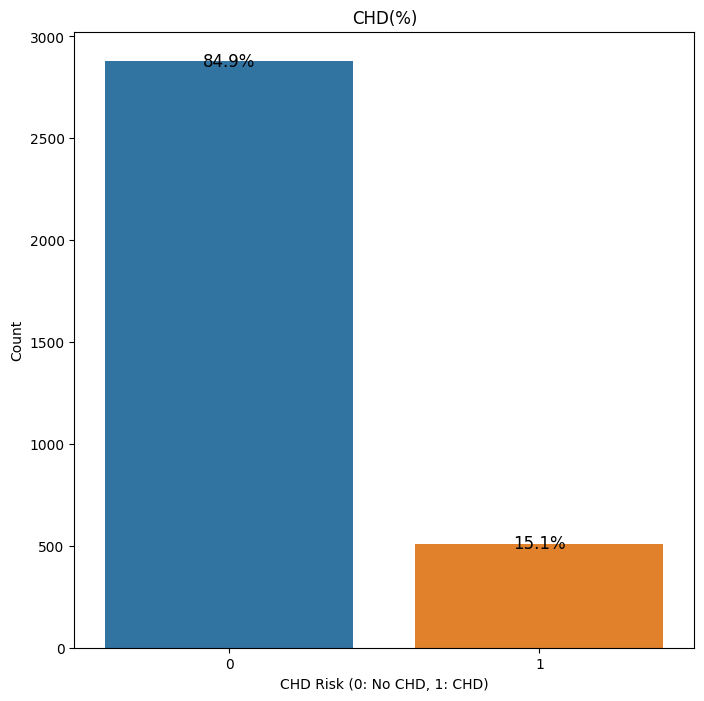

The No risk of CHD is: 2879
The Risk of CHD is: 511


In [21]:
# Plotting countplot on dependent variables
plt.figure(figsize = (8,8))
ax = sns.countplot(data = df, x = df['ten_year_chd'])
total = len(df.ten_year_chd)
for p in ax.patches:
  ax.annotate(f'{100* p.get_height()/total:.1f}%',(p.get_x() + p.get_width()/2,
              p.get_height()), ha ='center', va = 'center', fontsize = 12)

plt.xlabel('CHD Risk (0: No CHD, 1: CHD)')
plt.ylabel('Count')
plt.title('CHD(%)')
plt.show()

print(f'The No risk of CHD is: {df.ten_year_chd.value_counts()[0]}')
print(f'The Risk of CHD is: {df.ten_year_chd.value_counts()[1]}')

##### 1. Why did you pick the specific chart?

A countplot is a type of bar chart used in data visualization to display the count or frequency of categorical data. It's a straightforward and effective way to represent the distribution of categorical variables.We used this chart to represent the dependent variables and its distribution.

##### 2. What is/are the insight(s) found from the chart?

From the above analysis, we have the following insights:
- The values representing 'No risk of CHD' account for the majority at 84.9%, with a total of 2,879 occurrences i.e negative.
- Conversely, the values representing 'Risk of CHD' are in the minority at 15.1%, totaling 511 occurrences i.e positive.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The classification of patients into positive and negative categories based on their health risk is crucial for building predictive models. This classification provides valuable insights for healthcare industries, guiding the development of effective strategies and interventions. However, it's essential to note that failing to address a high risk of CHD in a patient could have a negative impact on both the patient's health and the healthcare businesses as a whole.

#### Chart - 2  Visualization of distribution and box plots on continuous variables

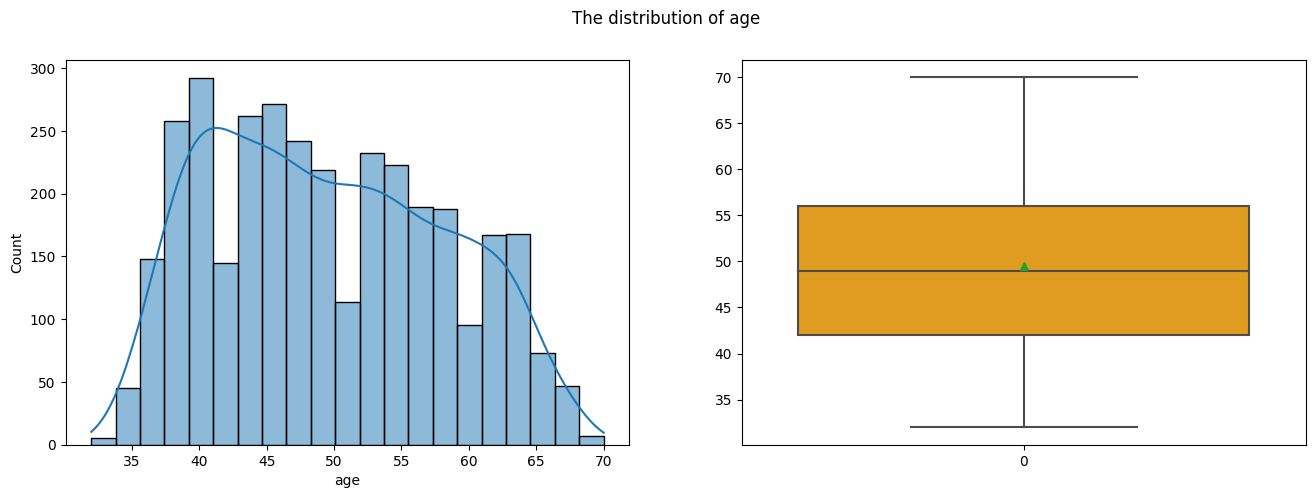

<Figure size 640x480 with 0 Axes>

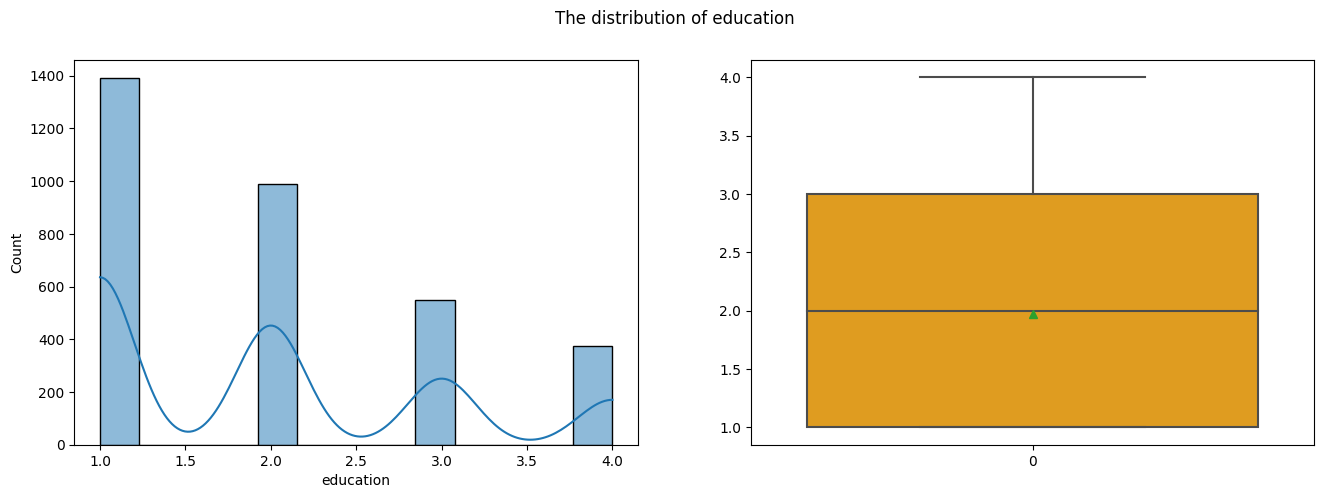

<Figure size 640x480 with 0 Axes>

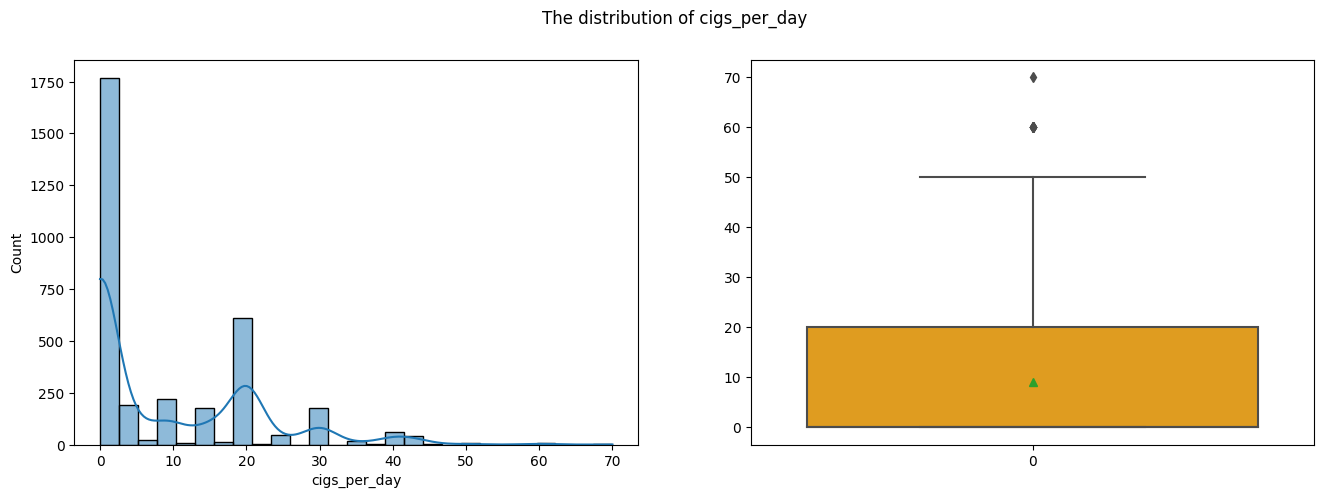

<Figure size 640x480 with 0 Axes>

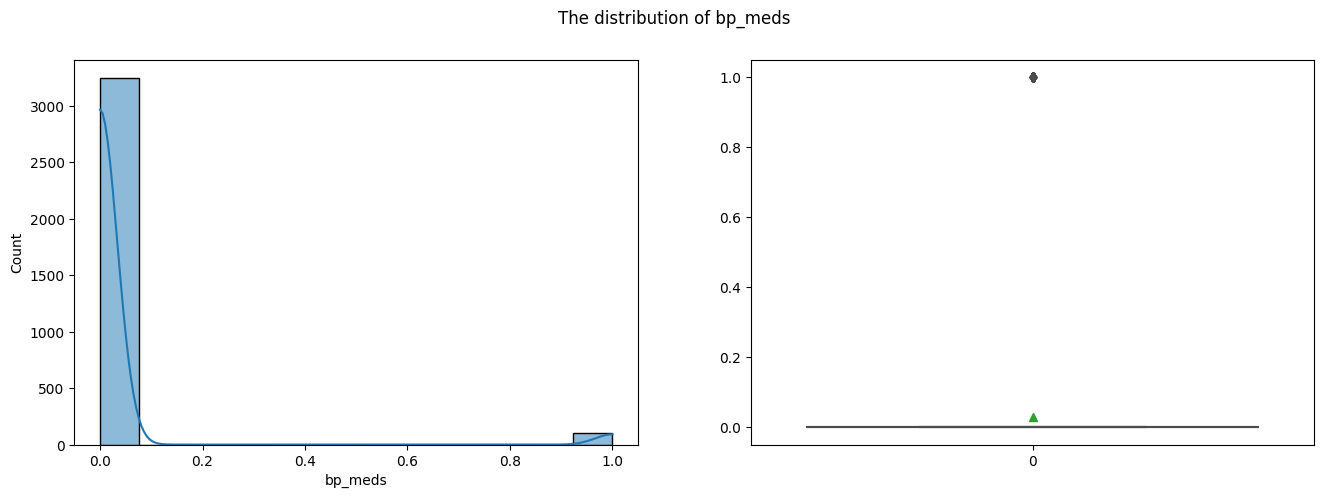

<Figure size 640x480 with 0 Axes>

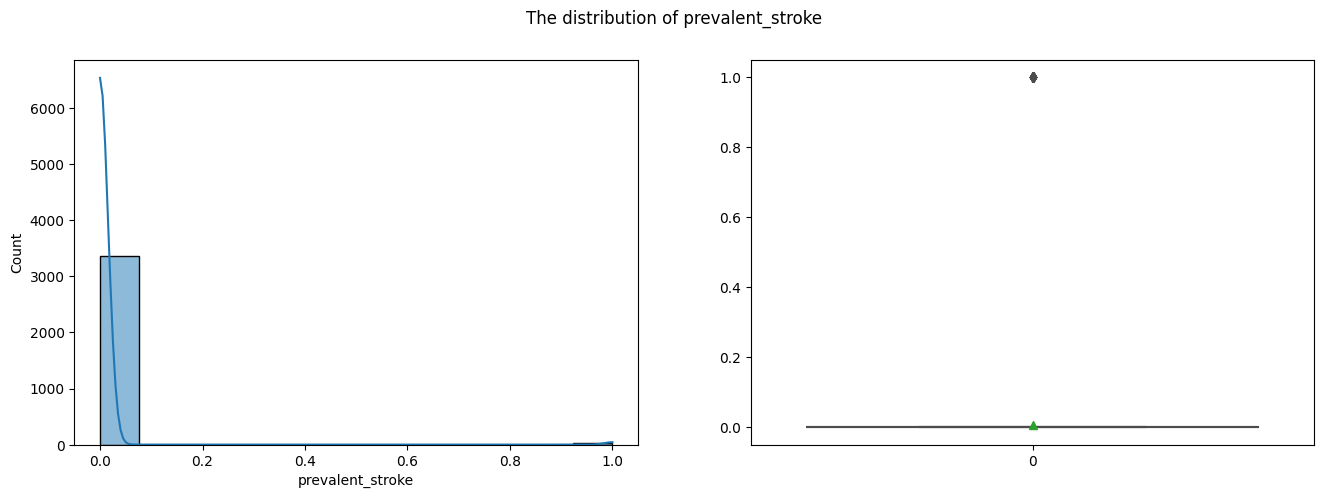

<Figure size 640x480 with 0 Axes>

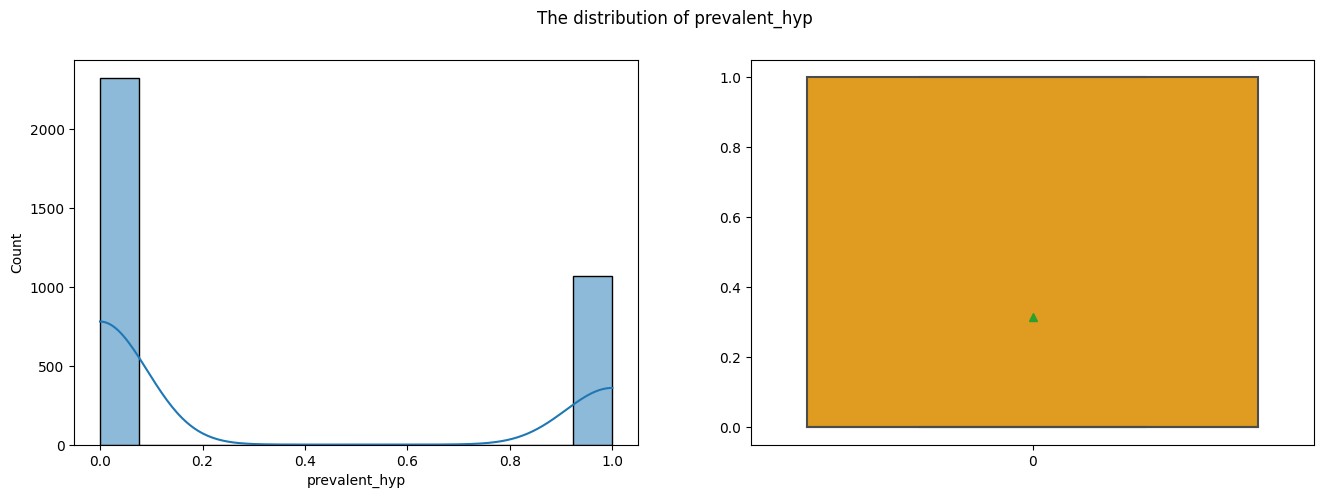

<Figure size 640x480 with 0 Axes>

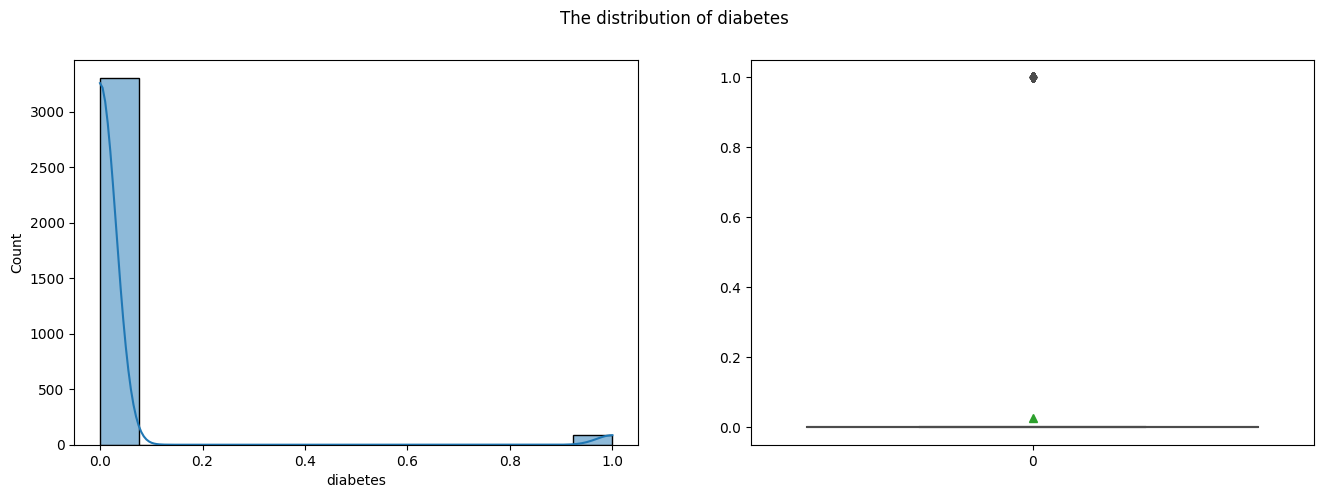

<Figure size 640x480 with 0 Axes>

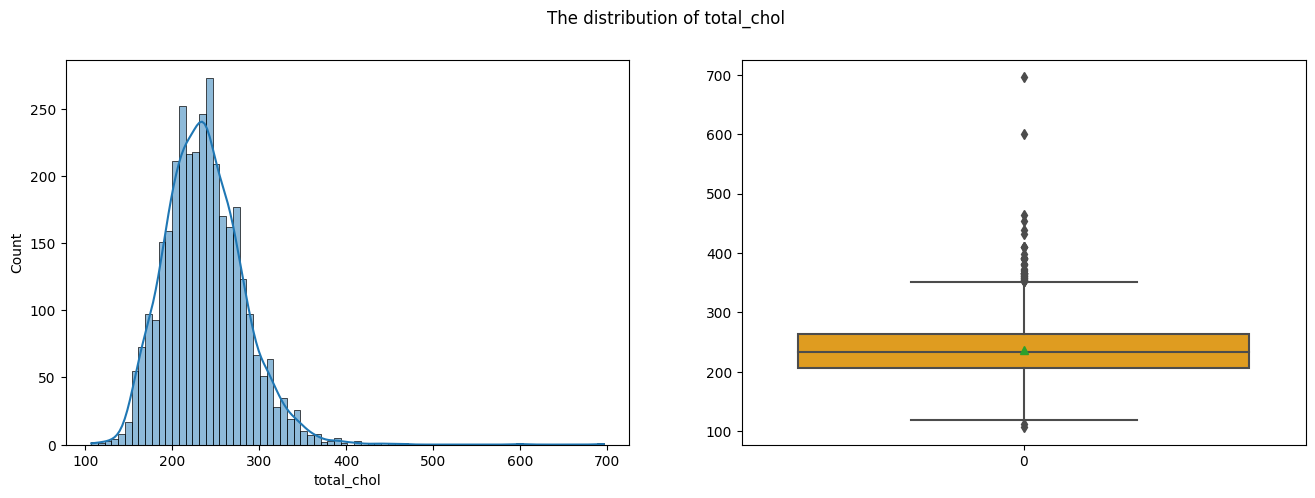

<Figure size 640x480 with 0 Axes>

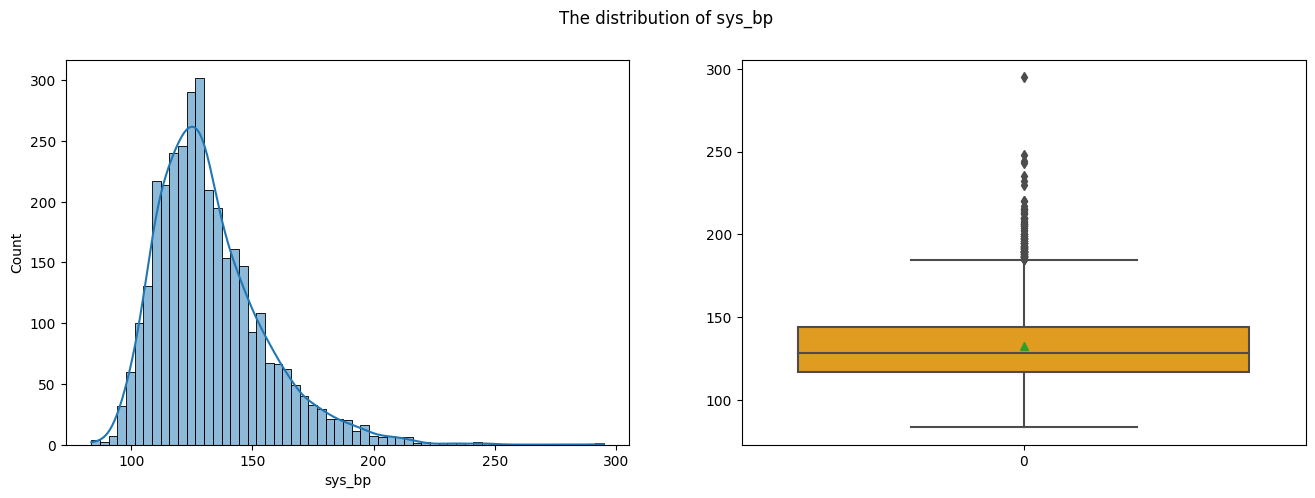

<Figure size 640x480 with 0 Axes>

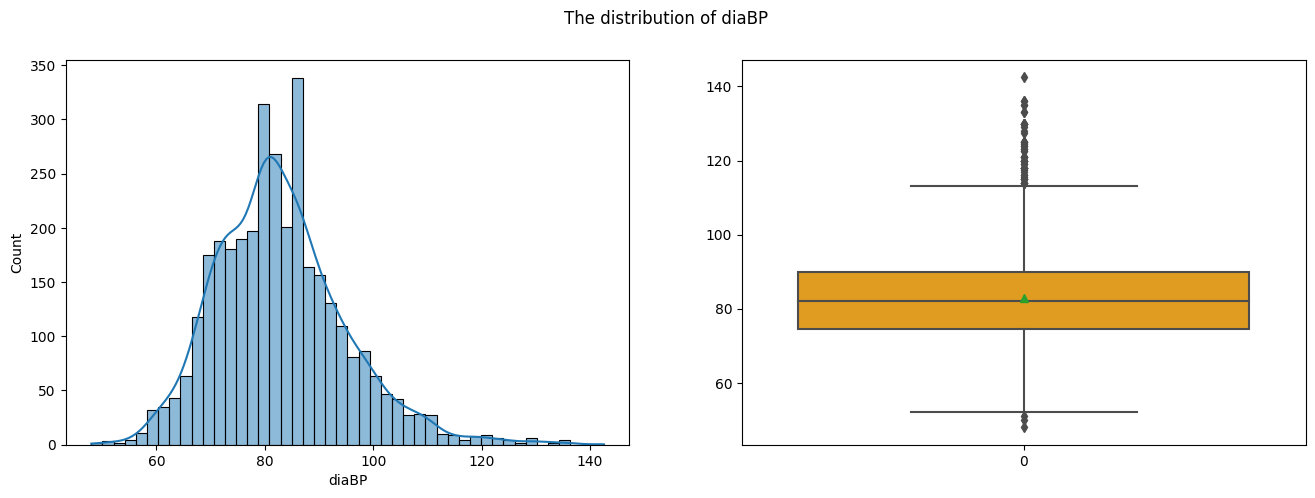

<Figure size 640x480 with 0 Axes>

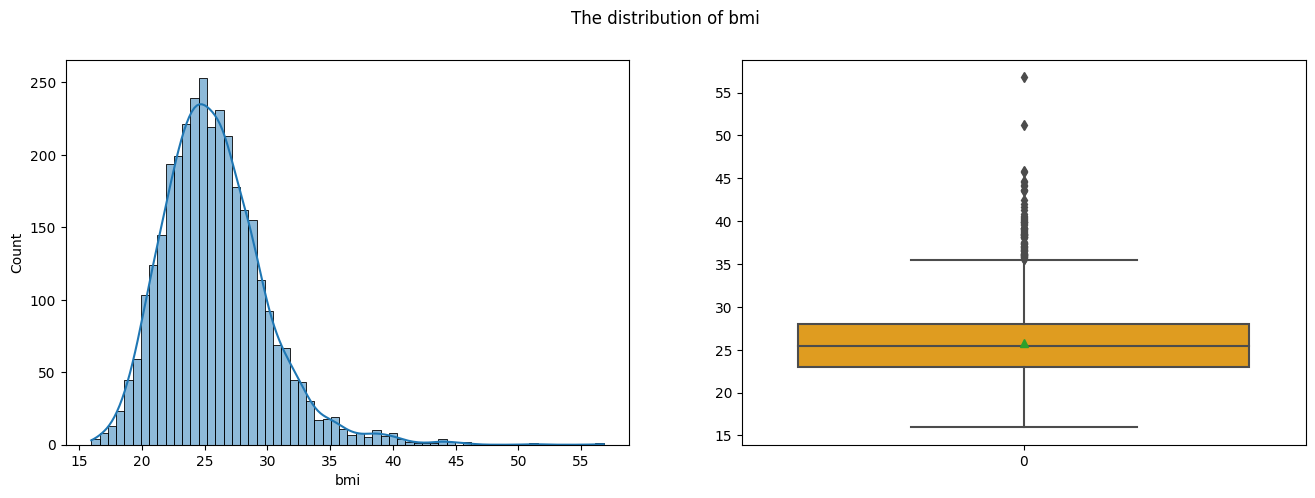

<Figure size 640x480 with 0 Axes>

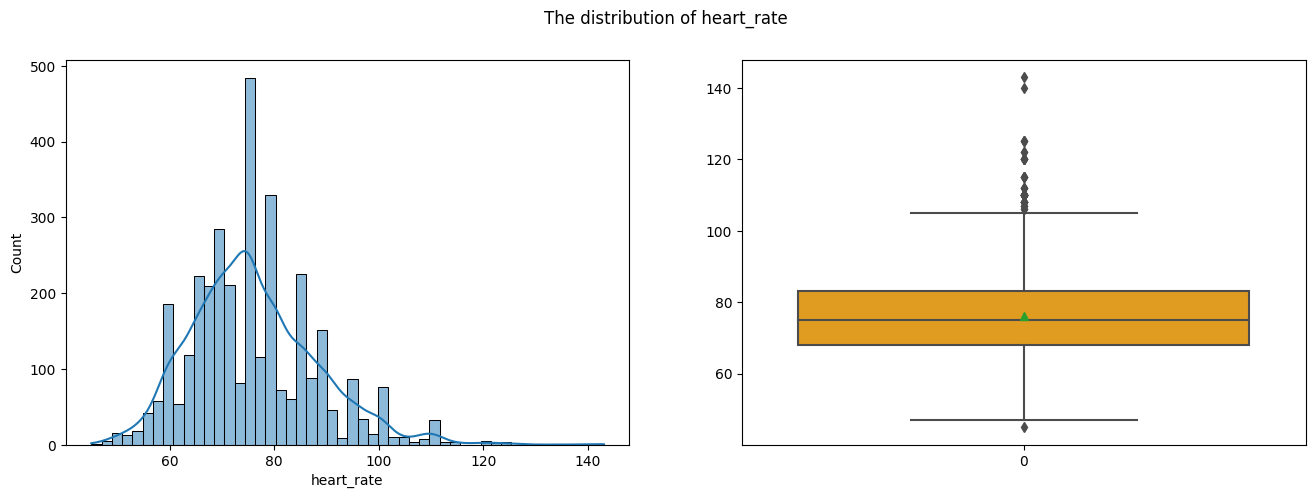

<Figure size 640x480 with 0 Axes>

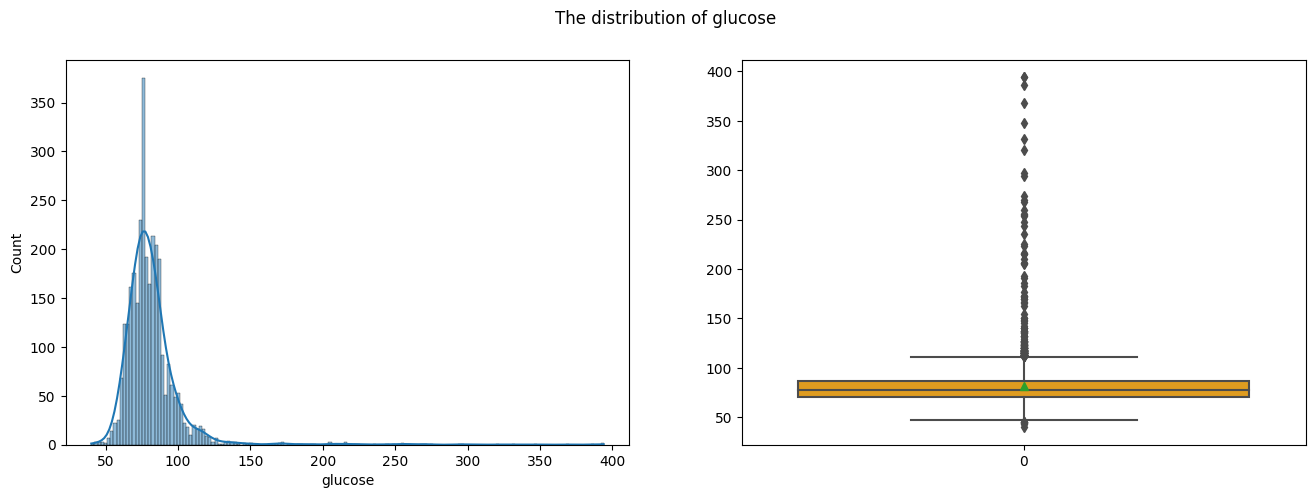

<Figure size 640x480 with 0 Axes>

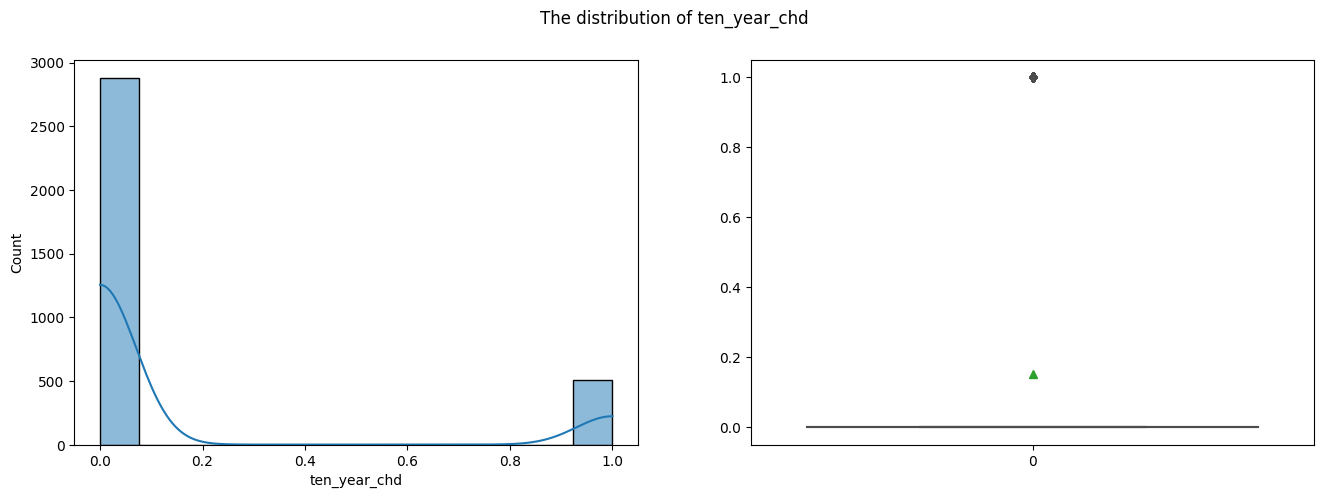

<Figure size 640x480 with 0 Axes>

In [22]:
#plotting of distribution ad boxplots
for col in df.describe().columns:
  fig,axes = plt.subplots(nrows = 1, ncols =2 , figsize = ( 16,5))
  sns.histplot(df[col], ax = axes[0],kde = True)
  sns.boxplot(df[col], ax = axes[1],showmeans = True, color = 'orange')
  fig.suptitle(f'The distribution of {col}')
  plt.show()
  plt.tight_layout()

##### 1. Why did you pick the specific chart?

A histplot is a type of chart that displays the distribution of a dataset. It is a graphical representation of the data that shows how often each value or group of values occurs. Histplots are useful for understanding the distribution of a dataset and identifying patterns or trends in the data. It is also useful when dealing with large data sets (greater than 100 observations). It can help detect any unusual observations (outliers) or any gaps in the data.

Thus, I used the histogram plot to analysis the variable distributions over the whole dataset whether it's symmetric or not.

A boxplot is used to summarize the key statistical characteristics of a dataset, including the median, quartiles, and range, in a single plot. Boxplots are useful for identifying the presence of outliers in a dataset, comparing the distribution of multiple datasets, and understanding the dispersion of the data. They are often used in statistical analysis and data visualization.

Thus, for each numerical varibale in the given dataset, I used box plot to analyse the outliers and interquartile range including mean, median, maximum and minimum value.

##### 2. What is/are the insight(s) found from the chart?

From the above analysis, we have observed that the majority of the variables in the dataset exhibit a normal distribution. However, some variables appear to be skewed, indicating a departure from normality. Additionally, there are outliers present in certain variables as well

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights are important for understanding the characteristics of the data and can inform our data preprocessing and modeling decisions.

#### Chart - 3 Visulaization of categorical variables

In [23]:
df['ten_year_chd'].value_counts()

0    2879
1     511
Name: ten_year_chd, dtype: int64

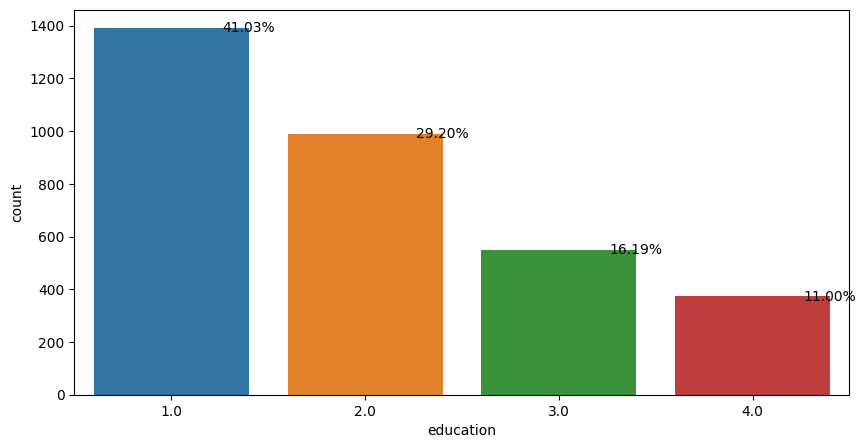

<Figure size 640x480 with 0 Axes>

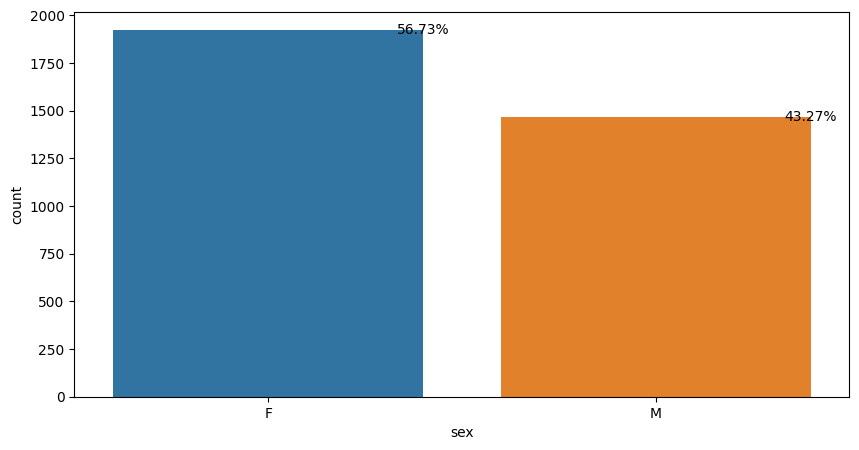

<Figure size 640x480 with 0 Axes>

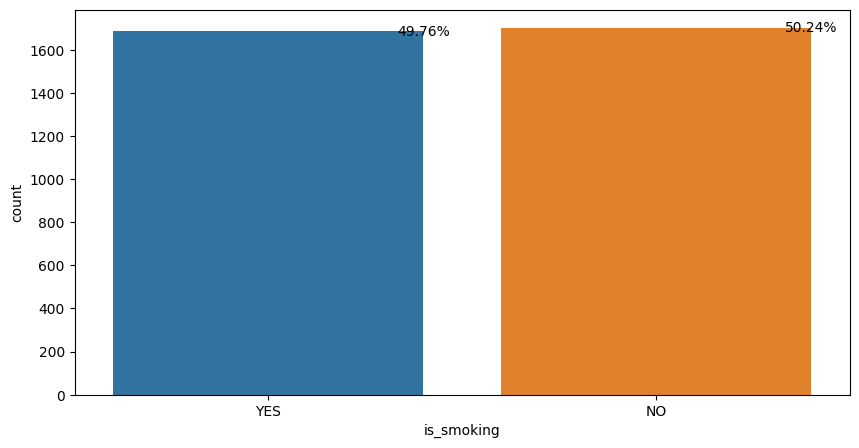

<Figure size 640x480 with 0 Axes>

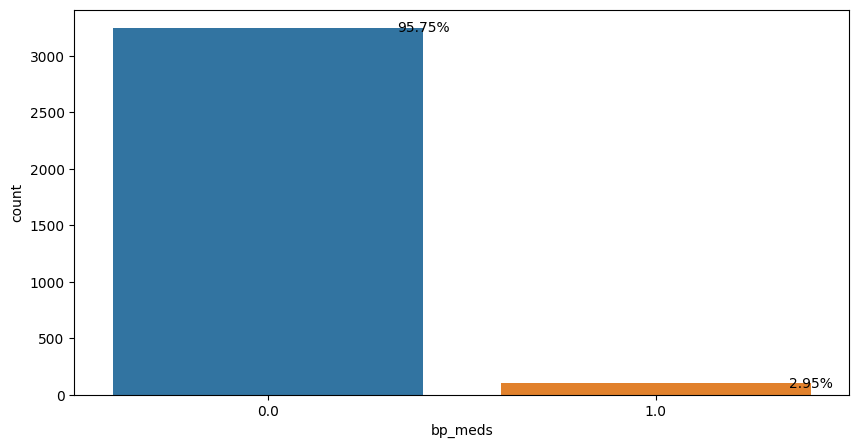

<Figure size 640x480 with 0 Axes>

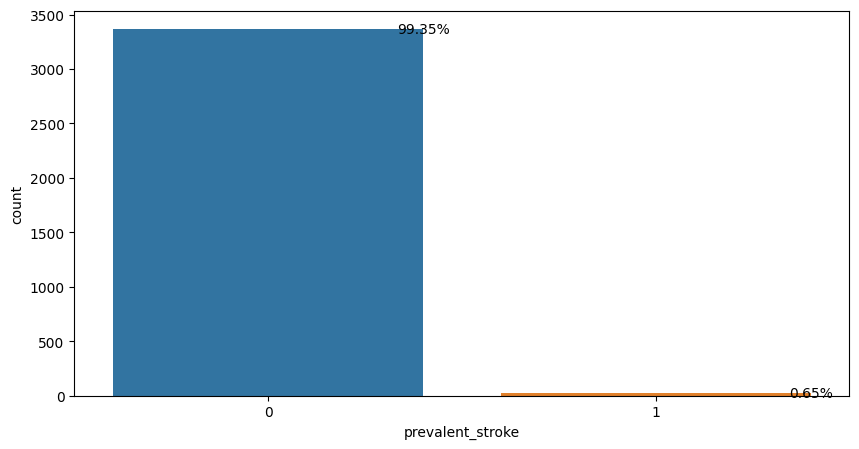

<Figure size 640x480 with 0 Axes>

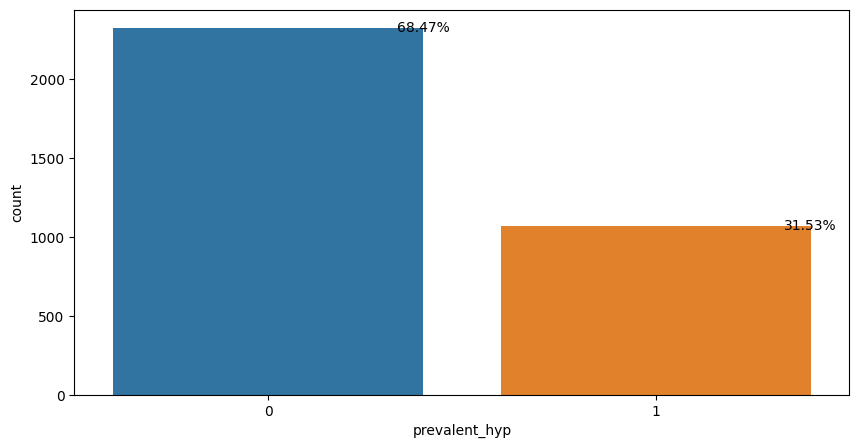

<Figure size 640x480 with 0 Axes>

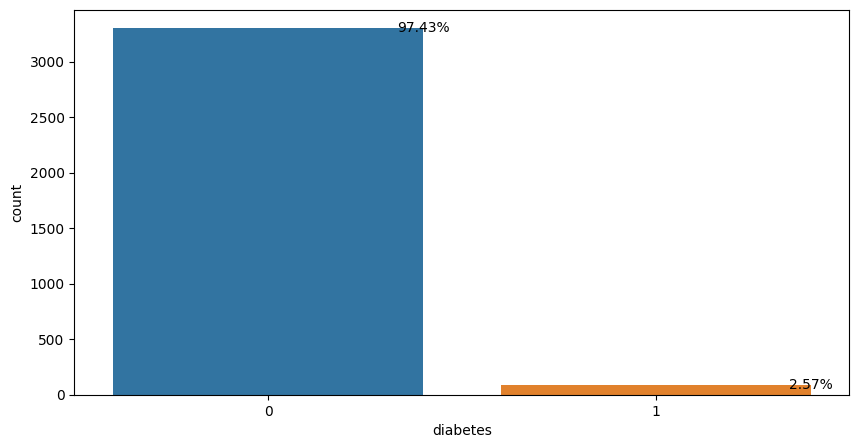

<Figure size 640x480 with 0 Axes>

In [24]:
# Plotting of counter plot on categorical columns
for i in cat_var:
  plt.figure(figsize = (10,5))
  p = sns.countplot(x = df[i], data =df)
  total_len = len(df[i])
  for i in p.patches:
    p.annotate(f'{(100 * i.get_height()/total_len):.2f}%',((i.get_x()+i.get_width()),(i.get_height())),
               ha = 'center', va = 'center', fontsize = 10)
  plt.show()
  plt.tight_layout()

##### 1. Why did you pick the specific chart?

A countplot is a type of bar chart used in data visualization to display the count or frequency of categorical data. It's a straightforward and effective way to represent the distribution of categorical variables.Here we used this char on all categorical columns to represent the distribution of the data.

##### 2. What is/are the insight(s) found from the chart?

From the above analysis, the following insights are observed:

- The 'education' variable is most prominently represented by category 1, accounting for 41.03% of the data, while the other categories each have less than 29% representation.

- The 'sex' variable exhibits a well-balanced distribution, with 43.2% for males and 56.7% for females.

- The 'smoker' variable also demonstrates a balanced distribution, with 49.76% being smokers and 50.24% non-smokers.

- On the other hand, variables such as 'bp_meds,' 'prevalent_stroke,' 'prevalent_hypertension,' and 'diabetes' show an imbalanced distribution of data.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights have the potential to create a positive business impact.However, the extent of the impact depends on how these insights are leveraged and applied to meet specific business objectives. Understanding the distribution of variables is a crucial step in data-driven decision-making and can lead to more informed and effective strategies.

#### Chart - 4 Visualization of categorical variables and distribution

<Figure size 1000x800 with 0 Axes>

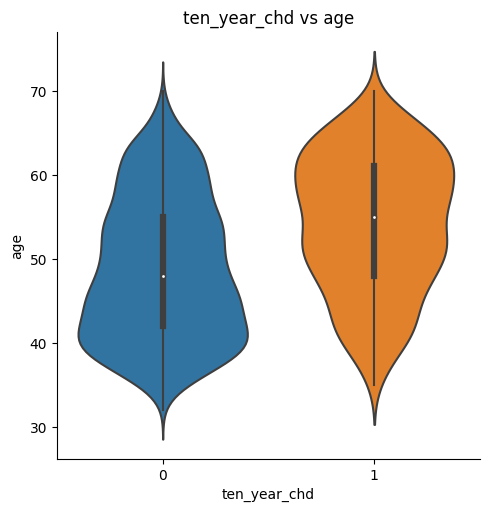

<Figure size 640x480 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

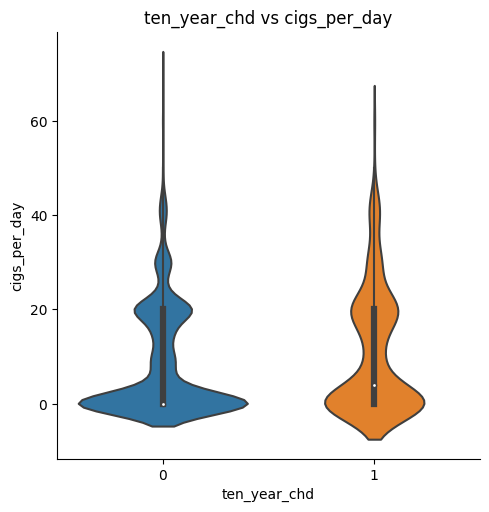

<Figure size 640x480 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

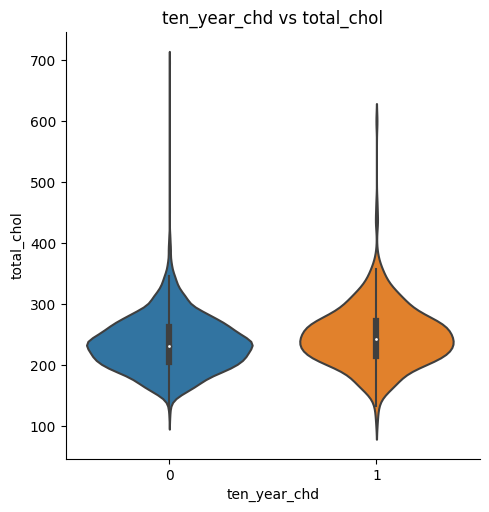

<Figure size 640x480 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

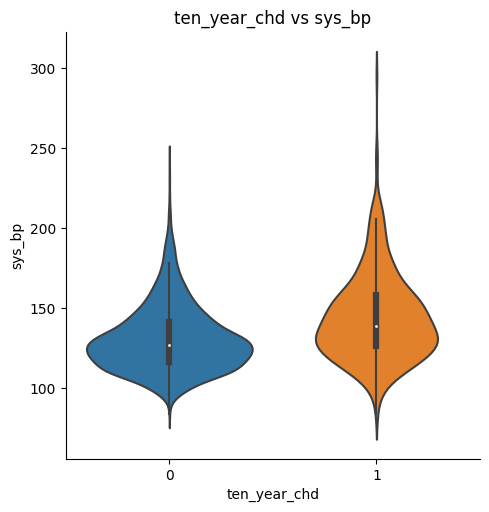

<Figure size 640x480 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

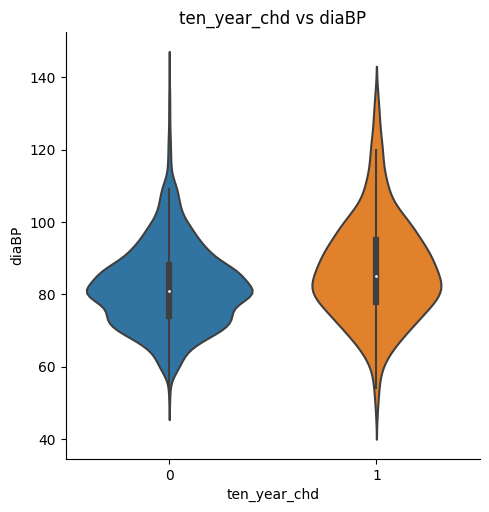

<Figure size 640x480 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

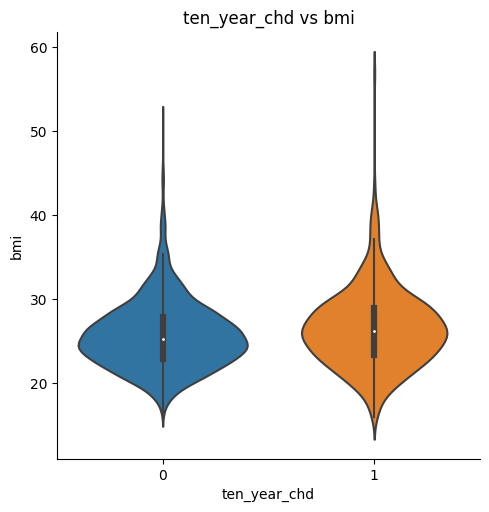

<Figure size 640x480 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

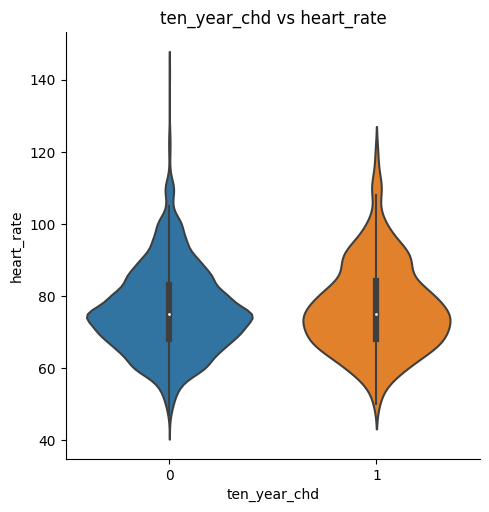

<Figure size 640x480 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

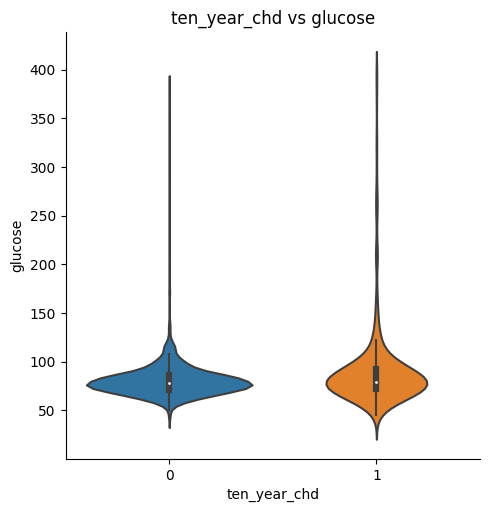

<Figure size 640x480 with 0 Axes>

In [25]:
# Plotting a categorical plot on all categorical variables
for i in cont_var:
  plt.figure(figsize = (10,8))
  sns.catplot(x = dep_var[0], y = i, data = df, kind = 'violin')
  plt.title(dep_var[0]+' vs '+ i)
  plt.show()
  plt.tight_layout()

##### 1. Why did you pick the specific chart?

The violin chart is a type of data visualization that combines aspects of a box plot and a kernel density plot. It is used to display the distribution and density of data across different categories or groups. Some features of the violin chart include:

- Shape and width: The shape of the violin represents the data distribution, typically displaying a mirrored, symmetrical shape. The width of the violin at different points indicates the density of data.

- Quartiles and median: The central "box" in the violin chart represents the interquartile range (IQR) and contains the median value. This provides insights into the spread and central tendency of the data.

Grouping and comparison: Violin charts can be grouped or arranged side by side to compare distributions across different categories or groups. This allows for visual comparisons of data distribution shapes, spreads, and densities.

Here, we used this chart on all continuous variables with dependent variable to observe the distribution and central tendency of the data.

##### 2. What is/are the insight(s) found from the chart?

Below are the insights:

-  Instances of a positive risk of CHD are higher for individuals with age values greater than 50 when compared to those with a negative risk of CHD.

- The density of 'cigsperday' values is higher in occurrences with a negative risk of CHD as opposed to those with a positive risk of CHD.

- The density of 'glucose' values is higher in occurrences with a negative risk of CHD as opposed to those with a positive risk of CHD.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the violin chart can potentially create a positive business impact by providing valuable information for decision-making. Understanding the distribution and density of data across different categories can help businesses identify patterns, trends, and potential areas of focus. For example, the insight that positive cases of ten-year CHD are higher in older people suggests the need for targeted preventive measures or specialized treatments for this demographic. Similarly, the insight regarding the relationship between smoking and negative cases of CHD can inform smoking cessation programs or campaigns to reduce the risk of CHD.

While the insights gained from the chart can be valuable, it's important to note that the impact on business growth would depend on various factors. The actual business impact would require further analysis and strategic implementation of these insights. Additionally, without specific business context and objectives, it is challenging to determine if there are any insights that would directly lead to negative growth. However, using the insights to better understand the distribution of health conditions and risk factors can potentially help businesses in the healthcare industry develop more effective strategies and interventions to improve patient outcomes and drive positive growth.

#### Chart - 5 Visualization of categorical variables with stacked bar charts

<Figure size 1000x800 with 0 Axes>

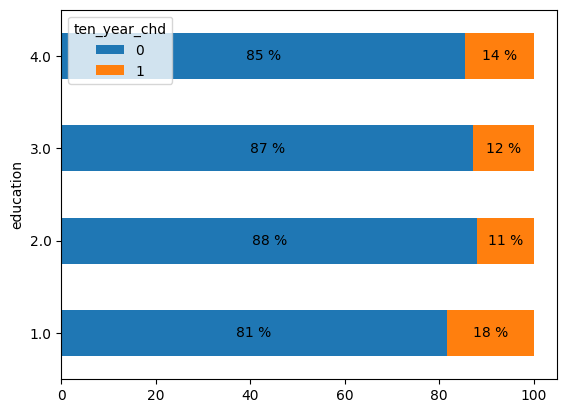

<Figure size 640x480 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

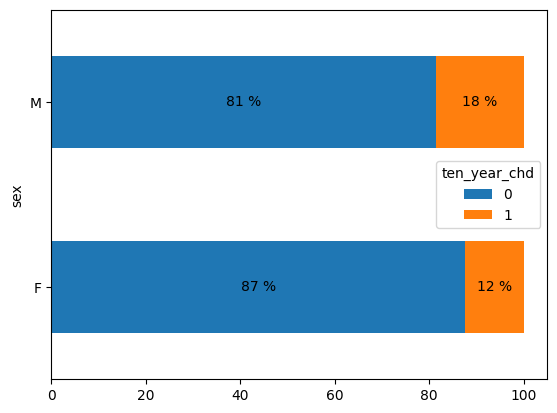

<Figure size 640x480 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

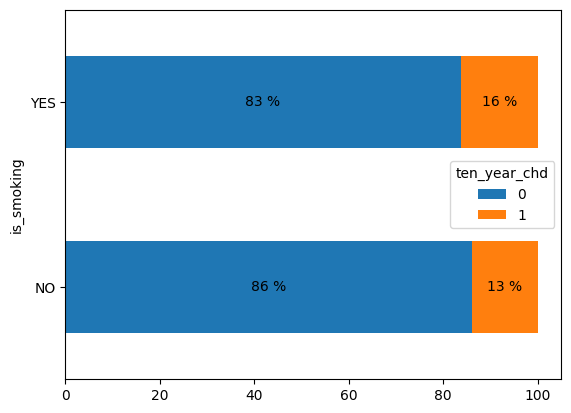

<Figure size 640x480 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

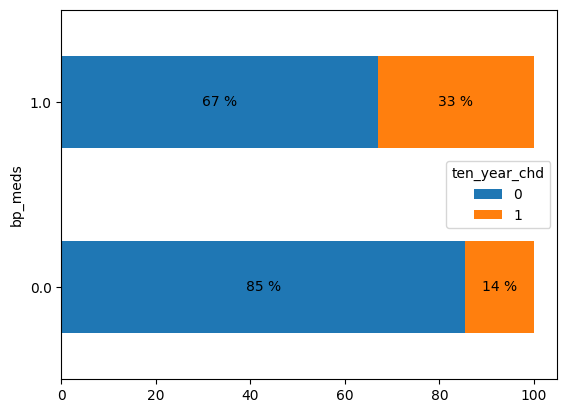

<Figure size 640x480 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

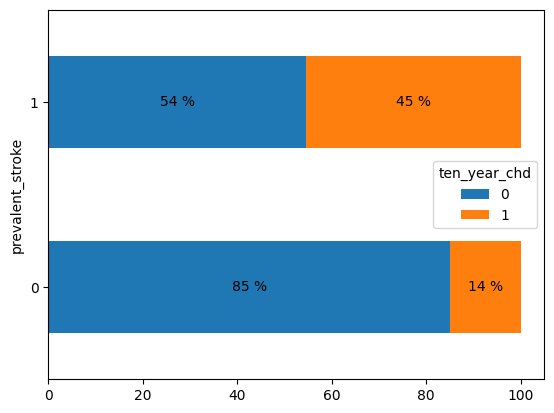

<Figure size 640x480 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

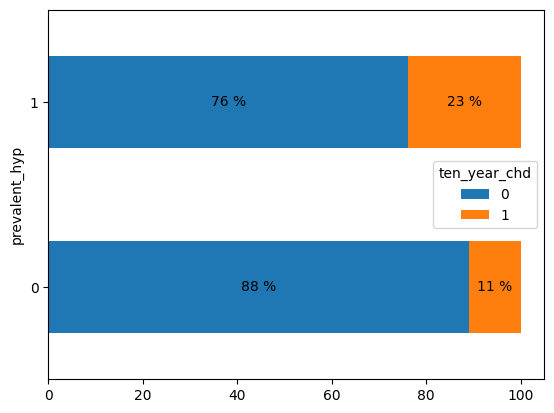

<Figure size 640x480 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

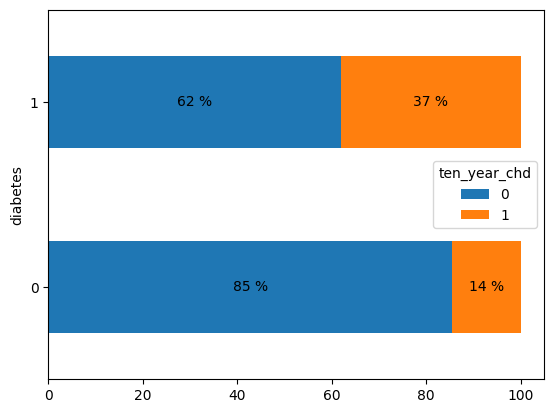

<Figure size 640x480 with 0 Axes>

In [26]:
#Plotting of stacked bar charts on categorical variables to observe percenatage of occurence of the dependent variables
for col in cat_var:
  grouped_data = df.groupby(col)['ten_year_chd'].value_counts(normalize  =True).unstack('ten_year_chd') * 100
  plt.figure(figsize = (10,8))
  grouped_data.plot.barh(stacked = True)

# plotting the graph to show percentages
  for ix, row in grouped_data.reset_index(drop = True).iterrows():
    cummulative = 0
    for element in row:
      if element > 0.1:
        plt.text(cummulative + element /2 ,
                 ix,
                 f"{int(element)} %",
                 ha = 'center',
                 va = 'center')
      cummulative += element
  plt.show()
  plt.tight_layout()

##### 1. Why did you pick the specific chart?

A horizontal stacked bar chart is a type of data visualization designed to illustrate the composition or proportion of various categories within a whole.The chart presents multiple categories or groups stacked horizontally, enabling straightforward visual comparisons of their relative proportions within the total. Each bar represents the whole, with its segments depicting the different categories or components.

##### 2. What is/are the insight(s) found from the chart?

From the above analysis, these are the below insights:
- The percentage of CHD is slightly higher in the 'education' variable's class 1.0 when compared to other classes of the variable.

- For the 'sex' and 'is_smoker' variables, it's noticeable that the CHD risk is slightly greater in the 'Male' class and 'Smoker: Yes' class.

- Among the other variables ('bp_meds,' 'prevalent_stroke,' 'prevalent_hypertension,' and 'diabetes'), the percentage of CHD risk is significantly higher for the 'Yes' classes when compared to the 'No' classes, respectively.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The chart reveals the distribution and composition of different categories in relation to the occurrence of CHD. These insights can guide businesses in developing targeted strategies and interventions to address specific demographic groups or risk factors. For example, businesses can design preventive measures, educational campaigns, or tailored treatments to reduce the occurrence of CHD in high-risk categories. By leveraging these insights, businesses in the healthcare industry can improve patient outcomes, enhance customer satisfaction, and drive positive growth.

There are no specific insights from the chart that directly lead to negative growth. However, it's important to consider the overall prevalence of CHD and the effectiveness of interventions. If the prevalence of CHD remains high across all categories and the implemented strategies fail to yield desired outcomes, it could potentially result in negative growth due to increased healthcare costs, decreased patient satisfaction, or reputational issues. Therefore, the business impact ultimately depends on the successful implementation of strategies based on the insights gained from the chart.

#### Chart - 6 Correlation Heatmap

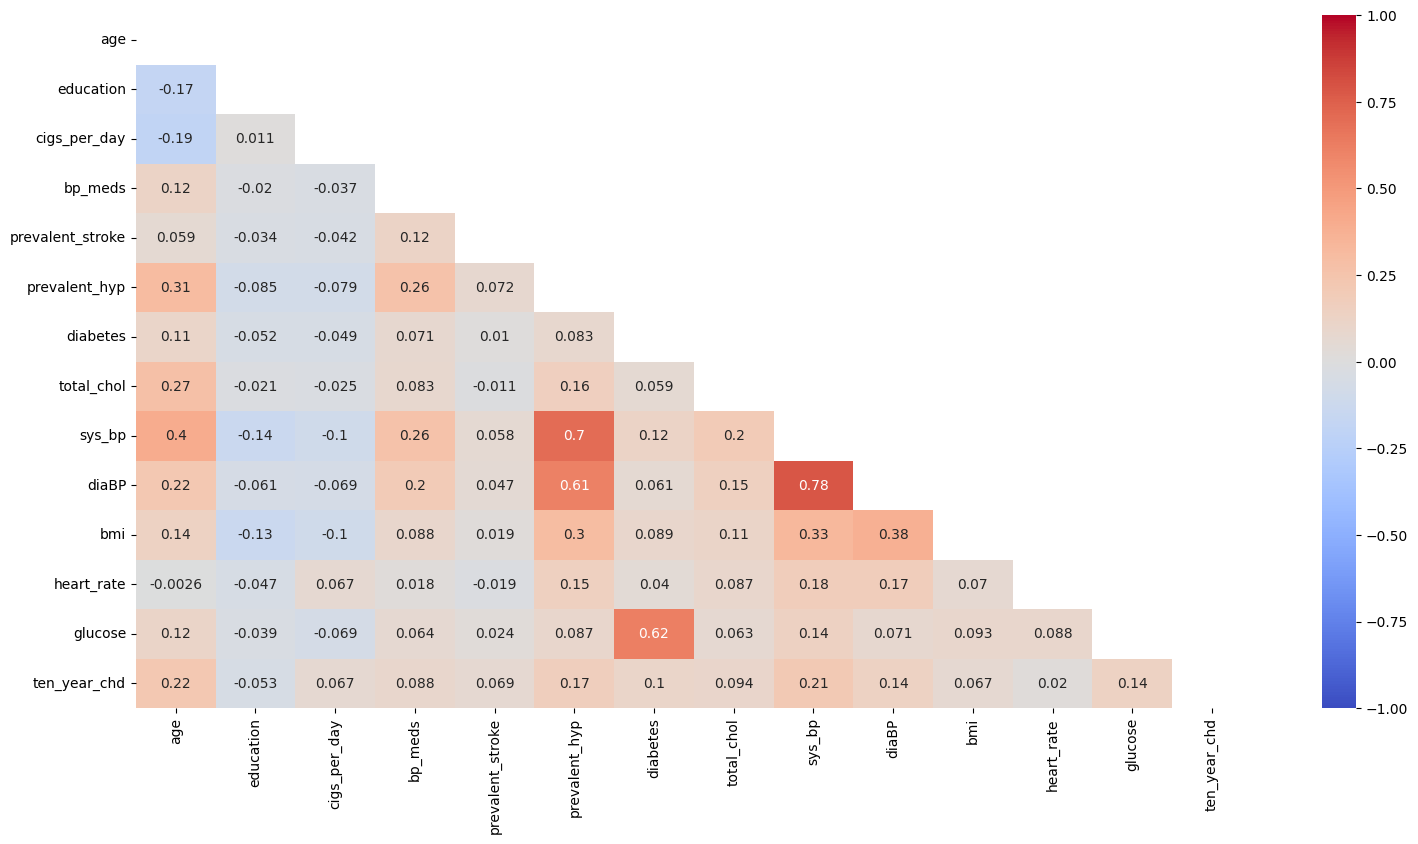

In [27]:
# Plotting of heatmap
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (18,9))
sns.heatmap(corr,mask = mask, annot =True, vmin = -1,vmax = 1,cmap = "coolwarm")
plt.show()

(-1.0, 1.0)

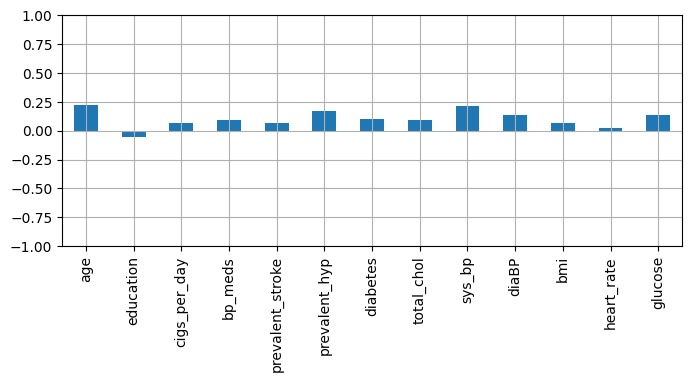

In [28]:
# plotting bar chart to find the correlation of every independent variable with dependent varable
df.drop('ten_year_chd',axis = 1).corrwith(df['ten_year_chd']).plot(kind = 'bar',grid = True,figsize = (8,3))
plt.ylim(-1.0,1.0)

##### 1. Why did you pick the specific chart?

The correlation coefficient is a measure of the strength and direction of a linear relationship between two variables. A correlation matrix is used to summarize the relationships among a set of variables and is an important tool for data exploration and for selecting which variables to include in a model.

The range of correlation is [-1,1].

- If the value is towards 1, then there is a positive correlation which means if one variable value increases then the other value also increases.
- If the value is towards -1 then there is negative correlation which means if one value increase then the other value decreases.

Thus to know the correlation between all the variables along with the correlation coeficients, we have used correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?

From the above analysis, below insights are:
- The 'sys_bp' and 'diaBP' are strongly positively correlated with a coefficient of 0.78.
- 'Diabetes' and 'glucose' exhibit a slightly positive correlation with a coefficient of 0.68.
- 'sysBP' and 'diaBP' display slightly positive correlations with 'prevalent_hypertension' with coefficients of 0.7 and 0.61, respectively.

#### Chart 7 -  Plotting of pairplot

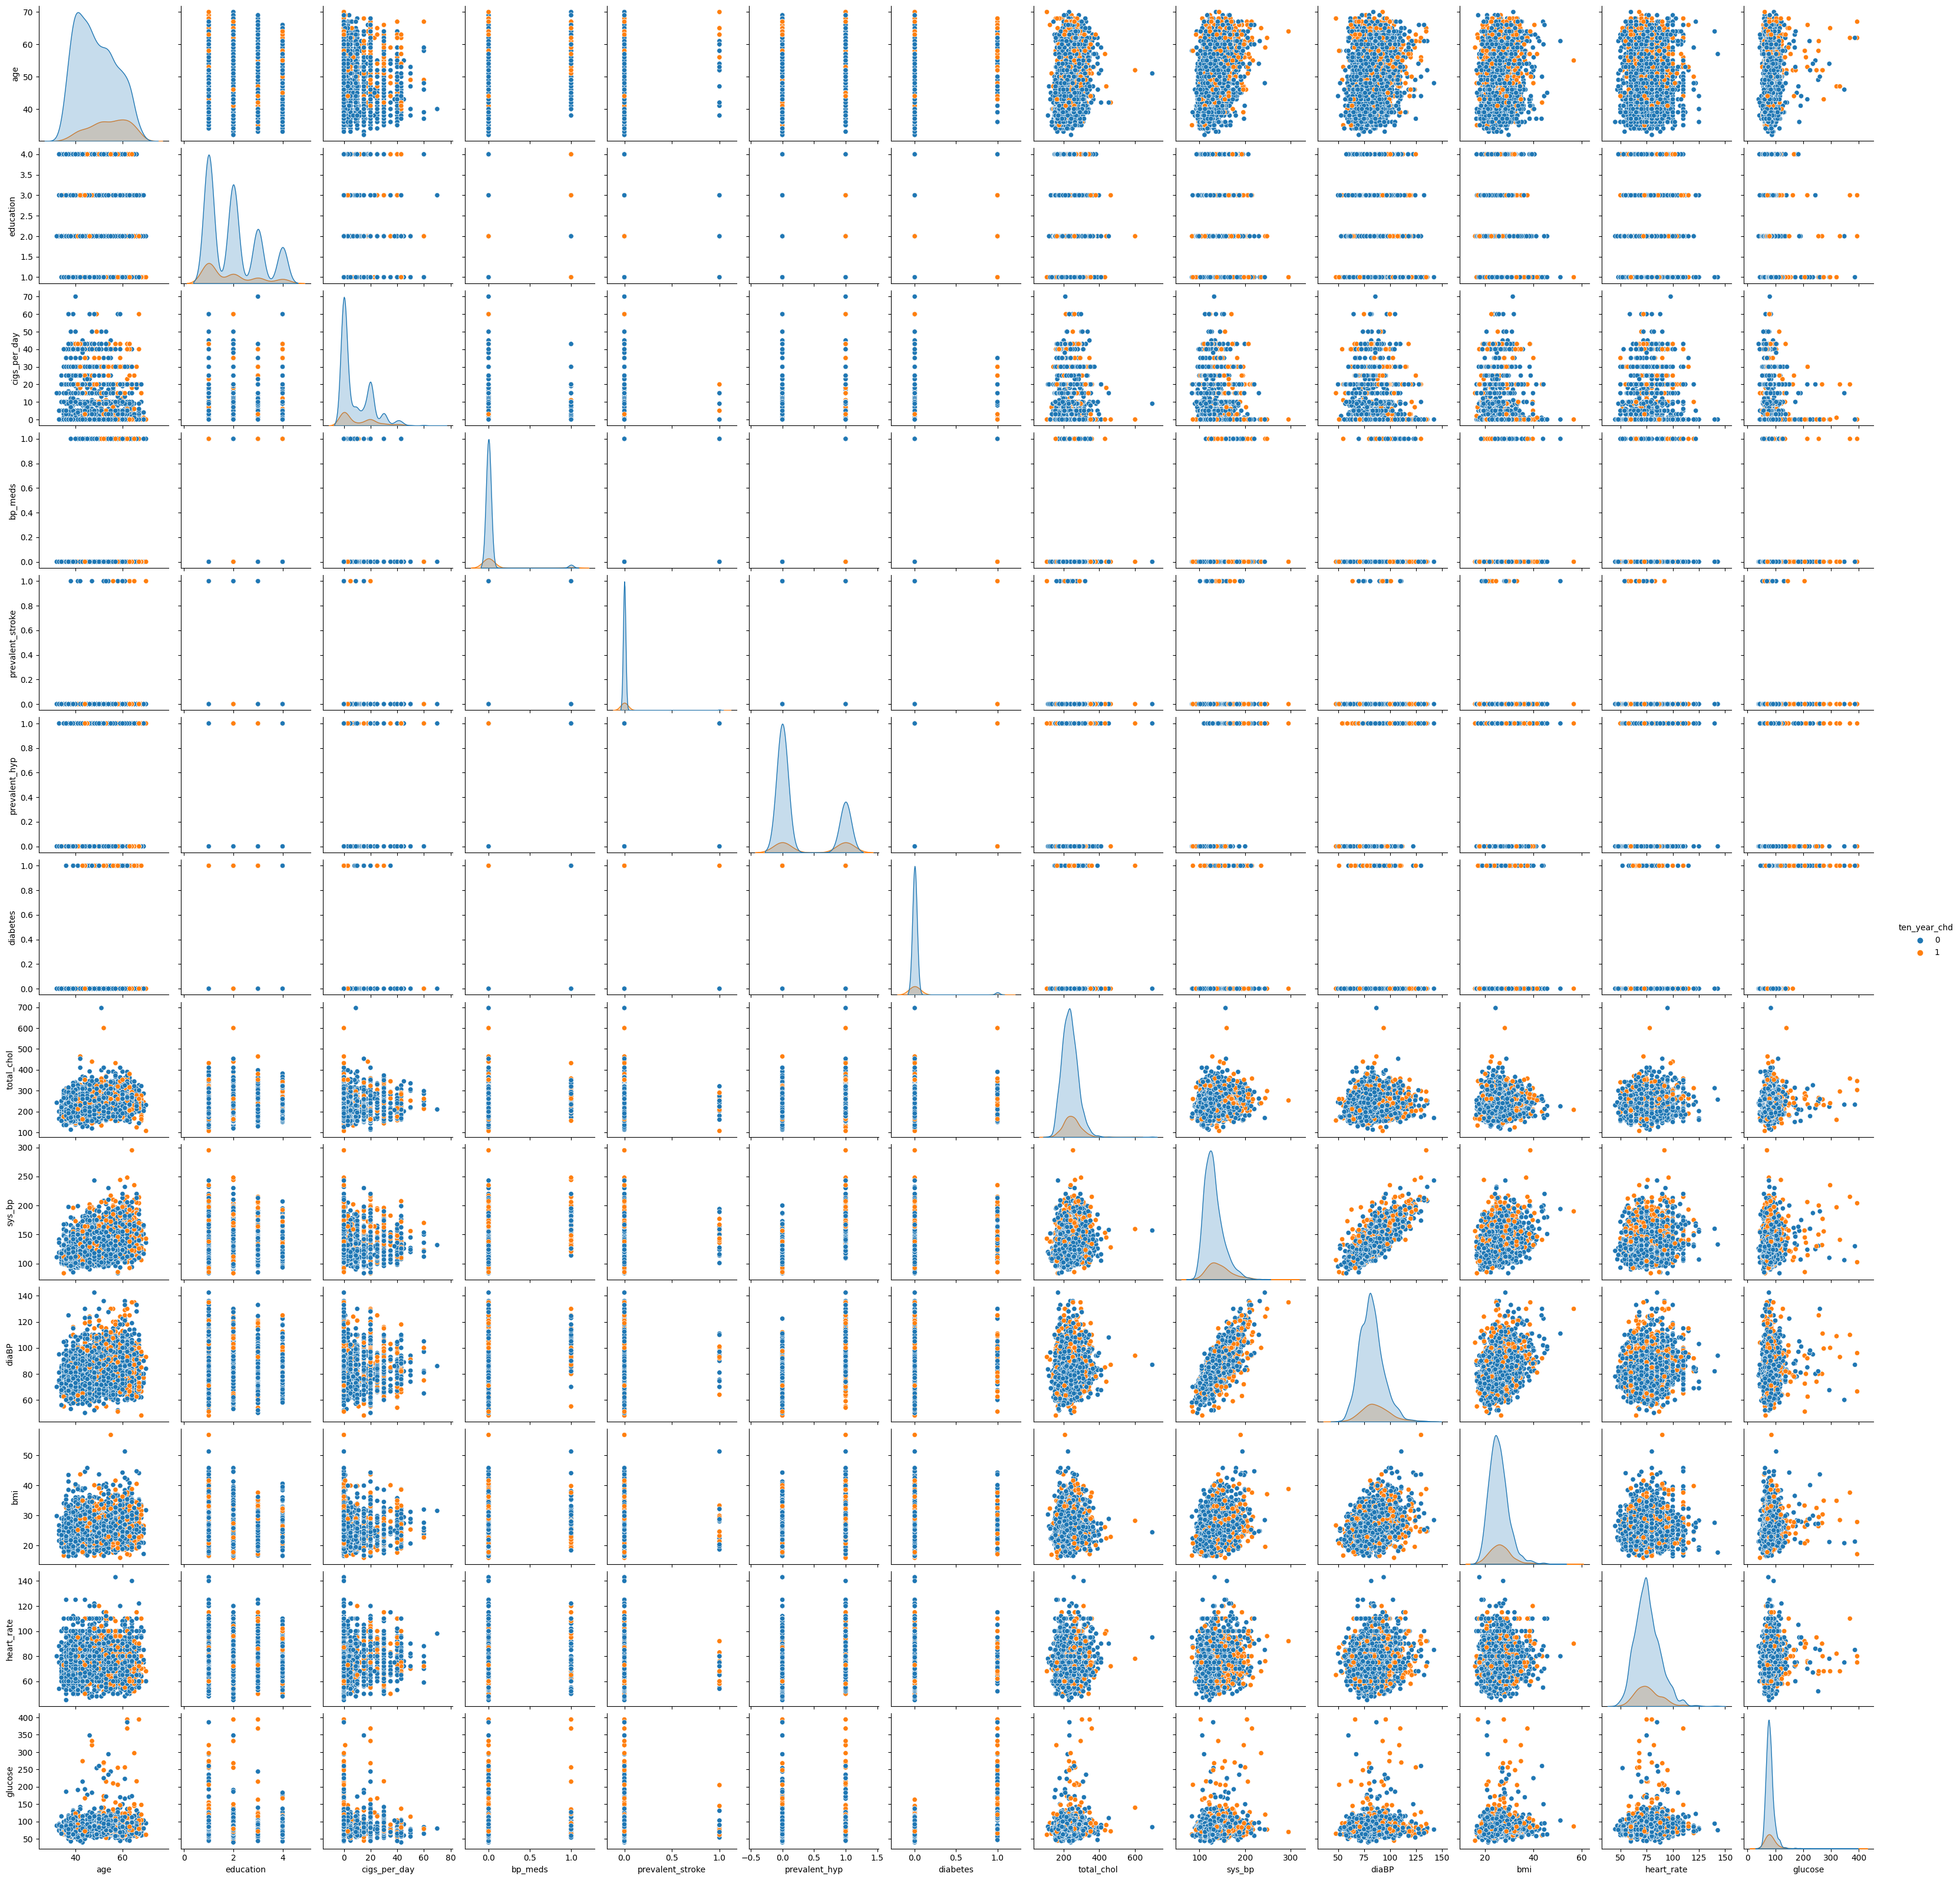

In [29]:
#Plotting of pairplot
sns.pairplot(df, hue = 'ten_year_chd')
plt.show()

##### 1. Why did you pick the specific chart?

A pairplot, also known as a scatterplot matrix, is a visualization that allows you to visualize the relationships between all pairs of variables in a dataset. It is a useful tool for data exploration because it allows you to quickly see how all of the variables in a dataset are related to one another.

Thus, we used pair plot to analyse the patterns of data and relationship between the features. It's exactly same as the correlation map but here you will get the graphical representation.

##### 2. What is/are the insight(s) found from the chart?

From the above analysis, below insights are:
- The cigs_per_day and education have skewed distributions,so we will perform futher analysis and transformations.

## ***5. Hypothesis Testing***

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

To check categorical variables are related with dependent varaible
- Null hypothesis (H0) : categorical and dependent variables are independent

- Alternate hypothesis (H1): categorical and dependent variables are not independent

#### 2. Perform an appropriate statistical test.

In [30]:
# Perform Statistical Test to obtain P-Value(Chi2)
def chi_metric(dataframe):

  p_values = []
  chi_squared_values = []
  for column in dataframe.columns:
    cross_tab = pd.crosstab(df[column], df['ten_year_chd'])
    chi2, p, dof, expected = chi2_contingency(cross_tab)  #Using chi2 contingency table
    p_values.append(p)
    chi_squared_values.append(chi2)

    print(f'Analyzing variable: {column}')
    print(f'Chi-squared: {chi2}')
    print(f'p-value: {p}')
    print('-' * 20)
  print(p_values)

# Plotting the p_value of the category varaibles
  pd.Series(p_values, index = dataframe.columns).plot.barh()
  plt.xscale('log')
  plt.title('P_value for categorical variables')
  plt.xlabel('P_value')


Analyzing variable: education
Chi-squared: 22.16105229004903
p-value: 6.038646749234552e-05
--------------------
Analyzing variable: sex
Chi-squared: 23.814363915594157
p-value: 1.060878293561798e-06
--------------------
Analyzing variable: is_smoking
Chi-squared: 3.763250993795598
p-value: 0.05239062274853224
--------------------
Analyzing variable: bp_meds
Chi-squared: 24.497970055393846
p-value: 7.438816815316195e-07
--------------------
Analyzing variable: prevalent_stroke
Chi-squared: 13.666246132442092
p-value: 0.0002183439934300794
--------------------
Analyzing variable: prevalent_hyp
Chi-squared: 93.02951112773958
p-value: 5.152036591565972e-22
--------------------
Analyzing variable: diabetes
Chi-squared: 34.63203270914867
p-value: 3.982978687382329e-09
--------------------
[6.038646749234552e-05, 1.060878293561798e-06, 0.05239062274853224, 7.438816815316195e-07, 0.0002183439934300794, 5.152036591565972e-22, 3.982978687382329e-09]


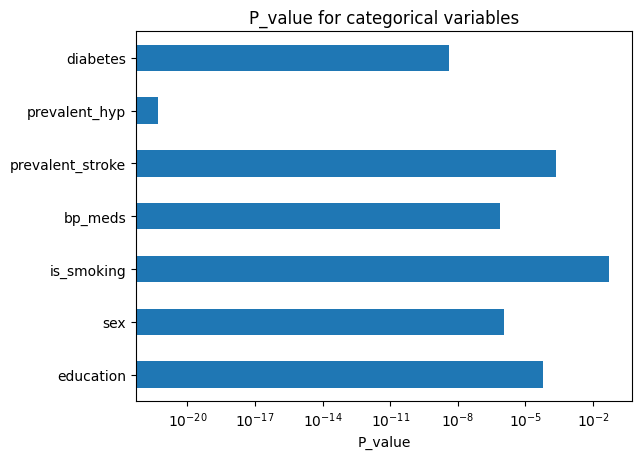

In [31]:
df_cat = df[cat_var]
chi_metric(df_cat)

The p_value for all the variables are lesser than the p_value, so we reject null hypothesis.

##### Which statistical test have you done to obtain P-Value?

To test the hypothesis that the categorical and dependent variables are independent or not,we performed a chi-squared test of independence. This statistical test allowed to determine the relationship. By calculating the chi-squared statistic and p-value, we can make a statistical inference about the relationship between the variables in the dataset.

##### Why did you choose the specific statistical test?

We performed the chi-squared test of independence to test the hypothesis that the categorical variables and dependent variable are not independent to each other because it is an appropriate statistical test for determining if there is a significant association between two categorical variables. In this case, both variabels are categorical variables, so the chi-squared test is a suitable choice.

The chi-squared test works by comparing the observed frequency distribution of the data in a contingency table to the expected frequency distribution under the assumption that the null hypothesis is true. If there is a significant difference between the observed and expected frequencies, it suggests that there is a relationship between the two variables.

Overall, we used the chi-squared test of independence because it is a widely used and well-established statistical test for analyzing the relationship between two categorical variables. It allowed us to make a statistical inference about the relationship between categorical variables and dependent variables.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [32]:
# creating a copy of my dataset 2
df2 = df.copy()


In [33]:
# variables which have missing/Nan values
df.isnull().sum()

age                   0
education            87
sex                   0
is_smoking            0
cigs_per_day         22
bp_meds              44
prevalent_stroke      0
prevalent_hyp         0
diabetes              0
total_chol           38
sys_bp                0
diaBP                 0
bmi                  14
heart_rate            1
glucose             304
ten_year_chd          0
dtype: int64

##### Handling missing values in categorical varibles

In [34]:
# replacing the null values with mode values of the categorical variables
df['bp_meds'] = df['bp_meds'].fillna(df['bp_meds'].mode()[0])
df['education'] = df['education'].fillna(df['education'].mode()[0])

##### Handling the missing values in continous variables of `cig_per_day`

In [35]:
# mean and median of the cigs per day
df['cigs_per_day'].mean().round(0), df['cigs_per_day'].median()

(9.0, 0.0)

In [36]:
df[df['cigs_per_day'].isnull()][['is_smoking','cigs_per_day']]

is_smoking  cigs_per_day
422         YES           NaN
466         YES           NaN
469         YES           NaN
491         YES           NaN
538         YES           NaN
767         YES           NaN
1461        YES           NaN
1467        YES           NaN
1597        YES           NaN
1986        YES           NaN
2031        YES           NaN
2087        YES           NaN
2240        YES           NaN
2284        YES           NaN
2527        YES           NaN
2638        YES           NaN
2648        YES           NaN
2723        YES           NaN
2879        YES           NaN
2945        YES           NaN
3301        YES           NaN
3378        YES           NaN

Here, we can observe that for every NaN value, the is_smoking value is YES. which assures that cigs per day variable is not 0.

In [37]:
# checking the mean and median of cigs per day excluding non smokers
df[df['is_smoking'] == 'YES']['cigs_per_day'].mean(),df[df['is_smoking'] == 'YES']['cigs_per_day'].median()

(18.345945945945946, 20.0)

In [38]:
# imputting with the median values in the NaN values
df['cigs_per_day'] = df['cigs_per_day'].fillna(df[df['is_smoking'] == 'YES']['cigs_per_day'].median())

In [39]:
# checking for missing entries like where patient is_smoking is yes & cigs per day is 0
df[(df['is_smoking'] == 'YES') & (df['cigs_per_day'] == 0)]

Empty DataFrame
Columns: [age, education, sex, is_smoking, cigs_per_day, bp_meds, prevalent_stroke, prevalent_hyp, diabetes, total_chol, sys_bp, diaBP, bmi, heart_rate, glucose, ten_year_chd]
Index: []

##### Handling the total cholestrol,bmi,heartrate variable

In [40]:
# mean,median of total cholestrol variable
df['total_chol'].mean(),df['total_chol'].median()

(237.07428400954655, 234.0)

In [41]:
# imputing with the median values in the NaN values
df['total_chol'] = df['total_chol'].fillna(df['total_chol'].median())

In [42]:
# mean,median of bmi variable
df['bmi'].mean(), df['bmi'].median()

(25.7949644549763, 25.38)

In [43]:
# imputting with the median variable
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

In [44]:
# mean, median of heart rate variables
df['heart_rate'].mean(), df['heart_rate'].median()

(75.97727943346119, 75.0)

In [45]:
# Imputing with the median values of the variable
df['heart_rate'] = df['heart_rate'].fillna(df['heart_rate'].median())

##### Handling glucose variable

In [46]:
df['glucose'].mean().round(0), df['glucose'].median()

(82.0, 78.0)

- The data spread being skewed positively and values falling outside the typical range, a more careful approach is needed, especially for the glucose column with 304 missing data points. Simply using the mean or median for imputation may introduce significant inaccuracies.

- One effective solution is to employ the KNN imputer method. This method considers the relationships between data points and is more suitable for imputing missing values, ensuring that the imputed values align better with the overall data distribution.

In [47]:
# Applying KNNImputer to the glucose variable
imputer = KNNImputer(n_neighbors = 5)
imputed_column = imputer.fit_transform(df[['glucose']])
df['glucose'] = imputed_column

In [48]:
# After imputing, mean and median of the column
df['glucose'].mean(), df['glucose'].median()

(82.08651976668826, 80.0)

In [49]:
# checking for the missing/null values
df.isnull().sum()

age                 0
education           0
sex                 0
is_smoking          0
cigs_per_day        0
bp_meds             0
prevalent_stroke    0
prevalent_hyp       0
diabetes            0
total_chol          0
sys_bp              0
diaBP               0
bmi                 0
heart_rate          0
glucose             0
ten_year_chd        0
dtype: int64

#### 1.What all missing value imputation techniques have you used and why did you use those techniques?

In our data preprocessing, we've employed multiple imputation techniques to address missing values in the dataset. Here's how we've applied these techniques:

1. **Median Imputer for Skewed Continuous Variables:** For continuous variables that exhibited skewness, we opted for the median imputation technique. The median is a robust measure of central tendency that is not influenced by outliers, making it a reliable choice for filling missing values in skewed data.

2. **Mode Imputer for Categorical Variables:** When dealing with categorical variables, we utilized the mode imputation technique. The mode represents the most common and frequent value within a category, making it a suitable estimate for handling missing values in categorical data.

3. **KNN Imputer for Continuous Variables:** We used KNN Imputer technique that imputes missing values using the k-nearest neighbors algorithm. It replaces missing values by taking into account the values of the k-nearest neighbors of the missing data point. This method can be particularly useful when there is a complex relationship between features, and simple imputation methods like mean or median are not appropriate.

By selecting appropriate imputation techniques based on the data type and characteristics of the variables, we aimed to ensure the robustness and accuracy of the imputed values while preparing the dataset for analysis.


### 2. Handling Outliers

In [50]:
# Handling Outliers with IQR(Inter Quartile Range) technique
for col in cont_var:
  q1, median, q3 = df[col].quantile([0.25,0.50,0.75])
  iqr = q3 - q1
  upper_limit = q3 + 1.5 * iqr
  lower_limit = q1 - 1.5 * iqr

  # Replacing with the outliers
  df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])
  df[col] = np.where(df[col] < lower_limit, lower_limit, df[col])


In [51]:
# # # Applying the IQR function on continuous variables of the data
df[cont_var]

age  cigs_per_day  total_chol  sys_bp   diaBP    bmi  heart_rate  \
0     64.0           3.0       221.0   148.0   85.00  25.38        90.0   
1     36.0           0.0       212.0   168.0   98.00  29.77        72.0   
2     46.0          10.0       250.0   116.0   71.00  20.35        88.0   
3     50.0          20.0       233.0   158.0   88.00  28.26        68.0   
4     64.0          30.0       241.0   136.5   85.00  26.42        70.0   
...    ...           ...         ...     ...     ...    ...         ...   
3385  60.0           0.0       261.0   123.5   79.00  29.28        70.0   
3386  46.0           0.0       199.0   102.0   56.00  21.96        80.0   
3387  44.0           3.0       351.0   164.0  113.25  28.92        73.0   
3388  60.0           0.0       191.0   167.0  105.00  23.01        80.0   
3389  54.0           0.0       288.0   124.0   77.00  29.88        79.0   

      glucose  
0        80.0  
1        75.0  
2        94.0  
3        94.0  
4        77.0  
...       ...  
3385    103.0  
3386     84.0  
3387     72.0  
3388     85.0  
3389     92.0  

[3390 rows x 8 columns]

##### What all outlier treatment techniques have you used and why did you use those techniques?

We have applied the Interquartile Range (IQR) method to identify and eliminate outliers present in the continuous columns of the dataset. This method was chosen due to its robustness in outlier detection, as it remains unaffected by extreme values. The IQR is computed as the difference between the 75th and 25th percentiles of the data, and any data point falling below the 25th percentile minus 1.5 times the IQR or exceeding the 75th percentile plus 1.5 times the IQR is categorized as an outlier. By utilizing the IQR method, We ensured a consistent and objective approach to identify and remove outliers from the dataset.

### 3. Categorical Encoding

In [52]:
# # Encoding categorical variables
df['sex'] = np.where(df['sex'] == 'M',1,0)
df['is_smoking'] = np.where(df['is_smoking'] == 'YES',1,0)

In [53]:
# # Using onehot technique
df = pd.get_dummies(df,columns = ['education'])

#### What all categorical encoding techniques have you used & why did you use those techniques?

We have used one hot encoding technique to the education variable and manually encoded on sex and is_smoking variables.Remaining all the categorical variables are having binary values.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [54]:
# Manipulate Features to minimize feature correlation and create new features
# using VIF technique
def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [55]:
cont_df = pd.DataFrame(df[cont_var])
cont_df

age  cigs_per_day  total_chol  sys_bp   diaBP    bmi  heart_rate  \
0     64.0           3.0       221.0   148.0   85.00  25.38        90.0   
1     36.0           0.0       212.0   168.0   98.00  29.77        72.0   
2     46.0          10.0       250.0   116.0   71.00  20.35        88.0   
3     50.0          20.0       233.0   158.0   88.00  28.26        68.0   
4     64.0          30.0       241.0   136.5   85.00  26.42        70.0   
...    ...           ...         ...     ...     ...    ...         ...   
3385  60.0           0.0       261.0   123.5   79.00  29.28        70.0   
3386  46.0           0.0       199.0   102.0   56.00  21.96        80.0   
3387  44.0           3.0       351.0   164.0  113.25  28.92        73.0   
3388  60.0           0.0       191.0   167.0  105.00  23.01        80.0   
3389  54.0           0.0       288.0   124.0   77.00  29.88        79.0   

      glucose  
0        80.0  
1        75.0  
2        94.0  
3        94.0  
4        77.0  
...       ...  
3385    103.0  
3386     84.0  
3387     72.0  
3388     85.0  
3389     92.0  

[3390 rows x 8 columns]

In [56]:
calc_vif(df[[i for i in cont_df]])

variables         VIF
0           age   42.877998
1  cigs_per_day    1.641679
2    total_chol   33.418607
3        sys_bp  124.408227
4         diaBP  135.671644
5           bmi   50.239664
6    heart_rate   40.638934
7       glucose   41.052280

In [57]:
df.columns

Index(['age', 'sex', 'is_smoking', 'cigs_per_day', 'bp_meds',
       'prevalent_stroke', 'prevalent_hyp', 'diabetes', 'total_chol', 'sys_bp',
       'diaBP', 'bmi', 'heart_rate', 'glucose', 'ten_year_chd',
       'education_1.0', 'education_2.0', 'education_3.0', 'education_4.0'],
      dtype='object')

In [58]:
# creating a new column pulse pressure by taking difference of sys_bp - dia_bp
df['pulse_press'] = df['sys_bp'] - df['diaBP']
df['pulse_press']

0       63.00
1       70.00
2       45.00
3       70.00
4       51.50
        ...  
3385    44.50
3386    46.00
3387    50.75
3388    62.00
3389    47.00
Name: pulse_press, Length: 3390, dtype: float64

In [59]:
# dropping the two variables of sys_bp and dia_bp
df.drop(columns = ['sys_bp','diaBP'], axis = 1, inplace = True)

In [60]:
# # updating the cont,cat lists
cont_var.remove('diaBP')
cont_var.remove('sys_bp')
cont_var.append('pulse_press')

In [61]:
# after updating the features
cont_var

['age',
 'cigs_per_day',
 'total_chol',
 'bmi',
 'heart_rate',
 'glucose',
 'pulse_press']

In [62]:
# updating our continuous df after the feature updates
cont_df = pd.DataFrame(df[cont_var])

In [63]:
cont_df.columns

Index(['age', 'cigs_per_day', 'total_chol', 'bmi', 'heart_rate', 'glucose',
       'pulse_press'],
      dtype='object')

In [64]:
calc_vif(df[[i for i in cont_var]])

variables        VIF
0           age  41.947194
1  cigs_per_day   1.639767
2    total_chol  32.897639
3           bmi  40.537321
4    heart_rate  37.710180
5       glucose  40.662967
6   pulse_press  17.527896

#### 2. Feature Selection

In [65]:
# Select your features wisely to avoid overfitting
df.drop('is_smoking', axis = 1, inplace = True)

In [66]:
cat_var.remove('is_smoking')
cat_var

['education',
 'sex',
 'bp_meds',
 'prevalent_stroke',
 'prevalent_hyp',
 'diabetes']

In [67]:
# The df after dropping the column
df.columns

Index(['age', 'sex', 'cigs_per_day', 'bp_meds', 'prevalent_stroke',
       'prevalent_hyp', 'diabetes', 'total_chol', 'bmi', 'heart_rate',
       'glucose', 'ten_year_chd', 'education_1.0', 'education_2.0',
       'education_3.0', 'education_4.0', 'pulse_press'],
      dtype='object')

##### What all feature selection methods have you used  and why?

We utilized the Variance Inflation Factor (VIF) to address multicollinearity within the dataset. During this process, we identified high VIF values for the systolic and diastolic blood pressure columns. To mitigate this issue, we engineered a new feature known as "pulse pressure."

Furthermore, we observed that the "is_smoking" column merely contained binary values indicating whether an individual smoked or not. This information was redundantly captured in the "cigs per day" column, where non-smokers were represented by 0 and smokers by the number of cigarettes smoked per day. As a result, we opted to remove the "is_smoking" column to streamline our dataset and eliminate redundancy.

##### Which all features you found important and why?

The following variables—'age', 'sex', 'cigs_per_day', 'bp_meds', 'prevalent_stroke', 'prevalent_hyp', 'diabetes', 'total_chol', 'bmi', 'heart_rate', 'glucose', 'ten_year_chd', 'education_1.0', 'education_2.0', 'education_3.0', 'education_4.0', 'pulse_press'—are deemed important. These variables collectively represent demographic, behavioral, medical, and historic medical data.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [68]:
# Transform Your data
# Checking the skewness of the day
df[cont_var].skew(axis = 0)

age             0.225796
cigs_per_day    1.127284
total_chol      0.340533
bmi             0.450492
heart_rate      0.418170
glucose         0.340097
pulse_press     0.946833
dtype: float64

In [69]:
#Skewness for square root transformation
np.sqrt(df[cont_var]).skew(axis = 0)

age             0.103528
cigs_per_day    0.449712
total_chol      0.094129
bmi             0.255372
heart_rate      0.222906
glucose         0.149588
pulse_press     0.550119
dtype: float64

In [70]:
#Skewness for log10 transformation
np.log10(df[cont_var]+1).skew(axis = 0)

age            -0.015053
cigs_per_day    0.273181
total_chol     -0.157251
bmi             0.073046
heart_rate      0.027928
glucose        -0.043165
pulse_press     0.168465
dtype: float64

In [71]:
#Applying the square transfomations on the continuous variables
df['age']             = np.log10(df['age'] + 1)
df['cigs_per_day']    = np.log10(df['cigs_per_day'] + 1 )
df['total_chol']      = np.sqrt(df['total_chol'])
df['bmi']             = np.log10(df['bmi'] + 1)
df['heart_rate']      = np.log10(df['heart_rate'] + 1)
df['glucose']         = np.log10(df['glucose'] + 1)
df['pulse_press']     = np.log10(df['pulse_press'] + 1)

In [72]:
#skewness after tansformation
df[cont_var].skew(axis = 0)

age            -0.015053
cigs_per_day    0.273181
total_chol      0.094129
bmi             0.073046
heart_rate      0.027928
glucose        -0.043165
pulse_press     0.168465
dtype: float64

Indeed, we addressed the issue of data skewness by applying both log and square transformations to our dataset. This process was undertaken to effectively reduce the skewness within the data.

### 6. Data Scaling

In [73]:
#Scaling your data
# using standard scaler to the  data
sc = StandardScaler()
df[cont_var] = sc.fit_transform(df[cont_var])

In [74]:
# Defining the X and y
X = df.drop('ten_year_chd',axis = 1)
y = df['ten_year_chd']

##### Which method have you used to scale you data and why?

For the continuous independent variables in the dataset, we have used standard scaler method to scale them into one scale.

### 8. Data Splitting

In [75]:
# Split your data to train and test i 80 : 20 ratio
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)
print(f'The number of rows for training: {X_train.shape[0]}')
print(f'The number of rows for testing:  {X_test.shape[0]}')

The number of rows for training: 2712
The number of rows for testing:  678


##### What data splitting ratio have you used and why?

We split our data into training and testing sets using the `train_test_split` method. In this process, we allocated 80% of the data to the training set and 20% to the testing set. This split ratio strikes a balance between providing ample data for effective model training and reserving a portion for evaluating the model's performance on unseen data. By dedicating 80% of the data to training, our model gains access to a substantial amount of information to learn from, while the remaining 20% is reserved for assessing the model's ability to generalize to new, unseen data.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Indeed, our dataset exhibits an imbalance in the distribution of classes. Specifically, the number of instances representing a positive risk of Coronary Heart Disease (CHD) is notably lower than the occurrences indicating no risk of CHD.

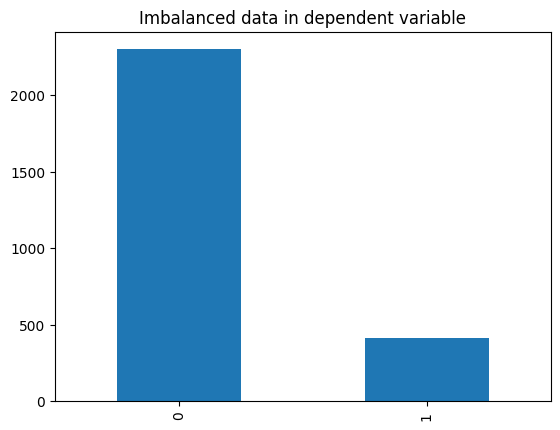

In [76]:
# Handling Imbalanced Dataset (If needed)
# plotting a bar chart for dependent variable
y_train.value_counts().plot(kind = 'bar', title = 'Imbalanced data in dependent variable')
plt.show()

In [77]:
# Implementing the smote to balance the dataset
X_smote,y_smote = SMOTETomek(random_state = 42).fit_resample(X_train,y_train)
print(f'samples in origina dataset {y_train.shape[0]}')
print(f'samples in resampled dataset {y_smote.shape[0]}')

samples in origina dataset 2712
samples in resampled dataset 4584


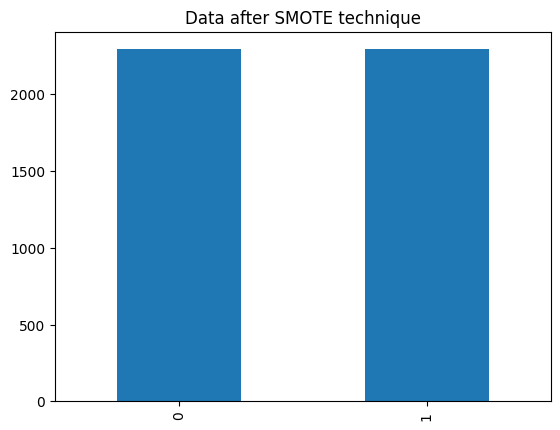

In [78]:
#after balancing the data
y_smote.value_counts().plot(kind = 'bar', title = 'Data after SMOTE technique')
plt.show()

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

As our dependent variable is unbalanced classification, so we used smotetomek techniue to balance the data.SMOTETomek is a combination of two resampling techniques: SMOTE (Synthetic Minority Over-sampling Technique) and Tomek links. It is used to address the class imbalance problem in machine learning, especially in binary classification tasks where one class is significantly smaller than the other.
- SMOTE (Synthetic Minority Over-sampling Technique): SMOTE is an oversampling technique that generates synthetic samples for the minority class. It does this by interpolating between existing minority class instances. SMOTE creates synthetic samples by choosing a random minority class instance and then selecting its k-nearest neighbors. It then generates new instances along the line segments connecting the chosen instance and its neighbors.

- Tomek Links: Tomek links are pairs of instances, one from the majority class and one from the minority class, that are very close to each other but belong to different classes. These instances are considered noisy or ambiguous. Removing the instances involved in Tomek links can improve the quality of the dataset.

## ***7. ML Model Implementation***

In [79]:
# Creating a function for evaluation matrix
def evaluation_matrix(model,X_train,X_test,y_train,y_test,features):
  """This function takes the model, `X_train`, `X_test`, `y_train`, and `y_test` as inputs and performs the following steps:
    - Fits the model using the training data.
    - Makes predictions on the trained model.
    - Calculates and prints the ROC AUC score for both the training and test sets, along with plotting the ROC curves.
    - Prints the confusion matrix for both the training and test sets.
    - Prints the classification report for both the training and test sets.
    - If the model has feature importances, it plots them.
    - Provides a list of performance metrics: `recall_train`, `recall_test`, `roc_auc_train`, `roc_auc_test`, `f1_train`, and `f1_test`.

      The function performs a comprehensive evaluation of the model's performance
      on both the training and test datasets and provides key metrics to assess its quality and generalization."""

  # Fitting the data to the model
  model.fit(X_train,y_train)

  # predicting on trained dataset
  y_pred_train     = model.predict(X_train)
  y_pred_test      = model.predict(X_test)
  pred_prob_train  = model.predict_proba(X_train)[:,1]
  pred_prob_test   = model.predict_proba(X_test)[:,1]

  # printing the scores
  roc_auc_train  = roc_auc_score(y_pred_train,y_train)
  roc_auc_test     = roc_auc_score(y_pred_test, y_test)
  print(f'\n The ROC AUC score for train : {roc_auc_train}')
  print(f'The ROC AUC score for test : {roc_auc_test}')

  # plotting ROC curve
  fpr_train,tpr_train,train_thresholds  = roc_curve(y_train,pred_prob_train)
  fpr_test, tpr_test, test_thresholds   = roc_curve(y_test, pred_prob_test)
  plt.plot([0,1],[0,1],'k--')
  plt.plot(fpr_train, tpr_train,label = "Train ROC AUC: {:.2f}".format(roc_auc_train))
  plt.plot(fpr_test, tpr_test, label = "Test ROC AUC: {:.2f}".format(roc_auc_test))
  plt.legend()
  plt.title('ROC curve')
  plt.xlabel('False positive rate')
  plt.ylabel('True positive rate')
  plt.show()

  # calculating confusion matrix
  cm_train = confusion_matrix(y_train,y_pred_train)
  cm_test  = confusion_matrix(y_test,y_pred_test)

  # plotting confusion matrx
  print("\nConfusion Matrix:")
  fig, ax = plt.subplots(1,2, figsize = (12,4))
  sns.heatmap(cm_train, annot = True, xticklabels = ['Negative','Positive'], yticklabels = ['Negative','Positive'], cmap = 'coolwarm',fmt = '.4g', ax = ax[0])
  ax[0].set_title('Train confusion matrix')
  ax[0].set_xlabel('Predicted labels')
  ax[0].set_ylabel('True labels')

  sns.heatmap(cm_test, annot =True, xticklabels = ['Negative','Positive'], yticklabels = ['Negative','Positive'], cmap = 'coolwarm', fmt = '.4g', ax = ax[1])
  ax[1].set_title('Test confusion matrix')
  ax[1].set_xlabel('Predicted labels')
  ax[1].set_ylabel('True labels')

  plt.tight_layout()
  plt.show()

  # Calculating classification report
  cr_train = classification_report(y_train,y_pred_train,output_dict = True)
  cr_test  = classification_report(y_test, y_pred_test, output_dict = True)
  print('\nTrain Classification Report')
  crt = pd.DataFrame(cr_train).T
  print(crt.to_markdown())
  print('\nTest Classification Report ')
  crt2 = pd.DataFrame(cr_test).T
  print(crt2.to_markdown())

  # Feature importance
  try:
    try:
      feature_importance = model.feature_importances_
    except:
      feature_importance = model.coef_
    feature_importance = np.absolute(feature_importance)
    if len(feature_importance) == len(features):
      pass
    else:
      feature_importance = feature_importance[0]


    feat = pd.Series(feature_importance, index=features)
    feat = feat.sort_values(ascending = True)
    plt.figure(figsize = (10,8))
    feat.plot(kind ='barh')
    plt.title('Feature importance of ' + str(model),fontsize = (16))
    plt.xlabel('Relative Importance')
  except AttributeError:
    print('\n This model does not have feature importance attribute.')

  precision_train = cr_train['weighted avg']['precision']
  precision_test  = cr_test['weighted avg']['precision']

  recall_train = cr_train['weighted avg']['recall']
  recall_test  = cr_test['weighted avg']['recall']

  f1_score_train = cr_train['weighted avg']['f1-score']
  f1_score_test  = cr_test['weighted avg']['f1-score']

  accuracy_train = accuracy_score(y_train,y_pred_train)
  accuracy_test  = accuracy_score(y_test, y_pred_test)

  model_scores = [precision_train, precision_test,recall_train,recall_test,f1_score_train,f1_score_test,accuracy_train,accuracy_test,roc_auc_train,roc_auc_test]
  return model_scores

In [80]:
# Creating a dataframe of scores
scores = pd.DataFrame(index = ['Precision_train','Precision_test','Recall_train','Recall_test','F1_score_train','F1_score_test','Accuracy_train','Accuracy_test','ROC_AUC_train','ROC_AUC_test'])

### ML Model - 1 Logistic Regression

In [81]:
# ML Model - 1 Implementation
lr = LogisticRegression(max_iter = 1000, fit_intercept = True)

# Model will be fitted and trained in the evaluation matrix function

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


 The ROC AUC score for train : 0.7117605373546029
The ROC AUC score for test : 0.6041066401722139


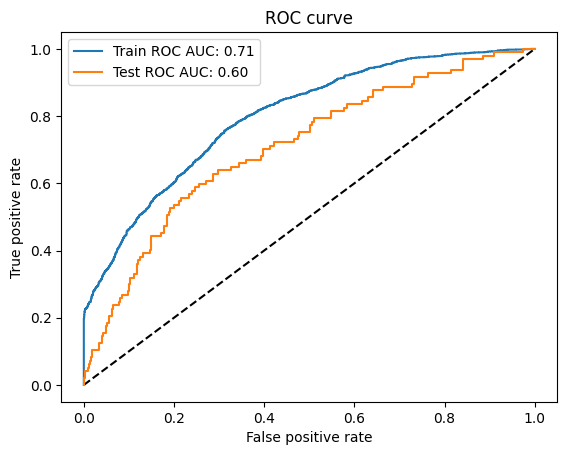


Confusion Matrix:


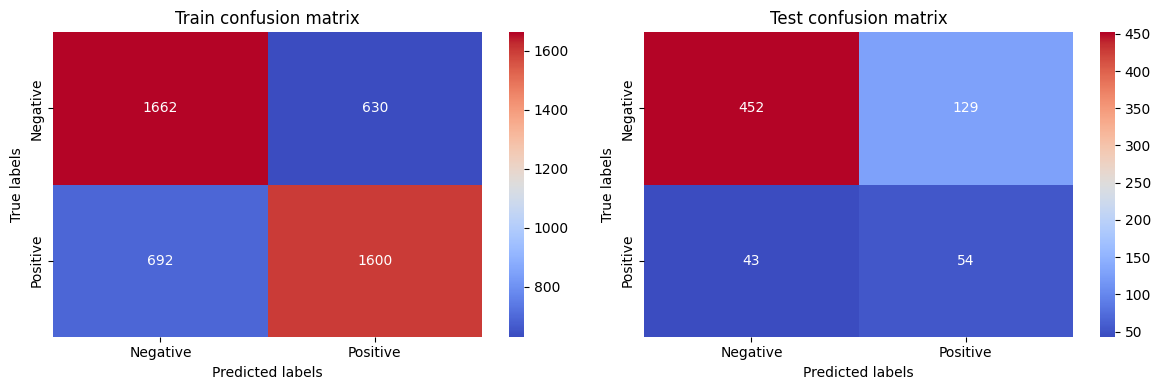


Train Classification Report
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.706032 | 0.725131 |   0.715454 | 2292        |
| 1            |    0.717489 | 0.69808  |   0.707651 | 2292        |
| accuracy     |    0.711606 | 0.711606 |   0.711606 |    0.711606 |
| macro avg    |    0.711761 | 0.711606 |   0.711553 | 4584        |
| weighted avg |    0.711761 | 0.711606 |   0.711553 | 4584        |

Test Classification Report 
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.913131 | 0.777969 |   0.840149 | 581        |
| 1            |    0.295082 | 0.556701 |   0.385714 |  97        |
| accuracy     |    0.746313 | 0.746313 |   0.746313 |   0.746313 |
| macro avg    |    0.604107 | 0.667335 |   0.612931 | 678        |
| weighted avg |    0.824708 | 0.746313 |   0.77513

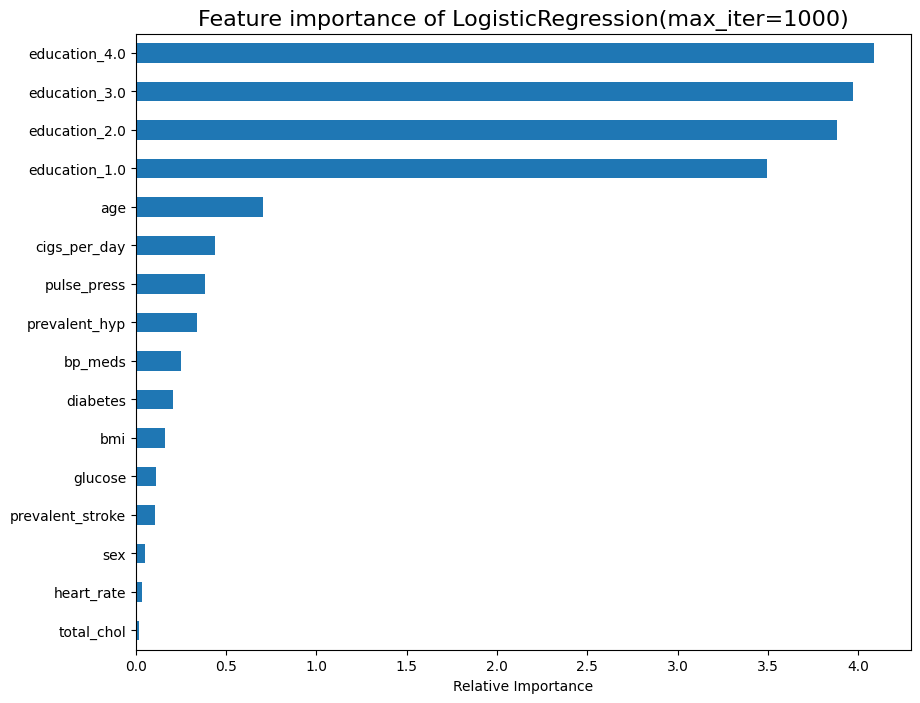

In [82]:
# Visualizing evaluation Metric Score chart
log_reg = evaluation_matrix(lr,X_smote,X_test,y_smote,y_test,X_smote.columns.tolist())
scores['Logistic Regression'] = log_reg

In [83]:
scores

Logistic Regression
Precision_train             0.711761
Precision_test              0.824708
Recall_train                0.711606
Recall_test                 0.746313
F1_score_train              0.711553
F1_score_test               0.775134
Accuracy_train              0.711606
Accuracy_test               0.746313
ROC_AUC_train               0.711761
ROC_AUC_test                0.604107

#### 2. Cross- Validation & Hyperparameter Tuning

In [84]:
#Implementing hyperparameter tuninig
param_grid = {'C':[100,10,1,0.1,0.001,0.0001],
              'penalty' : ['l1','l2'],
              'solver' : ['newton-cg','lbfgs','liblinear','sag','saga']}

# initializing the logistic regression
log_reg = LogisticRegression(max_iter = 1000, fit_intercept = True, random_state  = 42 )

# repeated stratified k fold
rpsk = RepeatedStratifiedKFold(n_splits = 3, n_repeats = 4, random_state = 42)

#Applying GridSearchcv
grid = GridSearchCV(log_reg, param_grid, cv = rpsk)

grid.fit(X_smote,y_smote)
print(f'The best parameters are : {grid.best_params_}')

The best parameters are : {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


In [85]:
# fitting the best parameters to the model
log_reg_best = LogisticRegression(C = grid.best_params_['C'],
                    penalty = grid.best_params_['penalty'],
                    solver = grid.best_params_['solver'], max_iter = 1000)


 The ROC AUC score for train : 0.7117707034714834
The ROC AUC score for test : 0.6032168632283049


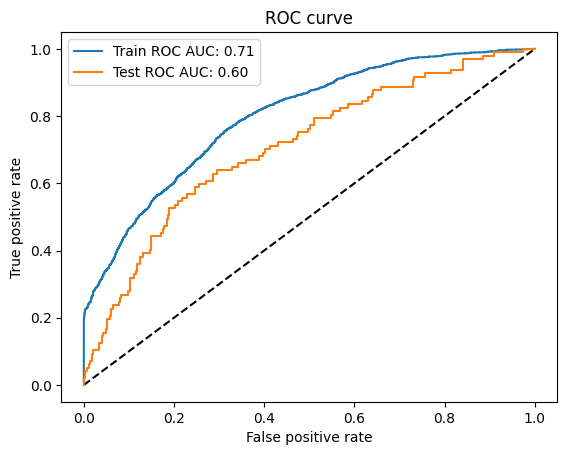


Confusion Matrix:


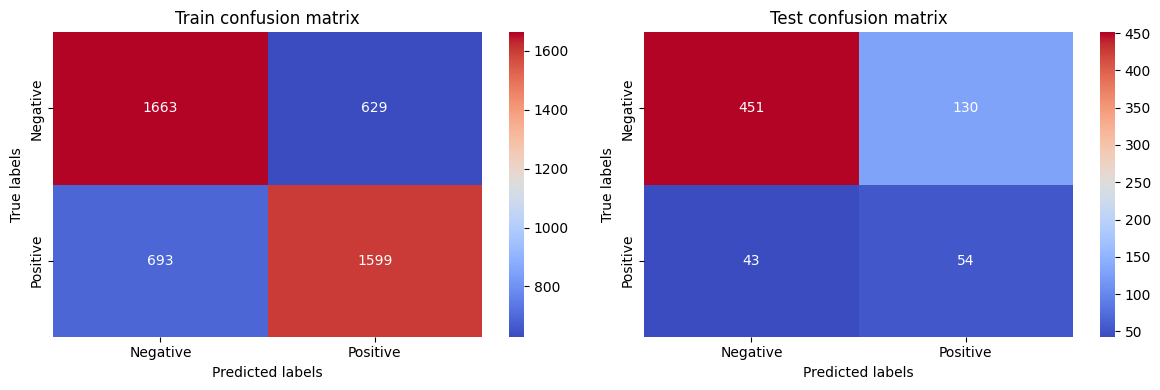


Train Classification Report
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.705857 | 0.725567 |   0.715577 | 2292        |
| 1            |    0.717684 | 0.697644 |   0.707522 | 2292        |
| accuracy     |    0.711606 | 0.711606 |   0.711606 |    0.711606 |
| macro avg    |    0.711771 | 0.711606 |   0.711549 | 4584        |
| weighted avg |    0.711771 | 0.711606 |   0.711549 | 4584        |

Test Classification Report 
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.912955 | 0.776248 |   0.83907  | 581        |
| 1            |    0.293478 | 0.556701 |   0.384342 |  97        |
| accuracy     |    0.744838 | 0.744838 |   0.744838 |   0.744838 |
| macro avg    |    0.603217 | 0.666474 |   0.611706 | 678        |
| weighted avg |    0.824328 | 0.744838 |   0.77401

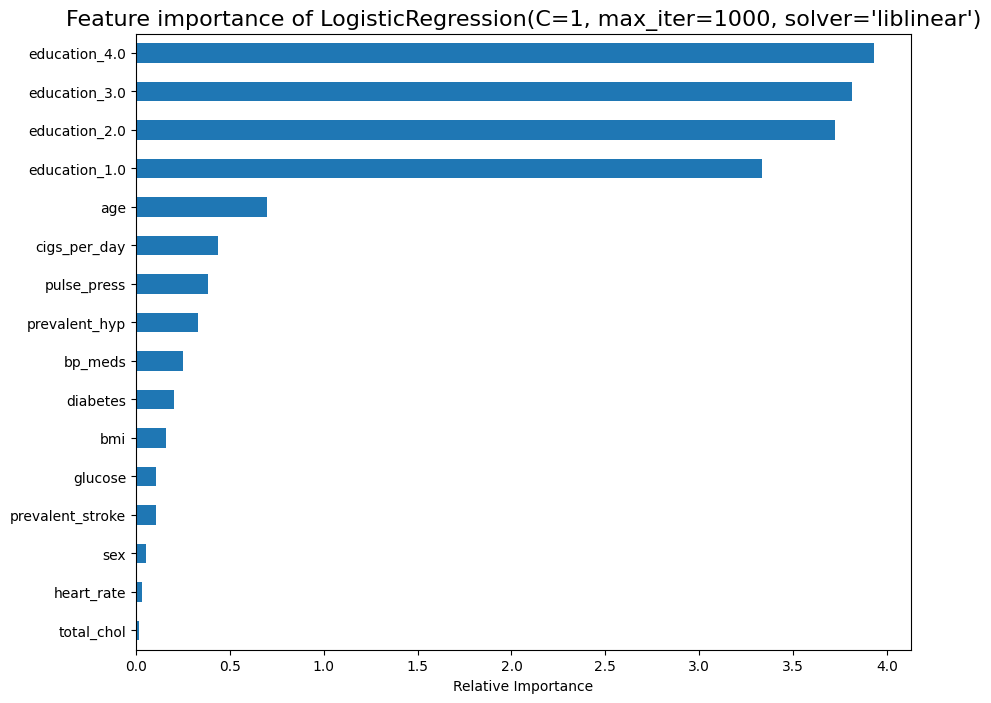

In [86]:
# visualizing with evaluation matrix
log_reg_best_mat = evaluation_matrix(log_reg_best, X_smote,X_test, y_smote,y_test,X_smote.columns.tolist())
scores['Logistic Regression tuned'] = log_reg_best_mat

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV is a hyperparameter optimization technique that conducts a thorough and systematic search through a predefined parameter grid to identify the optimal hyperparameters for a machine learning model. It is a widely adopted method for hyperparameter tuning due to its simplicity and effectiveness.

The selection of a hyperparameter optimization method should take into account several considerations, including the complexity of the parameter space, the available computational resources, and any time constraints. GridSearchCV is particularly suitable when the hyperparameter space is manageable in size and computational resources are not a limiting factor.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [87]:
scores

Logistic Regression  Logistic Regression tuned
Precision_train             0.711761                   0.711771
Precision_test              0.824708                   0.824328
Recall_train                0.711606                   0.711606
Recall_test                 0.746313                   0.744838
F1_score_train              0.711553                   0.711549
F1_score_test               0.775134                   0.774013
Accuracy_train              0.711606                   0.711606
Accuracy_test               0.746313                   0.744838
ROC_AUC_train               0.711761                   0.711771
ROC_AUC_test                0.604107                   0.603217

Despite hyperparameter tuning efforts, the Logistic Regression model's performance on the test set remained unchanged. The precision, recall, accuracy, ROC-AUC, and F1 scores for both the untuned and tuned models are identical.

### ML Model - 2 Decision Trees

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [88]:
# Implementing the decision trees model
dt = DecisionTreeClassifier(random_state = 42)


 The ROC AUC score for train : 1.0
The ROC AUC score for test : 0.5350449700859781


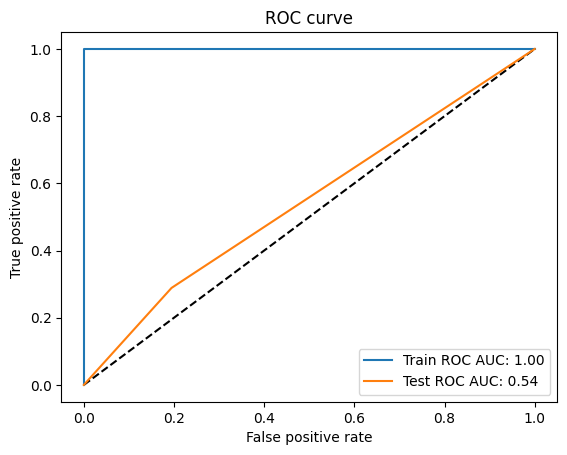


Confusion Matrix:


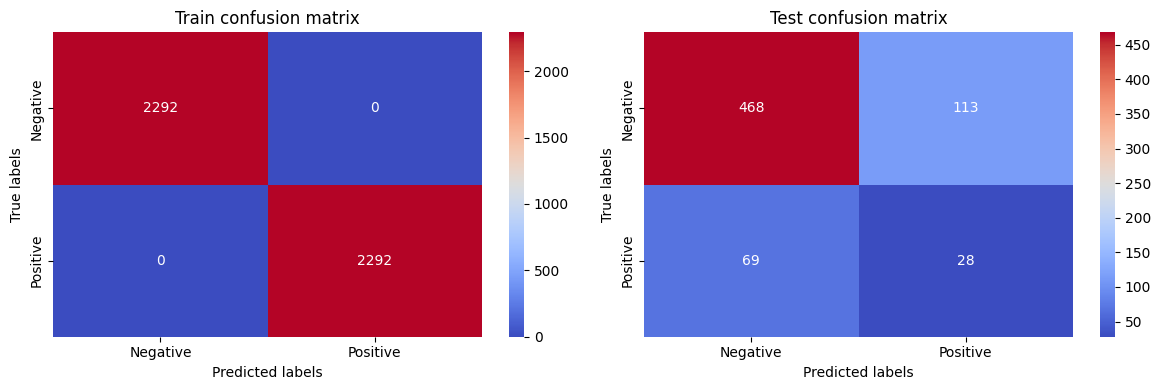


Train Classification Report
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |      2292 |
| 1            |           1 |        1 |          1 |      2292 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |      4584 |
| weighted avg |           1 |        1 |          1 |      4584 |

Test Classification Report 
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.871508 | 0.805508 |   0.837209 | 581        |
| 1            |    0.198582 | 0.28866  |   0.235294 |  97        |
| accuracy     |    0.731563 | 0.731563 |   0.731563 |   0.731563 |
| macro avg    |    0.535045 | 0.547084 |   0.536252 | 678        |
| weighted avg |    0.775234 | 0.731563 |   0.751095 | 678       

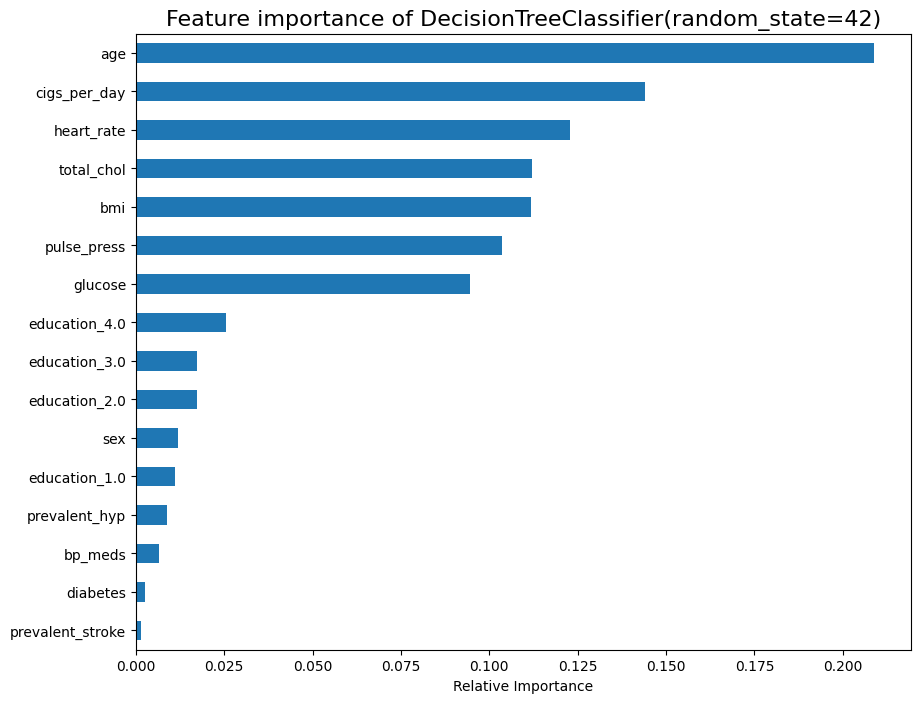

In [89]:
# Visualizing evaluation Metric Score chart
dt_mat = evaluation_matrix(dt,X_smote,X_test,y_smote,y_test,X_smote.columns.tolist())
scores['Decision Trees'] = dt_mat

In [90]:
scores

Logistic Regression  Logistic Regression tuned  \
Precision_train             0.711761                   0.711771   
Precision_test              0.824708                   0.824328   
Recall_train                0.711606                   0.711606   
Recall_test                 0.746313                   0.744838   
F1_score_train              0.711553                   0.711549   
F1_score_test               0.775134                   0.774013   
Accuracy_train              0.711606                   0.711606   
Accuracy_test               0.746313                   0.744838   
ROC_AUC_train               0.711761                   0.711771   
ROC_AUC_test                0.604107                   0.603217   

                 Decision Trees  
Precision_train        1.000000  
Precision_test         0.775234  
Recall_train           1.000000  
Recall_test            0.731563  
F1_score_train         1.000000  
F1_score_test          0.751095  
Accuracy_train         1.000000  
Accuracy_test          0.731563  
ROC_AUC_train          1.000000  
ROC_AUC_test           0.535045

#### 2. Cross- Validation & Hyperparameter Tuning

In [91]:
# Implementing the model for hyperparameter
param_grid = {'max_depth' : [3,4,5,7,9],
              'min_samples_split' : np.arange(2,8),
              'min_samples_leaf' : np.arange(10,20)}

# Initializing the model
dt = DecisionTreeClassifier()

# repeated stratifiedKFold
rspf = RepeatedStratifiedKFold(n_splits = 3, n_repeats = 4, random_state = 42)

# Applying Grisearch
grid = GridSearchCV(dt, param_grid, cv = rspf )

grid.fit(X_smote,y_smote)

# Best parameters
print(f'The best parameters are :{grid.best_params_}')

The best parameters are :{'max_depth': 9, 'min_samples_leaf': 10, 'min_samples_split': 6}


In [92]:
# Implementing model with best paramters
dt_2 = DecisionTreeClassifier(max_depth = grid.best_params_['max_depth'],
                   min_samples_split = grid.best_params_['min_samples_split'],
                   min_samples_leaf = grid.best_params_['min_samples_leaf'],random_state = 42 )


 The ROC AUC score for train : 0.8028229431910995
The ROC AUC score for test : 0.5622603731788363


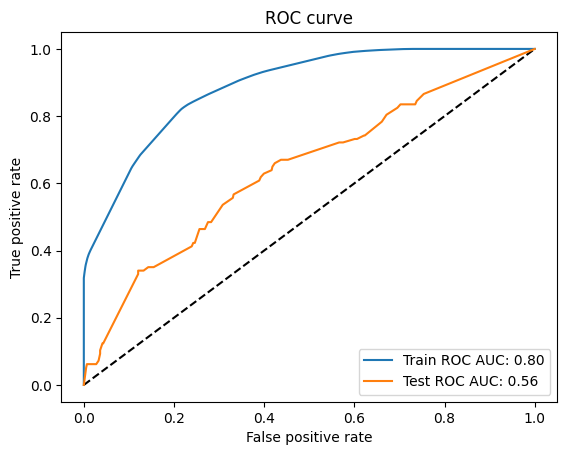


Confusion Matrix:


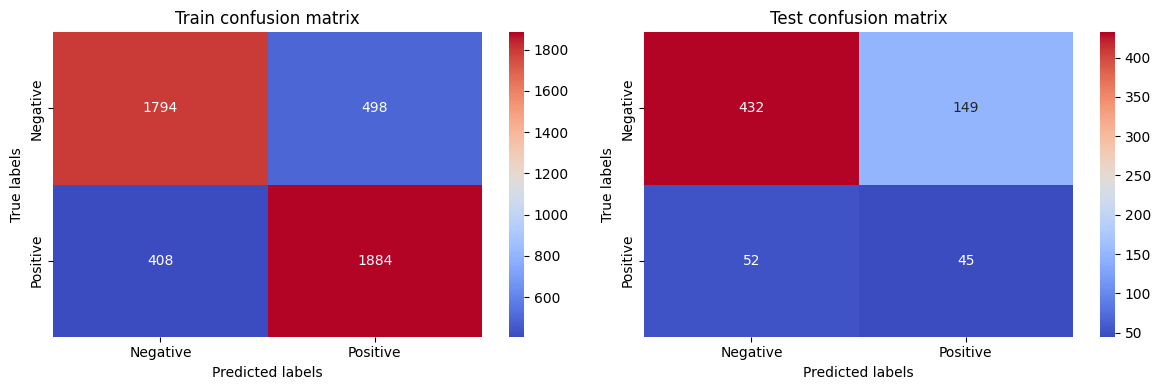


Train Classification Report
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.814714 | 0.782723 |   0.798398 | 2292        |
| 1            |    0.790932 | 0.82199  |   0.806162 | 2292        |
| accuracy     |    0.802356 | 0.802356 |   0.802356 |    0.802356 |
| macro avg    |    0.802823 | 0.802356 |   0.80228  | 4584        |
| weighted avg |    0.802823 | 0.802356 |   0.80228  | 4584        |

Test Classification Report 
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    0.892562 | 0.743546 |   0.811268 | 581       |
| 1            |    0.231959 | 0.463918 |   0.309278 |  97       |
| accuracy     |    0.70354  | 0.70354  |   0.70354  |   0.70354 |
| macro avg    |    0.56226  | 0.603732 |   0.560273 | 678       |
| weighted avg |    0.798051 | 0.70354  |   0.739449 | 67

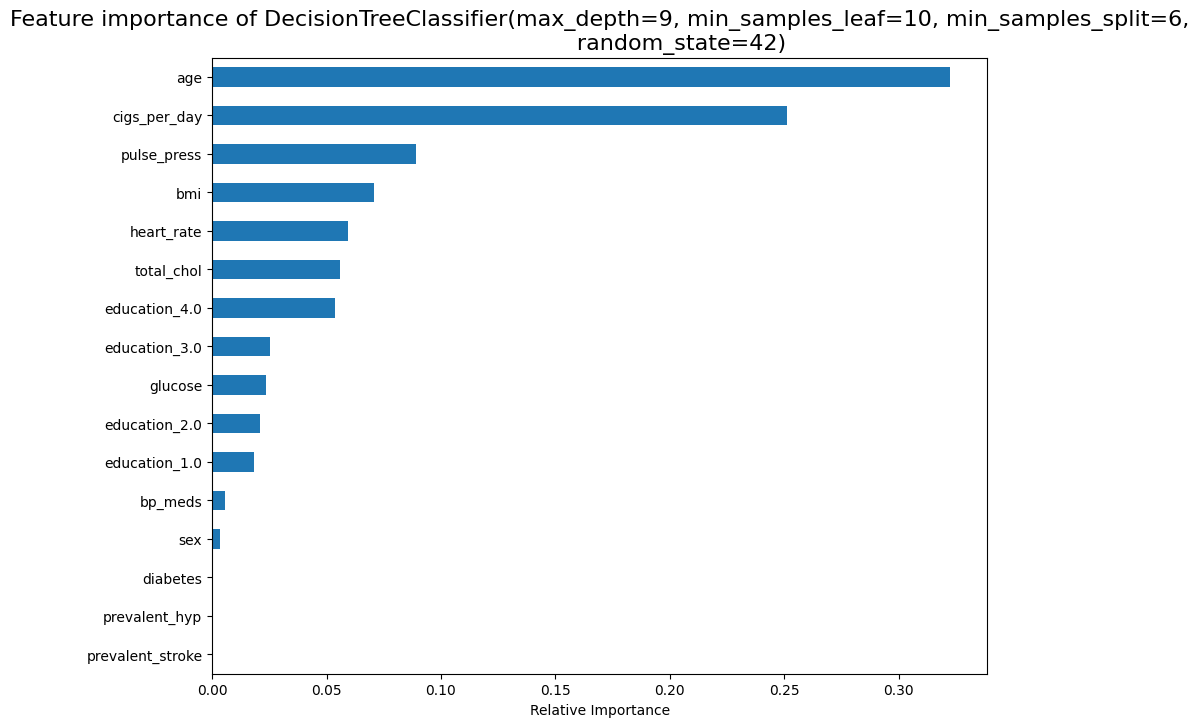

In [93]:
# Visualizing with evaluation matrix
dt_2_mat = evaluation_matrix(dt_2,X_smote,X_test,y_smote,y_test, X_smote.columns.tolist())
scores['Decision Trees tuned'] = dt_2_mat

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV is a hyperparameter optimization technique that conducts a thorough and systematic search through a predefined parameter grid to identify the optimal hyperparameters for a machine learning model. It is a widely adopted method for hyperparameter tuning due to its simplicity and effectiveness.

The selection of a hyperparameter optimization method should take into account several considerations, including the complexity of the parameter space, the available computational resources, and any time constraints. GridSearchCV is particularly suitable when the hyperparameter space is manageable in size and computational resources are not a limiting factor.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [94]:
scores

Logistic Regression  Logistic Regression tuned  \
Precision_train             0.711761                   0.711771   
Precision_test              0.824708                   0.824328   
Recall_train                0.711606                   0.711606   
Recall_test                 0.746313                   0.744838   
F1_score_train              0.711553                   0.711549   
F1_score_test               0.775134                   0.774013   
Accuracy_train              0.711606                   0.711606   
Accuracy_test               0.746313                   0.744838   
ROC_AUC_train               0.711761                   0.711771   
ROC_AUC_test                0.604107                   0.603217   

                 Decision Trees  Decision Trees tuned  
Precision_train        1.000000              0.802823  
Precision_test         0.775234              0.798051  
Recall_train           1.000000              0.802356  
Recall_test            0.731563              0.703540  
F1_score_train         1.000000              0.802280  
F1_score_test          0.751095              0.739449  
Accuracy_train         1.000000              0.802356  
Accuracy_test          0.731563              0.703540  
ROC_AUC_train          1.000000              0.802823  
ROC_AUC_test           0.535045              0.562260

Following model tuning, noticeable improvements in the model's performance metrics are apparent. The untuned model exhibited signs of overfitting, while the tuned model effectively mitigated overfitting. However, it is worth noting that there was a significant decline in the ROC-AUC score after tuning.

### ML Model - 3 Random Forest

In [95]:
# fitting the model
rf = RandomForestClassifier(random_state = 42 )

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


 The ROC AUC score for train : 1.0
The ROC AUC score for test : 0.5945232918875345


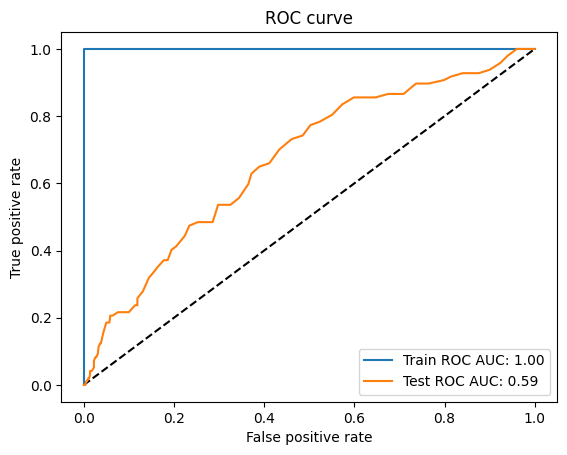


Confusion Matrix:


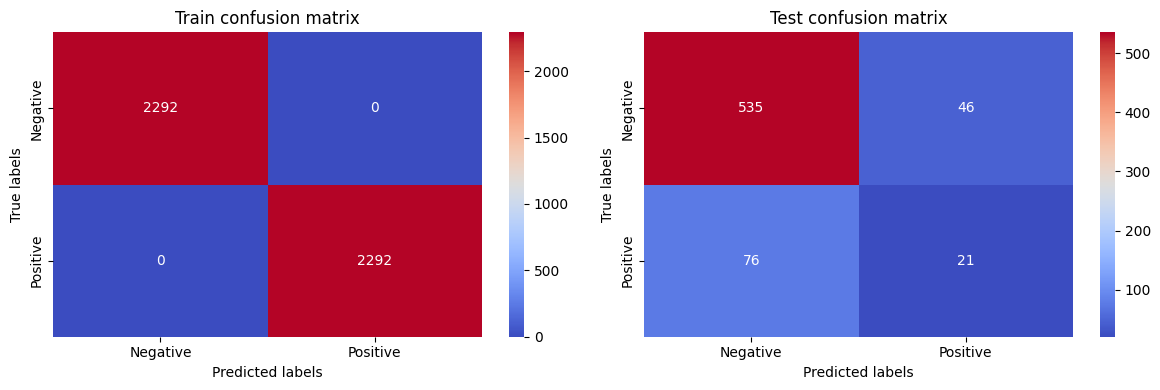


Train Classification Report
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |      2292 |
| 1            |           1 |        1 |          1 |      2292 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |      4584 |
| weighted avg |           1 |        1 |          1 |      4584 |

Test Classification Report 
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.875614 | 0.920826 |   0.897651 | 581        |
| 1            |    0.313433 | 0.216495 |   0.256098 |  97        |
| accuracy     |    0.820059 | 0.820059 |   0.820059 |   0.820059 |
| macro avg    |    0.594523 | 0.568661 |   0.576874 | 678        |
| weighted avg |    0.795184 | 0.820059 |   0.805865 | 678       

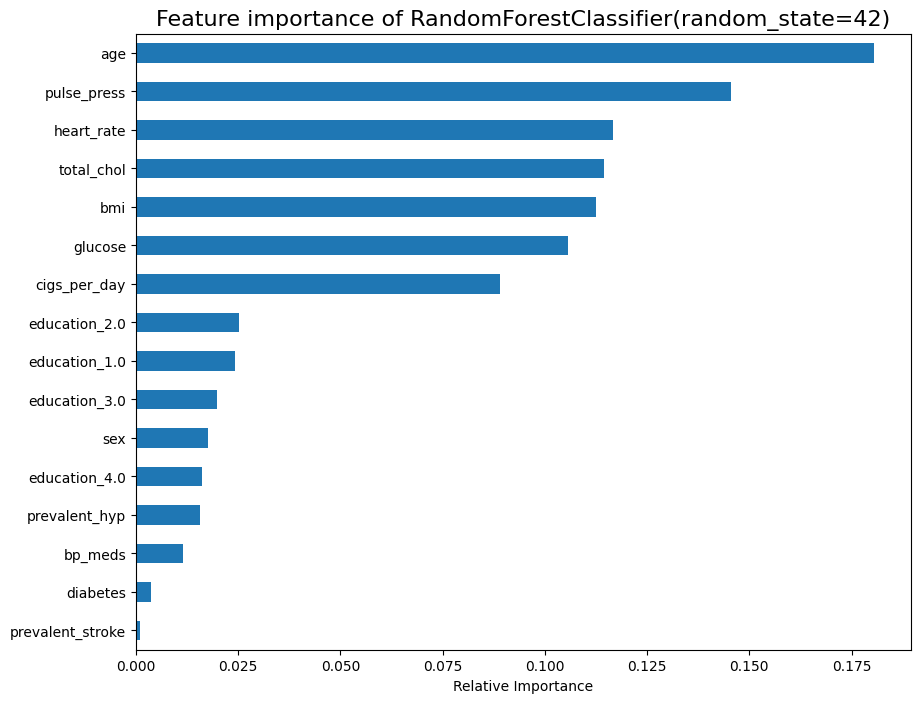

In [96]:
# Visualizing evaluation Metric Score chart
rf_mat = evaluation_matrix(rf,X_smote,X_test,y_smote,y_test,X_smote.columns.tolist())
scores['Random Forest'] = rf_mat

In [97]:
scores

Logistic Regression  Logistic Regression tuned  \
Precision_train             0.711761                   0.711771   
Precision_test              0.824708                   0.824328   
Recall_train                0.711606                   0.711606   
Recall_test                 0.746313                   0.744838   
F1_score_train              0.711553                   0.711549   
F1_score_test               0.775134                   0.774013   
Accuracy_train              0.711606                   0.711606   
Accuracy_test               0.746313                   0.744838   
ROC_AUC_train               0.711761                   0.711771   
ROC_AUC_test                0.604107                   0.603217   

                 Decision Trees  Decision Trees tuned  Random Forest  
Precision_train        1.000000              0.802823       1.000000  
Precision_test         0.775234              0.798051       0.795184  
Recall_train           1.000000              0.802356       1.000000  
Recall_test            0.731563              0.703540       0.820059  
F1_score_train         1.000000              0.802280       1.000000  
F1_score_test          0.751095              0.739449       0.805865  
Accuracy_train         1.000000              0.802356       1.000000  
Accuracy_test          0.731563              0.703540       0.820059  
ROC_AUC_train          1.000000              0.802823       1.000000  
ROC_AUC_test           0.535045              0.562260       0.594523

#### 2. Cross- Validation & Hyperparameter Tuning

In [98]:
%time
param_grid = {'n_estimators' : [10,50,100,200],
              'max_depth' : np.arange(10,20),
              'min_samples_split': np.arange(2,10)}

# Implementing the model
rf_2 = RandomForestClassifier(random_state = 42)
# Implementing the repeatedstratifiedcv
rps = RepeatedStratifiedKFold(n_splits = 4, n_repeats = 5, random_state = 42)

# Implementing the gridsearchcv
grid = RandomizedSearchCV(rf_2, param_grid, cv = rps, n_iter = 10, n_jobs = -1)

grid.fit(X_smote, y_smote)
print(f'The best parameters are: {grid.best_params_}')

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.3 µs
The best parameters are: {'n_estimators': 100, 'min_samples_split': 4, 'max_depth': 16}


In [99]:
# Initializing the model with best parameters
rf_best = RandomForestClassifier(n_estimators= grid.best_params_['n_estimators'],
                       min_samples_split = grid.best_params_['min_samples_split'],
                       max_depth = grid.best_params_['max_depth'], random_state = 42)


 The ROC AUC score for train : 0.9924548336225081
The ROC AUC score for test : 0.6128458012768048


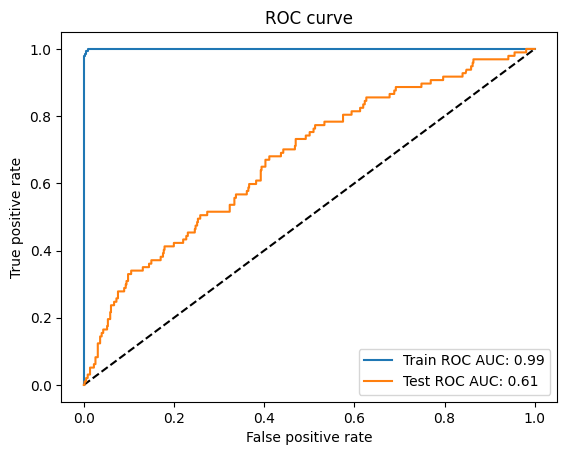


Confusion Matrix:


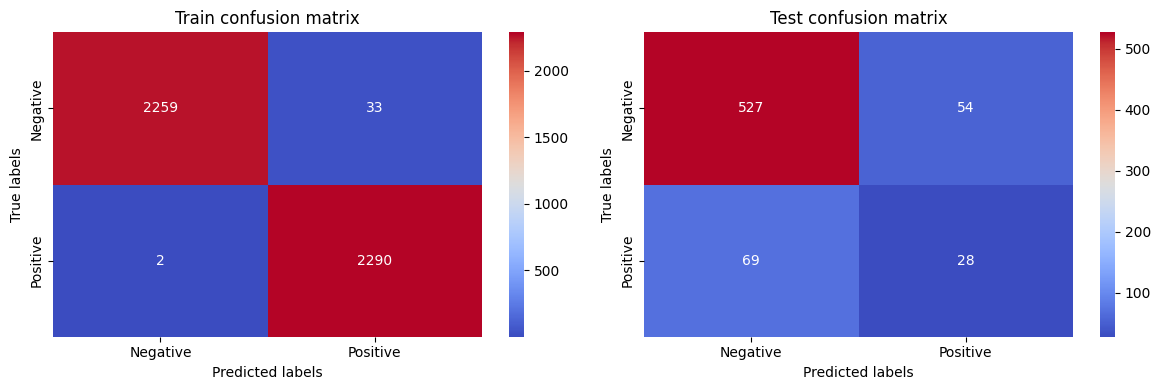


Train Classification Report
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.999115 | 0.985602 |   0.992313 | 2292        |
| 1            |    0.985794 | 0.999127 |   0.992416 | 2292        |
| accuracy     |    0.992365 | 0.992365 |   0.992365 |    0.992365 |
| macro avg    |    0.992455 | 0.992365 |   0.992364 | 4584        |
| weighted avg |    0.992455 | 0.992365 |   0.992364 | 4584        |

Test Classification Report 
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.884228 | 0.907057 |   0.895497 | 581        |
| 1            |    0.341463 | 0.28866  |   0.312849 |  97        |
| accuracy     |    0.818584 | 0.818584 |   0.818584 |   0.818584 |
| macro avg    |    0.612846 | 0.597858 |   0.604173 | 678        |
| weighted avg |    0.806576 | 0.818584 |   0.81213

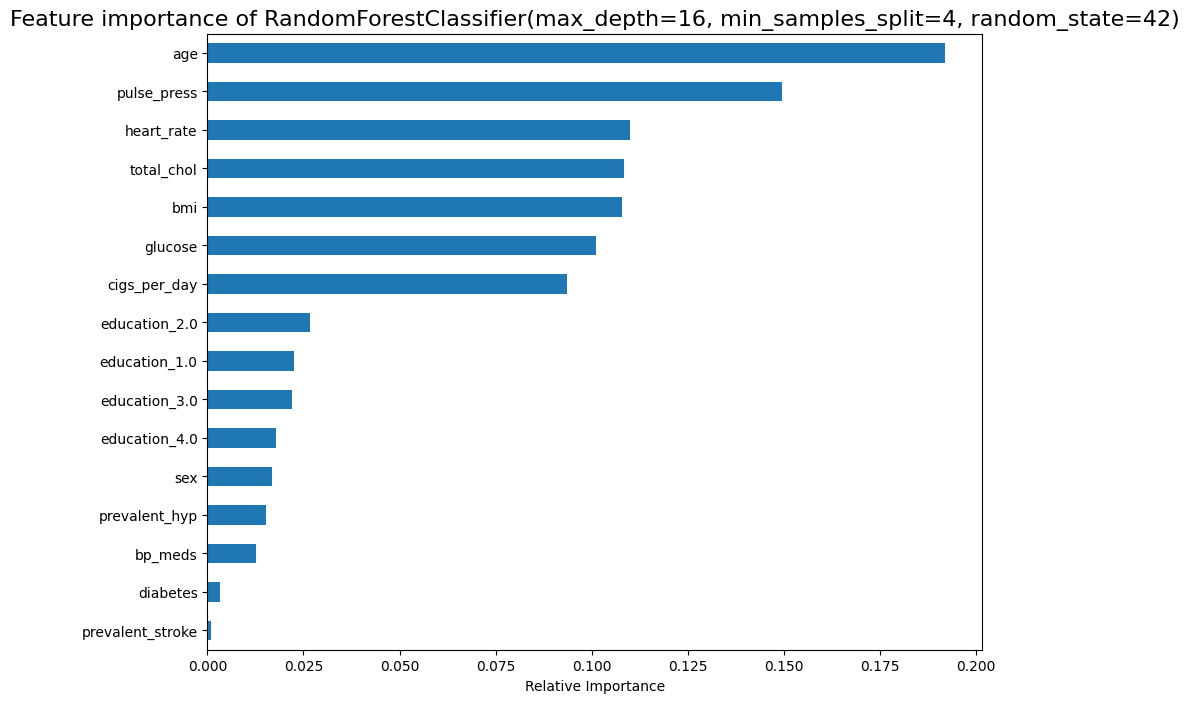

In [100]:
# Evaluating the model with best parameters
rf_mat = evaluation_matrix(rf_best,X_smote,X_test,y_smote,y_test,X_smote.columns.tolist())
scores['Random Forest tuned'] = rf_mat

##### Which hyperparameter optimization technique have you used and why?

The hyperparameter optimization technique used is RandomizedSearchCV. RandomizedSearchCV is a method that performs a random search over a specified parameter grid to find the best hyperparameters for a model. It is a popular method for hyperparameter tuning because it can be more efficient than exhaustive search methods like GridSearchCV when the parameter space is large.

The choice of hyperparameter optimization technique depends on various factors such as the size of the parameter space, the computational resources available, and the time constraints. RandomizedSearchCV can be a good choice when the parameter space is large and computational resources are limited.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [101]:
scores

Logistic Regression  Logistic Regression tuned  \
Precision_train             0.711761                   0.711771   
Precision_test              0.824708                   0.824328   
Recall_train                0.711606                   0.711606   
Recall_test                 0.746313                   0.744838   
F1_score_train              0.711553                   0.711549   
F1_score_test               0.775134                   0.774013   
Accuracy_train              0.711606                   0.711606   
Accuracy_test               0.746313                   0.744838   
ROC_AUC_train               0.711761                   0.711771   
ROC_AUC_test                0.604107                   0.603217   

                 Decision Trees  Decision Trees tuned  Random Forest  \
Precision_train        1.000000              0.802823       1.000000   
Precision_test         0.775234              0.798051       0.795184   
Recall_train           1.000000              0.802356       1.000000   
Recall_test            0.731563              0.703540       0.820059   
F1_score_train         1.000000              0.802280       1.000000   
F1_score_test          0.751095              0.739449       0.805865   
Accuracy_train         1.000000              0.802356       1.000000   
Accuracy_test          0.731563              0.703540       0.820059   
ROC_AUC_train          1.000000              0.802823       1.000000   
ROC_AUC_test           0.535045              0.562260       0.594523   

                 Random Forest tuned  
Precision_train             0.992455  
Precision_test              0.806576  
Recall_train                0.992365  
Recall_test                 0.818584  
F1_score_train              0.992364  
F1_score_test               0.812139  
Accuracy_train              0.992365  
Accuracy_test               0.818584  
ROC_AUC_train               0.992455  
ROC_AUC_test                0.612846

Despite conducting hyperparameter tuning with randomized values, there was no observed improvement in the model's scores.

### ML Model - 4 SVM (Support Vector Machines)

In [102]:
# Impelmenting the model svm
sv = SVC(random_state = 42,kernel = 'linear', probability = True)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


 The ROC AUC score for train : 0.7247300772677939
The ROC AUC score for test : 0.5892549829469006


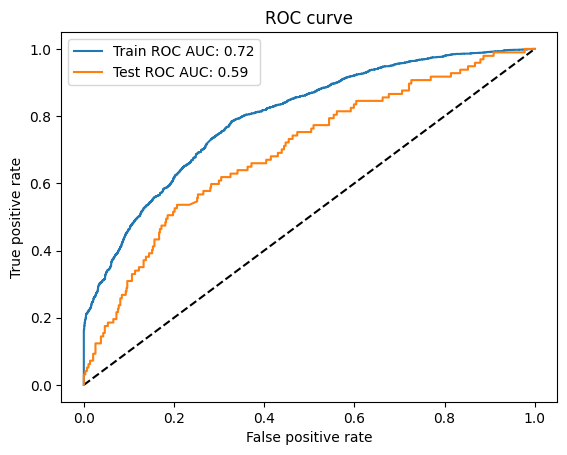


Confusion Matrix:


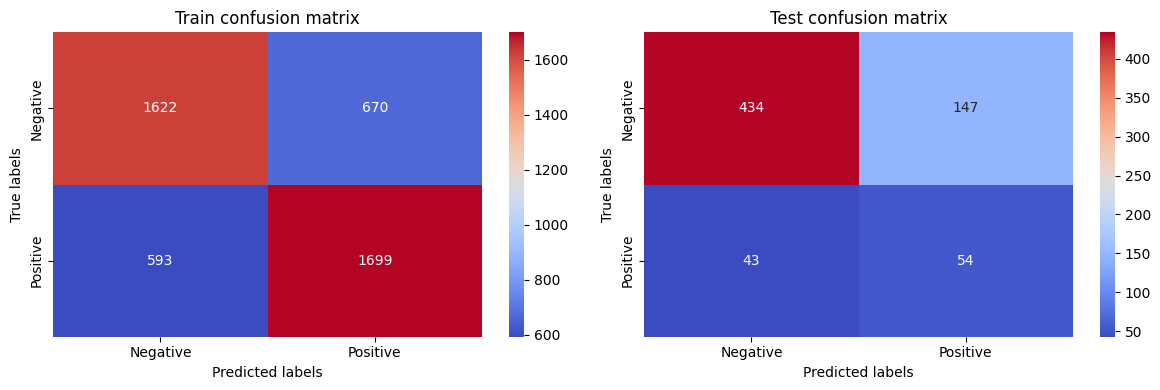


Train Classification Report
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.73228  | 0.707679 |   0.719769 | 2292        |
| 1            |    0.71718  | 0.741274 |   0.729028 | 2292        |
| accuracy     |    0.724476 | 0.724476 |   0.724476 |    0.724476 |
| macro avg    |    0.72473  | 0.724476 |   0.724399 | 4584        |
| weighted avg |    0.72473  | 0.724476 |   0.724399 | 4584        |

Test Classification Report 
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.909853 | 0.746988 |   0.820416 | 581        |
| 1            |    0.268657 | 0.556701 |   0.362416 |  97        |
| accuracy     |    0.719764 | 0.719764 |   0.719764 |   0.719764 |
| macro avg    |    0.589255 | 0.651844 |   0.591416 | 678        |
| weighted avg |    0.818119 | 0.719764 |   0.75489

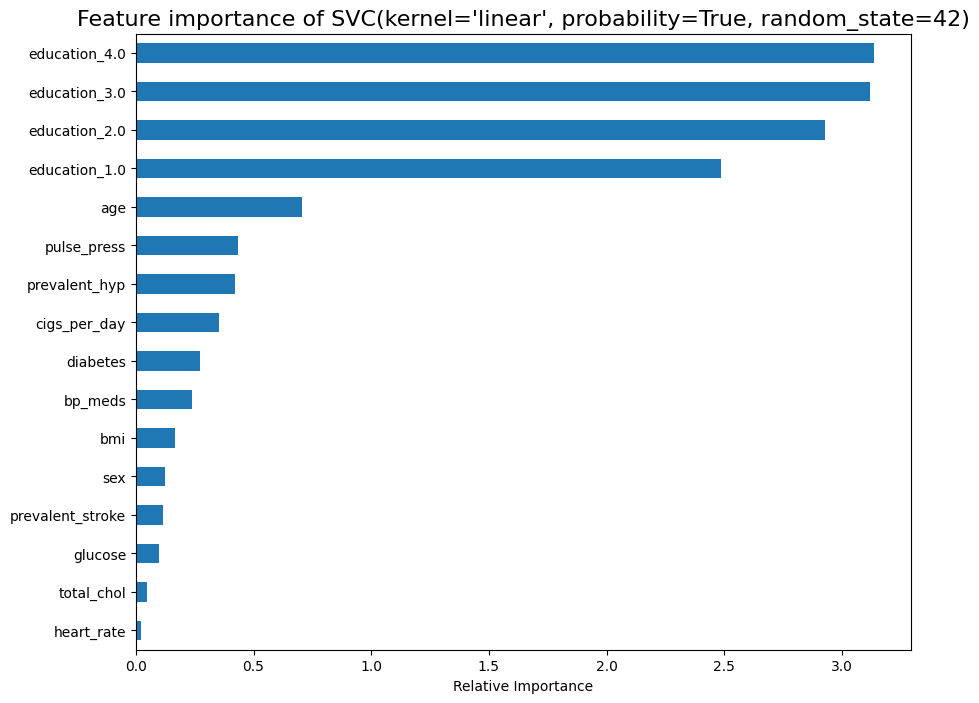

In [103]:
# Visualozing with evaluation matrix
sv_mat = evaluation_matrix(sv,X_smote,X_test,y_smote, y_test, X_smote.columns.tolist())
scores['SVM'] = sv_mat

In [104]:
scores

Logistic Regression  Logistic Regression tuned  \
Precision_train             0.711761                   0.711771   
Precision_test              0.824708                   0.824328   
Recall_train                0.711606                   0.711606   
Recall_test                 0.746313                   0.744838   
F1_score_train              0.711553                   0.711549   
F1_score_test               0.775134                   0.774013   
Accuracy_train              0.711606                   0.711606   
Accuracy_test               0.746313                   0.744838   
ROC_AUC_train               0.711761                   0.711771   
ROC_AUC_test                0.604107                   0.603217   

                 Decision Trees  Decision Trees tuned  Random Forest  \
Precision_train        1.000000              0.802823       1.000000   
Precision_test         0.775234              0.798051       0.795184   
Recall_train           1.000000              0.802356       1.000000   
Recall_test            0.731563              0.703540       0.820059   
F1_score_train         1.000000              0.802280       1.000000   
F1_score_test          0.751095              0.739449       0.805865   
Accuracy_train         1.000000              0.802356       1.000000   
Accuracy_test          0.731563              0.703540       0.820059   
ROC_AUC_train          1.000000              0.802823       1.000000   
ROC_AUC_test           0.535045              0.562260       0.594523   

                 Random Forest tuned       SVM  
Precision_train             0.992455  0.724730  
Precision_test              0.806576  0.818119  
Recall_train                0.992365  0.724476  
Recall_test                 0.818584  0.719764  
F1_score_train              0.992364  0.724399  
F1_score_test               0.812139  0.754891  
Accuracy_train              0.992365  0.724476  
Accuracy_test               0.818584  0.719764  
ROC_AUC_train               0.992455  0.724730  
ROC_AUC_test                0.612846  0.589255

#### 2. Cross- Validation & Hyperparameter Tuning

In [105]:
#Hyperparameter tuning
param_grid = {'C' : np.arange(0.1,10,0.1),
              'kernel' : ['rbf','linear','poly','sigmoid'],
              'degree' : np.arange(2,6,1)}

rsv = RepeatedStratifiedKFold(n_splits = 3, n_repeats = 4, random_state = 42)

svc2 = SVC(random_state = 42, probability = True)

grid = RandomizedSearchCV(svc2,param_grid, cv = rsv, n_iter = 10)

grid.fit(X_smote,y_smote)
print(f'The best parameters : {grid.best_params_}')

The best parameters : {'kernel': 'rbf', 'degree': 4, 'C': 8.2}


In [106]:
# Implementing model with the best parameters
svc = SVC(kernel = grid.best_params_['kernel'],
    degree = grid.best_params_['degree'],
    C = grid.best_params_['C'], random_state = 42,probability = True)


 The ROC AUC score for train : 0.9180532636596994
The ROC AUC score for test : 0.5378471995294425


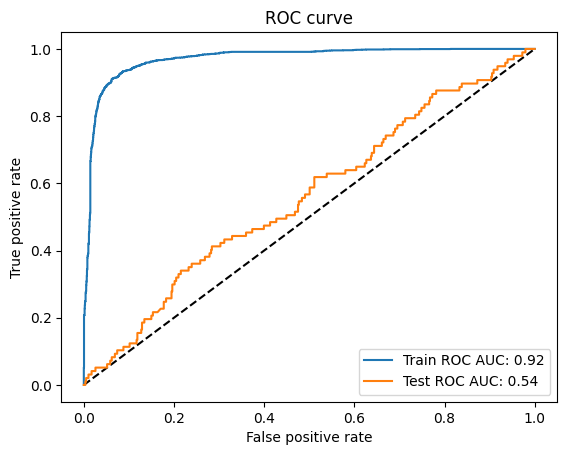


Confusion Matrix:


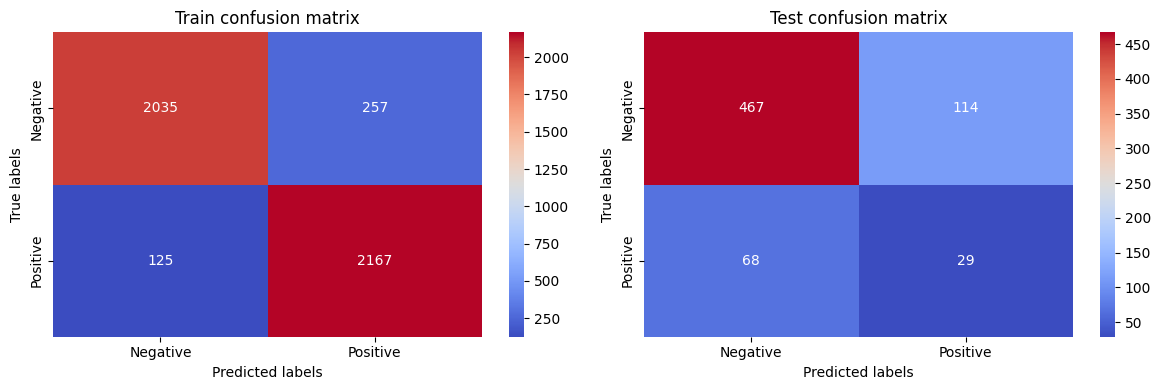


Train Classification Report
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.94213  | 0.887871 |   0.914196 | 2292        |
| 1            |    0.893977 | 0.945462 |   0.918999 | 2292        |
| accuracy     |    0.916667 | 0.916667 |   0.916667 |    0.916667 |
| macro avg    |    0.918053 | 0.916667 |   0.916598 | 4584        |
| weighted avg |    0.918053 | 0.916667 |   0.916598 | 4584        |

Test Classification Report 
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.872897 | 0.803787 |   0.836918 | 581        |
| 1            |    0.202797 | 0.298969 |   0.241667 |  97        |
| accuracy     |    0.731563 | 0.731563 |   0.731563 |   0.731563 |
| macro avg    |    0.537847 | 0.551378 |   0.539292 | 678        |
| weighted avg |    0.777027 | 0.731563 |   0.75175

In [107]:
# Visualizing with evaluation matrix
svc_mat = evaluation_matrix(svc,X_smote,X_test,y_smote,y_test,X_smote.columns.tolist())
scores['SVM tuned'] = svc_mat

##### Which hyperparameter optimization technique have you used and why?

The hyperparameter optimization technique used is RandomizedSearchCV. RandomizedSearchCV is a method that performs a random search over a specified parameter grid to find the best hyperparameters for a model. It is a popular method for hyperparameter tuning because it can be more efficient than exhaustive search methods like GridSearchCV when the parameter space is large.

The choice of hyperparameter optimization technique depends on various factors such as the size of the parameter space, the computational resources available, and the time constraints. RandomizedSearchCV can be a good choice when the parameter space is large and computational resources are limited.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [108]:
scores

Logistic Regression  Logistic Regression tuned  \
Precision_train             0.711761                   0.711771   
Precision_test              0.824708                   0.824328   
Recall_train                0.711606                   0.711606   
Recall_test                 0.746313                   0.744838   
F1_score_train              0.711553                   0.711549   
F1_score_test               0.775134                   0.774013   
Accuracy_train              0.711606                   0.711606   
Accuracy_test               0.746313                   0.744838   
ROC_AUC_train               0.711761                   0.711771   
ROC_AUC_test                0.604107                   0.603217   

                 Decision Trees  Decision Trees tuned  Random Forest  \
Precision_train        1.000000              0.802823       1.000000   
Precision_test         0.775234              0.798051       0.795184   
Recall_train           1.000000              0.802356       1.000000   
Recall_test            0.731563              0.703540       0.820059   
F1_score_train         1.000000              0.802280       1.000000   
F1_score_test          0.751095              0.739449       0.805865   
Accuracy_train         1.000000              0.802356       1.000000   
Accuracy_test          0.731563              0.703540       0.820059   
ROC_AUC_train          1.000000              0.802823       1.000000   
ROC_AUC_test           0.535045              0.562260       0.594523   

                 Random Forest tuned       SVM  SVM tuned  
Precision_train             0.992455  0.724730   0.918053  
Precision_test              0.806576  0.818119   0.777027  
Recall_train                0.992365  0.724476   0.916667  
Recall_test                 0.818584  0.719764   0.731563  
F1_score_train              0.992364  0.724399   0.916598  
F1_score_test               0.812139  0.754891   0.751756  
Accuracy_train              0.992365  0.724476   0.916667  
Accuracy_test               0.818584  0.719764   0.731563  
ROC_AUC_train               0.992455  0.724730   0.918053  
ROC_AUC_test                0.612846  0.589255   0.537847

While tuning the SVM model, improvements were evident in the training data scores. However, there was no corresponding improvement in the testing scores, indicating a potential issue of overfitting in the model.

### ML Model - 5 Xtreme Gradient Boosting

In [109]:
# Implementing the model
xgb = xgb.XGBClassifier()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


 The ROC AUC score for train : 0.9965337954939341
The ROC AUC score for test : 0.6108000814332247


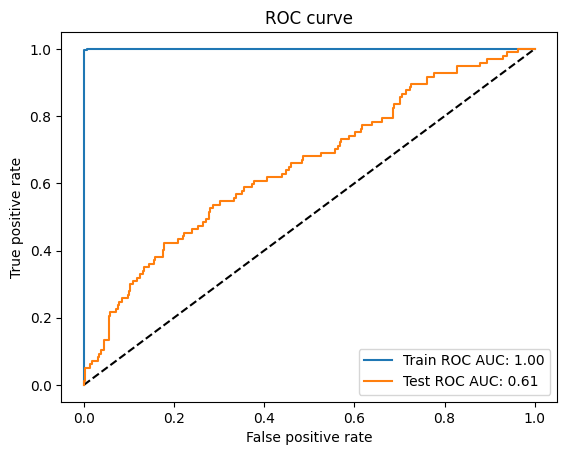


Confusion Matrix:


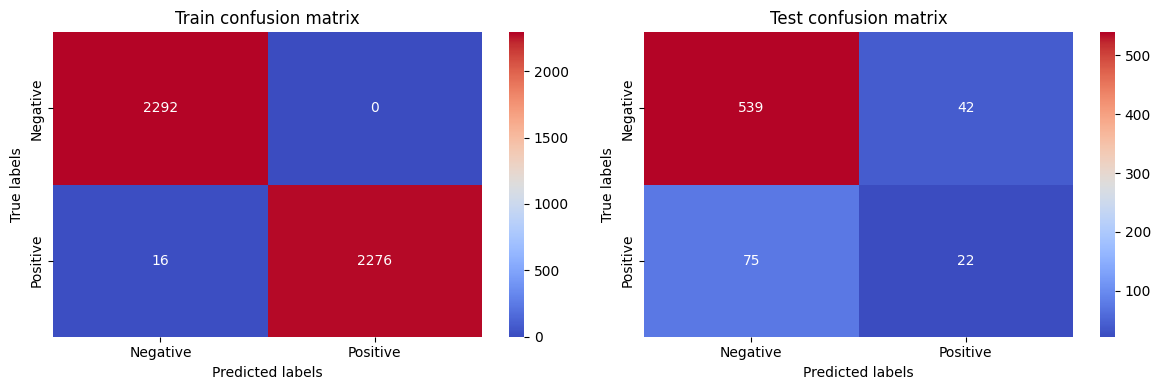


Train Classification Report
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.993068 | 1        |   0.996522 | 2292       |
| 1            |    1        | 0.993019 |   0.996497 | 2292       |
| accuracy     |    0.99651  | 0.99651  |   0.99651  |    0.99651 |
| macro avg    |    0.996534 | 0.99651  |   0.99651  | 4584       |
| weighted avg |    0.996534 | 0.99651  |   0.99651  | 4584       |

Test Classification Report 
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.87785  | 0.927711 |   0.902092 | 581        |
| 1            |    0.34375  | 0.226804 |   0.273292 |  97        |
| accuracy     |    0.827434 | 0.827434 |   0.827434 |   0.827434 |
| macro avg    |    0.6108   | 0.577257 |   0.587692 | 678        |
| weighted avg |    0.801438 | 0.827434 |   0.812131 | 678

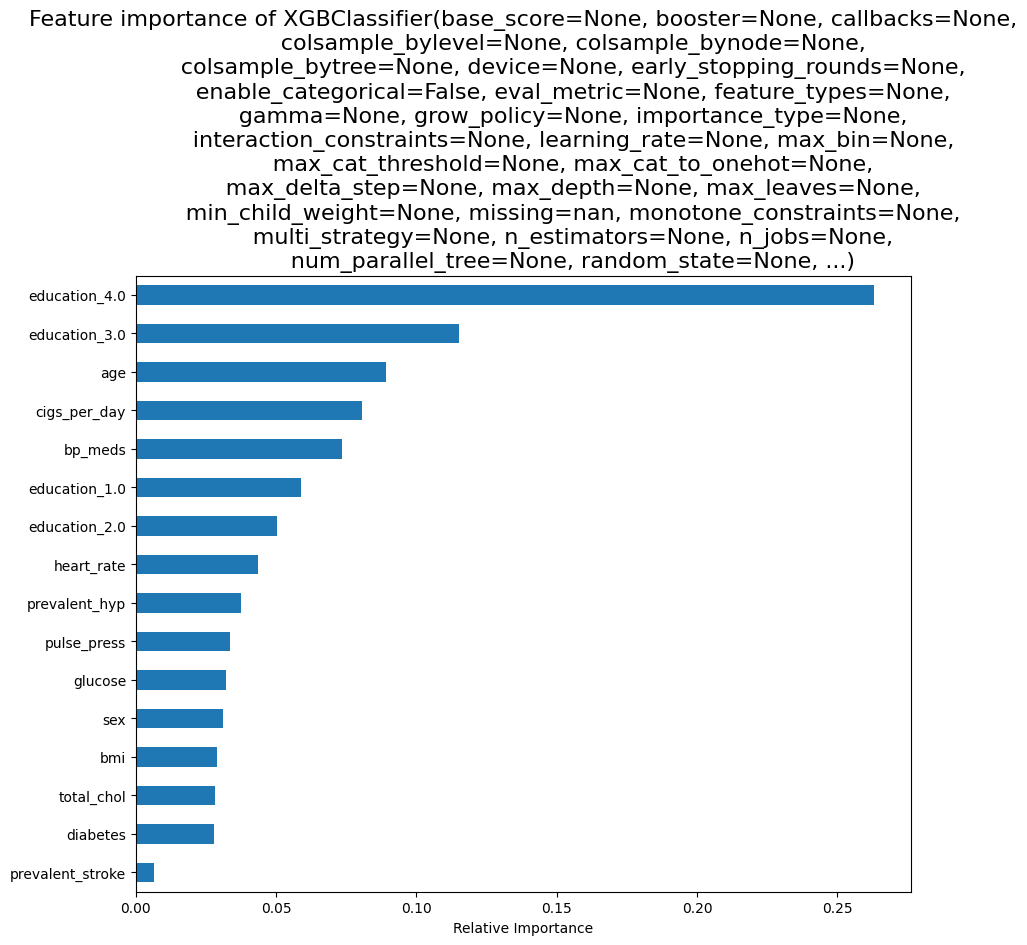

In [110]:
xgb_model = evaluation_matrix(xgb,X_smote,X_test,y_smote,y_test,X_smote.columns.tolist())
scores['Xtreme Gradient Boosting'] = xgb_model

In [111]:
scores

Logistic Regression  Logistic Regression tuned  \
Precision_train             0.711761                   0.711771   
Precision_test              0.824708                   0.824328   
Recall_train                0.711606                   0.711606   
Recall_test                 0.746313                   0.744838   
F1_score_train              0.711553                   0.711549   
F1_score_test               0.775134                   0.774013   
Accuracy_train              0.711606                   0.711606   
Accuracy_test               0.746313                   0.744838   
ROC_AUC_train               0.711761                   0.711771   
ROC_AUC_test                0.604107                   0.603217   

                 Decision Trees  Decision Trees tuned  Random Forest  \
Precision_train        1.000000              0.802823       1.000000   
Precision_test         0.775234              0.798051       0.795184   
Recall_train           1.000000              0.802356       1.000000   
Recall_test            0.731563              0.703540       0.820059   
F1_score_train         1.000000              0.802280       1.000000   
F1_score_test          0.751095              0.739449       0.805865   
Accuracy_train         1.000000              0.802356       1.000000   
Accuracy_test          0.731563              0.703540       0.820059   
ROC_AUC_train          1.000000              0.802823       1.000000   
ROC_AUC_test           0.535045              0.562260       0.594523   

                 Random Forest tuned       SVM  SVM tuned  \
Precision_train             0.992455  0.724730   0.918053   
Precision_test              0.806576  0.818119   0.777027   
Recall_train                0.992365  0.724476   0.916667   
Recall_test                 0.818584  0.719764   0.731563   
F1_score_train              0.992364  0.724399   0.916598   
F1_score_test               0.812139  0.754891   0.751756   
Accuracy_train              0.992365  0.724476   0.916667   
Accuracy_test               0.818584  0.719764   0.731563   
ROC_AUC_train               0.992455  0.724730   0.918053   
ROC_AUC_test                0.612846  0.589255   0.537847   

                 Xtreme Gradient Boosting  
Precision_train                  0.996534  
Precision_test                   0.801438  
Recall_train                     0.996510  
Recall_test                      0.827434  
F1_score_train                   0.996510  
F1_score_test                    0.812131  
Accuracy_train                   0.996510  
Accuracy_test                    0.827434  
ROC_AUC_train                    0.996534  
ROC_AUC_test                     0.610800

#### 2. Cross- Validation & Hyperparameter Tuning

In [112]:
#Applying hyperparameters to the model
param_grid = {'n_estimators' : np.arange(150,200,10),
              'max_depth' : np.arange(15,25,1),
              'learning_rate' : np.arange(0.02,0.3,0.01)}

# Initialize the model
xgb_best = XGBClassifier(random_state=0)

# Repeat stratified Kfold
rspv = RepeatedStratifiedKFold(n_repeats = 5, n_splits = 4, random_state = 42)

# Applying Randomized searh Cv
grid = RandomizedSearchCV(xgb_best,param_grid, cv = rspv, random_state = 42, n_iter = 10)

# fitting the above hyperparameters to the model
grid.fit(X_smote,y_smote)

# getting the best parameters
print(f'The best parameters of the model : {grid.best_params_}')

The best parameters of the model : {'n_estimators': 190, 'max_depth': 23, 'learning_rate': 0.21999999999999995}


In [113]:
# Applying the best parameters to the model
xgb_best = XGBClassifier(n_estimators = grid.best_params_['n_estimators'],
                  max_depth = grid.best_params_['max_depth'],
                  learning_rate = grid.best_params_['learning_rate'],
                  randon_state = 42)


 The ROC AUC score for train : 1.0
The ROC AUC score for test : 0.5961285327138985


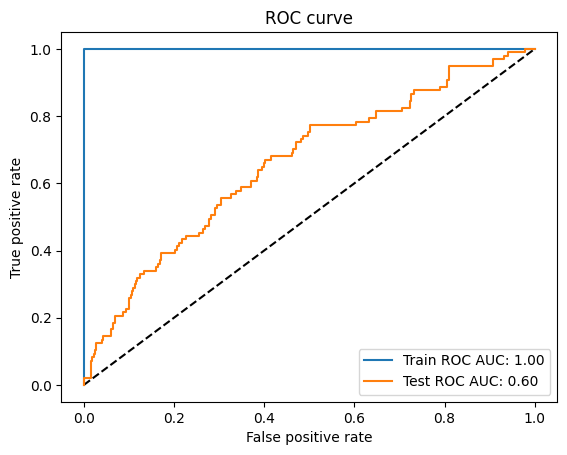


Confusion Matrix:


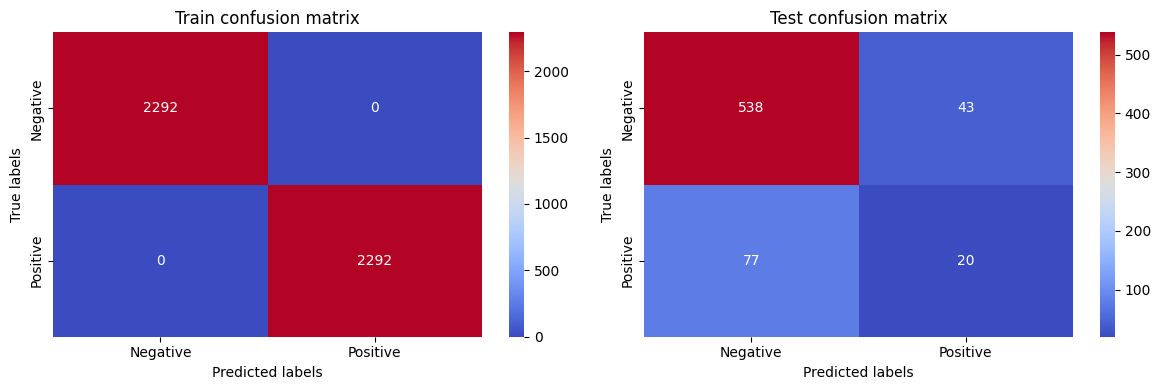


Train Classification Report
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |      2292 |
| 1            |           1 |        1 |          1 |      2292 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |      4584 |
| weighted avg |           1 |        1 |          1 |      4584 |

Test Classification Report 
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.874797 | 0.92599  |   0.899666 | 581        |
| 1            |    0.31746  | 0.206186 |   0.25     |  97        |
| accuracy     |    0.823009 | 0.823009 |   0.823009 |   0.823009 |
| macro avg    |    0.596129 | 0.566088 |   0.574833 | 678        |
| weighted avg |    0.79506  | 0.823009 |   0.806719 | 678       

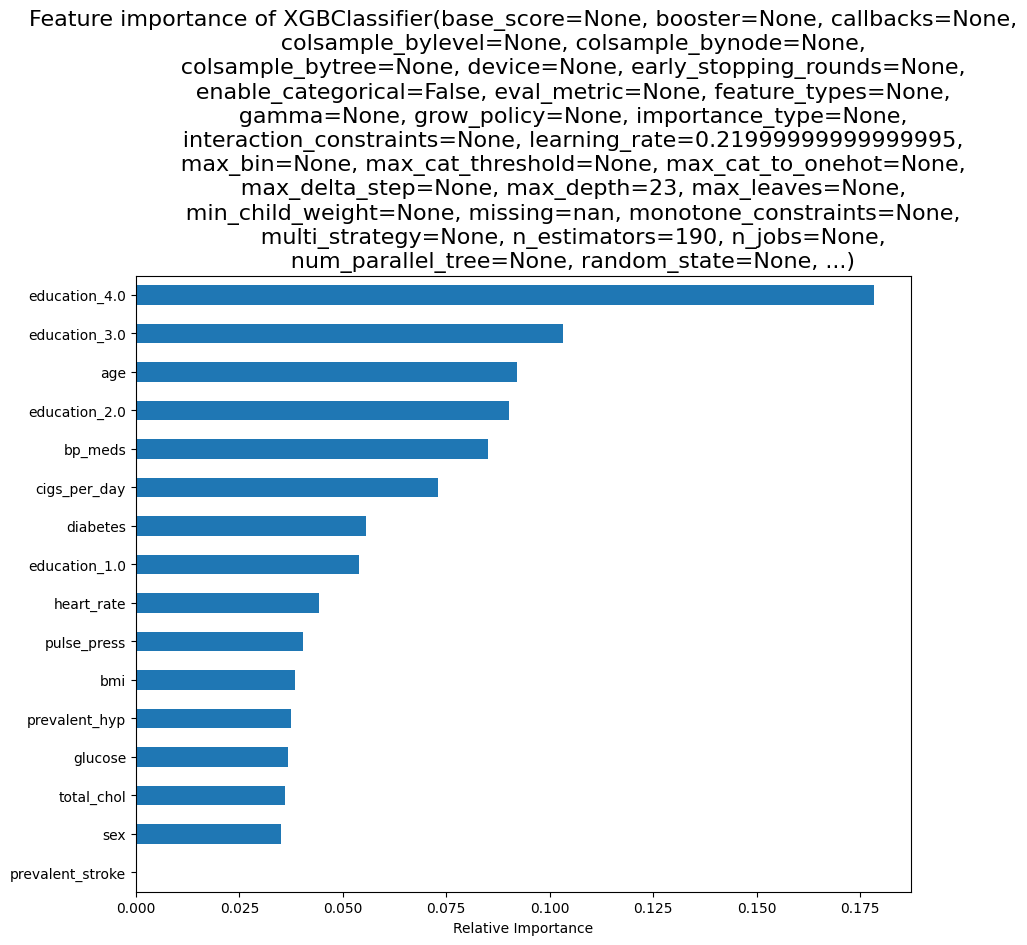

In [114]:
# Visulaizing the evaluation matrix
xgb_mat = evaluation_matrix(xgb_best, X_smote,X_test,y_smote,y_test,X_smote.columns.tolist())
scores['Xtreme Gradient Boosting tuned'] = xgb_mat

##### Which hyperparameter optimization technique have you used and why?

The hyperparameter optimization technique used is RandomizedSearchCV. RandomizedSearchCV is a method that performs a random search over a specified parameter grid to find the best hyperparameters for a model. It is a popular method for hyperparameter tuning because it can be more efficient than exhaustive search methods like GridSearchCV when the parameter space is large.

The choice of hyperparameter optimization technique depends on various factors such as the size of the parameter space, the computational resources available, and the time constraints. RandomizedSearchCV can be a good choice when the parameter space is large and computational resources are limited.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [115]:
scores

Logistic Regression  Logistic Regression tuned  \
Precision_train             0.711761                   0.711771   
Precision_test              0.824708                   0.824328   
Recall_train                0.711606                   0.711606   
Recall_test                 0.746313                   0.744838   
F1_score_train              0.711553                   0.711549   
F1_score_test               0.775134                   0.774013   
Accuracy_train              0.711606                   0.711606   
Accuracy_test               0.746313                   0.744838   
ROC_AUC_train               0.711761                   0.711771   
ROC_AUC_test                0.604107                   0.603217   

                 Decision Trees  Decision Trees tuned  Random Forest  \
Precision_train        1.000000              0.802823       1.000000   
Precision_test         0.775234              0.798051       0.795184   
Recall_train           1.000000              0.802356       1.000000   
Recall_test            0.731563              0.703540       0.820059   
F1_score_train         1.000000              0.802280       1.000000   
F1_score_test          0.751095              0.739449       0.805865   
Accuracy_train         1.000000              0.802356       1.000000   
Accuracy_test          0.731563              0.703540       0.820059   
ROC_AUC_train          1.000000              0.802823       1.000000   
ROC_AUC_test           0.535045              0.562260       0.594523   

                 Random Forest tuned       SVM  SVM tuned  \
Precision_train             0.992455  0.724730   0.918053   
Precision_test              0.806576  0.818119   0.777027   
Recall_train                0.992365  0.724476   0.916667   
Recall_test                 0.818584  0.719764   0.731563   
F1_score_train              0.992364  0.724399   0.916598   
F1_score_test               0.812139  0.754891   0.751756   
Accuracy_train              0.992365  0.724476   0.916667   
Accuracy_test               0.818584  0.719764   0.731563   
ROC_AUC_train               0.992455  0.724730   0.918053   
ROC_AUC_test                0.612846  0.589255   0.537847   

                 Xtreme Gradient Boosting  Xtreme Gradient Boosting tuned  
Precision_train                  0.996534                        1.000000  
Precision_test                   0.801438                        0.795060  
Recall_train                     0.996510                        1.000000  
Recall_test                      0.827434                        0.823009  
F1_score_train                   0.996510                        1.000000  
F1_score_test                    0.812131                        0.806719  
Accuracy_train                   0.996510                        1.000000  
Accuracy_test                    0.827434                        0.823009  
ROC_AUC_train                    0.996534                        1.000000  
ROC_AUC_test                     0.610800                        0.596129

After tuning the model with the best parameters, we can observe that there is no improvement in the model's scores.

### ML Model - 6 Naive Bayes

In [116]:
# Implementing the model
gb = GaussianNB()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


 The ROC AUC score for train : 0.667868652856699
The ROC AUC score for test : 0.5726902173913043


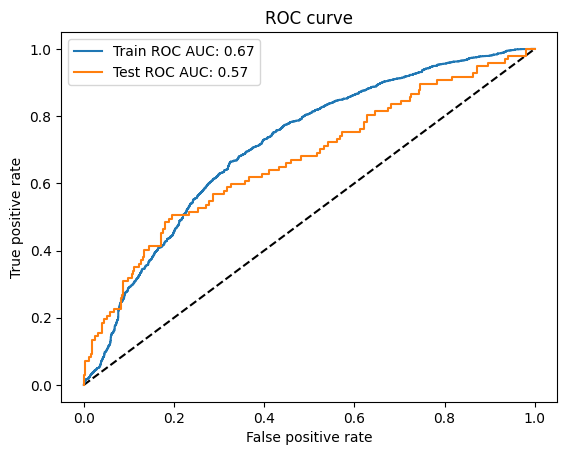


Confusion Matrix:


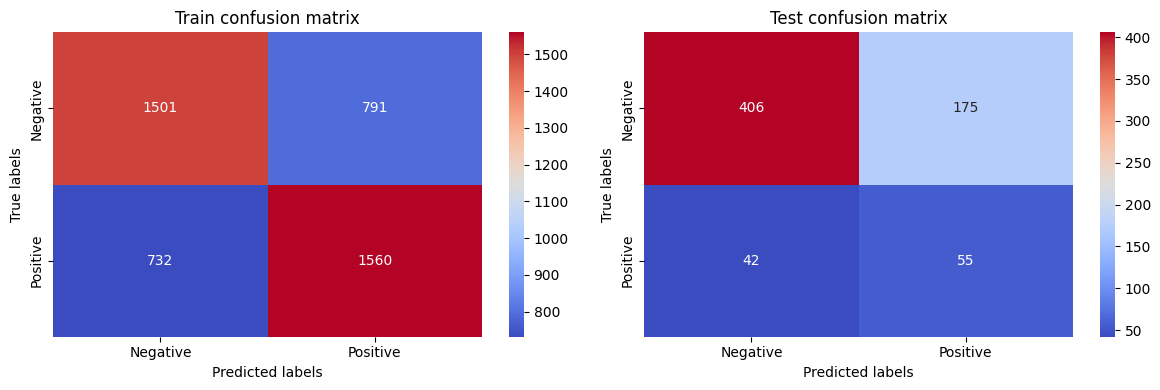


Train Classification Report
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.67219  | 0.654887 |   0.663425 | 2292        |
| 1            |    0.663547 | 0.680628 |   0.671979 | 2292        |
| accuracy     |    0.667757 | 0.667757 |   0.667757 |    0.667757 |
| macro avg    |    0.667869 | 0.667757 |   0.667702 | 4584        |
| weighted avg |    0.667869 | 0.667757 |   0.667702 | 4584        |

Test Classification Report 
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.90625  | 0.698795 |   0.789116 | 581        |
| 1            |    0.23913  | 0.56701  |   0.336391 |  97        |
| accuracy     |    0.679941 | 0.679941 |   0.679941 |   0.679941 |
| macro avg    |    0.57269  | 0.632903 |   0.562754 | 678        |
| weighted avg |    0.810807 | 0.679941 |   0.72434

In [117]:
gb_mat = evaluation_matrix(gb,X_smote,X_test,y_smote,y_test,X_smote.columns.tolist())
scores['Naive Bayes'] = gb_mat

In [118]:
scores

Logistic Regression  Logistic Regression tuned  \
Precision_train             0.711761                   0.711771   
Precision_test              0.824708                   0.824328   
Recall_train                0.711606                   0.711606   
Recall_test                 0.746313                   0.744838   
F1_score_train              0.711553                   0.711549   
F1_score_test               0.775134                   0.774013   
Accuracy_train              0.711606                   0.711606   
Accuracy_test               0.746313                   0.744838   
ROC_AUC_train               0.711761                   0.711771   
ROC_AUC_test                0.604107                   0.603217   

                 Decision Trees  Decision Trees tuned  Random Forest  \
Precision_train        1.000000              0.802823       1.000000   
Precision_test         0.775234              0.798051       0.795184   
Recall_train           1.000000              0.802356       1.000000   
Recall_test            0.731563              0.703540       0.820059   
F1_score_train         1.000000              0.802280       1.000000   
F1_score_test          0.751095              0.739449       0.805865   
Accuracy_train         1.000000              0.802356       1.000000   
Accuracy_test          0.731563              0.703540       0.820059   
ROC_AUC_train          1.000000              0.802823       1.000000   
ROC_AUC_test           0.535045              0.562260       0.594523   

                 Random Forest tuned       SVM  SVM tuned  \
Precision_train             0.992455  0.724730   0.918053   
Precision_test              0.806576  0.818119   0.777027   
Recall_train                0.992365  0.724476   0.916667   
Recall_test                 0.818584  0.719764   0.731563   
F1_score_train              0.992364  0.724399   0.916598   
F1_score_test               0.812139  0.754891   0.751756   
Accuracy_train              0.992365  0.724476   0.916667   
Accuracy_test               0.818584  0.719764   0.731563   
ROC_AUC_train               0.992455  0.724730   0.918053   
ROC_AUC_test                0.612846  0.589255   0.537847   

                 Xtreme Gradient Boosting  Xtreme Gradient Boosting tuned  \
Precision_train                  0.996534                        1.000000   
Precision_test                   0.801438                        0.795060   
Recall_train                     0.996510                        1.000000   
Recall_test                      0.827434                        0.823009   
F1_score_train                   0.996510                        1.000000   
F1_score_test                    0.812131                        0.806719   
Accuracy_train                   0.996510                        1.000000   
Accuracy_test                    0.827434                        0.823009   
ROC_AUC_train                    0.996534                        1.000000   
ROC_AUC_test                     0.610800                        0.596129   

                 Naive Bayes  
Precision_train     0.667869  
Precision_test      0.810807  
Recall_train        0.667757  
Recall_test         0.679941  
F1_score_train      0.667702  
F1_score_test       0.724345  
Accuracy_train      0.667757  
Accuracy_test       0.679941  
ROC_AUC_train       0.667869  
ROC_AUC_test        0.572690

#### 2. Cross- Validation & Hyperparameter Tuning

In [119]:
# Implementing hyper parameter tuning to the model
param_grid = {'var_smoothing' : np.logspace(0,-9,num = 100)}

# Initializing the model
nb_2 = GaussianNB()

# repeated stratifiedkfold
rpsv = RepeatedStratifiedKFold(n_repeats = 5, n_splits = 4, random_state = 42)

# implementing the randomized search cv
grid = RandomizedSearchCV(nb_2, param_grid, cv = rpsv, n_jobs = -1)

grid.fit(X_smote,y_smote)

# printing the best parameters of the model
print(f'The best parameters of the model {grid.best_params_}')

The best parameters of the model {'var_smoothing': 0.12328467394420659}


In [120]:
# Implementing model with the best parameters
naive_bayes = GaussianNB(var_smoothing = grid.best_params_['var_smoothing'])


 The ROC AUC score for train : 0.6830840436276557
The ROC AUC score for test : 0.5688453159041393


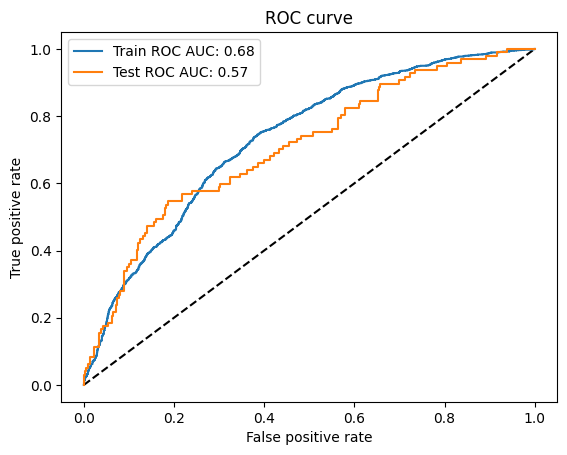


Confusion Matrix:


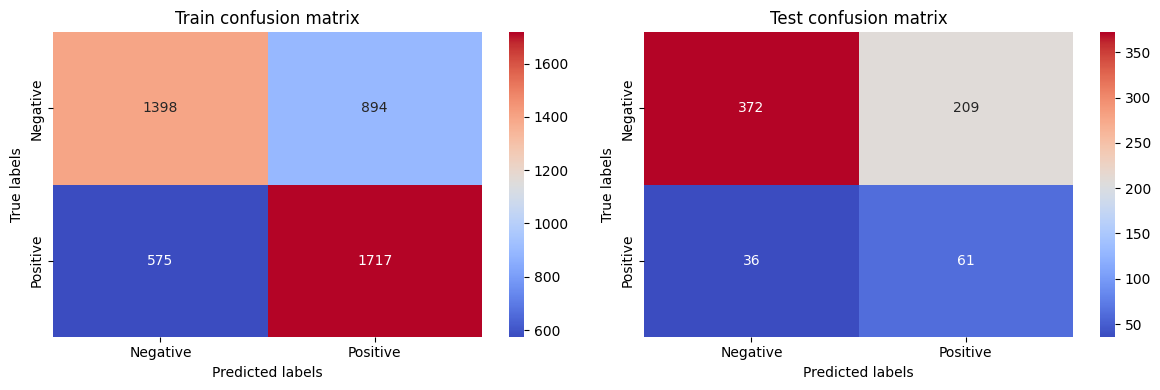


Train Classification Report
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.708566 | 0.609948 |   0.655569 | 2292        |
| 1            |    0.657602 | 0.749127 |   0.700388 | 2292        |
| accuracy     |    0.679538 | 0.679538 |   0.679538 |    0.679538 |
| macro avg    |    0.683084 | 0.679538 |   0.677978 | 4584        |
| weighted avg |    0.683084 | 0.679538 |   0.677978 | 4584        |

Test Classification Report 
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.911765 | 0.640275 |   0.752275 | 581        |
| 1            |    0.225926 | 0.628866 |   0.332425 |  97        |
| accuracy     |    0.638643 | 0.638643 |   0.638643 |   0.638643 |
| macro avg    |    0.568845 | 0.634571 |   0.54235  | 678        |
| weighted avg |    0.813643 | 0.638643 |   0.69220

In [121]:
# Visualizing on the evaluation matrix
nb_mat = evaluation_matrix(naive_bayes, X_smote,X_test,y_smote,y_test,X_smote.columns.tolist())
scores['Naive Bayes tuned'] = nb_mat

##### Which hyperparameter optimization technique have you used and why?

The hyperparameter optimization technique used is RandomizedSearchCV. RandomizedSearchCV is a method that performs a random search over a specified parameter grid to find the best hyperparameters for a model. It is a popular method for hyperparameter tuning because it can be more efficient than exhaustive search methods like GridSearchCV when the parameter space is large.

The choice of hyperparameter optimization technique depends on various factors such as the size of the parameter space, the computational resources available, and the time constraints. RandomizedSearchCV can be a good choice when the parameter space is large and computational resources are limited.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [122]:
scores

Logistic Regression  Logistic Regression tuned  \
Precision_train             0.711761                   0.711771   
Precision_test              0.824708                   0.824328   
Recall_train                0.711606                   0.711606   
Recall_test                 0.746313                   0.744838   
F1_score_train              0.711553                   0.711549   
F1_score_test               0.775134                   0.774013   
Accuracy_train              0.711606                   0.711606   
Accuracy_test               0.746313                   0.744838   
ROC_AUC_train               0.711761                   0.711771   
ROC_AUC_test                0.604107                   0.603217   

                 Decision Trees  Decision Trees tuned  Random Forest  \
Precision_train        1.000000              0.802823       1.000000   
Precision_test         0.775234              0.798051       0.795184   
Recall_train           1.000000              0.802356       1.000000   
Recall_test            0.731563              0.703540       0.820059   
F1_score_train         1.000000              0.802280       1.000000   
F1_score_test          0.751095              0.739449       0.805865   
Accuracy_train         1.000000              0.802356       1.000000   
Accuracy_test          0.731563              0.703540       0.820059   
ROC_AUC_train          1.000000              0.802823       1.000000   
ROC_AUC_test           0.535045              0.562260       0.594523   

                 Random Forest tuned       SVM  SVM tuned  \
Precision_train             0.992455  0.724730   0.918053   
Precision_test              0.806576  0.818119   0.777027   
Recall_train                0.992365  0.724476   0.916667   
Recall_test                 0.818584  0.719764   0.731563   
F1_score_train              0.992364  0.724399   0.916598   
F1_score_test               0.812139  0.754891   0.751756   
Accuracy_train              0.992365  0.724476   0.916667   
Accuracy_test               0.818584  0.719764   0.731563   
ROC_AUC_train               0.992455  0.724730   0.918053   
ROC_AUC_test                0.612846  0.589255   0.537847   

                 Xtreme Gradient Boosting  Xtreme Gradient Boosting tuned  \
Precision_train                  0.996534                        1.000000   
Precision_test                   0.801438                        0.795060   
Recall_train                     0.996510                        1.000000   
Recall_test                      0.827434                        0.823009   
F1_score_train                   0.996510                        1.000000   
F1_score_test                    0.812131                        0.806719   
Accuracy_train                   0.996510                        1.000000   
Accuracy_test                    0.827434                        0.823009   
ROC_AUC_train                    0.996534                        1.000000   
ROC_AUC_test                     0.610800                        0.596129   

                 Naive Bayes  Naive Bayes tuned  
Precision_train     0.667869           0.683084  
Precision_test      0.810807           0.813643  
Recall_train        0.667757           0.679538  
Recall_test         0.679941           0.638643  
F1_score_train      0.667702           0.677978  
F1_score_test       0.724345           0.692208  
Accuracy_train      0.667757           0.679538  
Accuracy_test       0.679941           0.638643  
ROC_AUC_train       0.667869           0.683084  
ROC_AUC_test        0.572690           0.568845

Despite tuning the model, there is no discernible improvement in the precision, recall, accuracy, F1 score, or ROC AUC scores of the model.

In [123]:
print(scores.to_markdown())

|                 |   Logistic Regression |   Logistic Regression tuned |   Decision Trees |   Decision Trees tuned |   Random Forest |   Random Forest tuned |      SVM |   SVM tuned |   Xtreme Gradient Boosting |   Xtreme Gradient Boosting tuned |   Naive Bayes |   Naive Bayes tuned |
|:----------------|----------------------:|----------------------------:|-----------------:|-----------------------:|----------------:|----------------------:|---------:|------------:|---------------------------:|---------------------------------:|--------------:|--------------------:|
| Precision_train |              0.711761 |                    0.711771 |         1        |               0.802823 |        1        |              0.992455 | 0.72473  |    0.918053 |                   0.996534 |                         1        |      0.667869 |            0.683084 |
| Precision_test  |              0.824708 |                    0.824328 |         0.775234 |               0.798051 |        0.795184 |    

### Plots of Scores

In [124]:
# Creating a function to plot bar chart of the scores
def plot_score(x, y,parameter):
  """This function takes the row indexes from the models list of the respective scores and returns the bar chart of the scores """
  models = list(scores.columns)
  train = scores.iloc[x,:]
  test = scores.iloc[y,:]
  X = np.arange(len(models))

  # Plotting the barchart
  plt.figure(figsize = (16,8))
  plt.bar(X - 0.2, height = train, width = 0.4, label = 'Train ' + parameter)
  plt.bar(X + 0.2, height = test, width = 0.4, label  = 'Test ' + parameter)

  plt.xticks(X, models, rotation  = 90)
  plt.ylabel(parameter + ' scores')
  plt.title(parameter +' scores for every model')
  plt.legend()
  plt.show()


#### Precision score

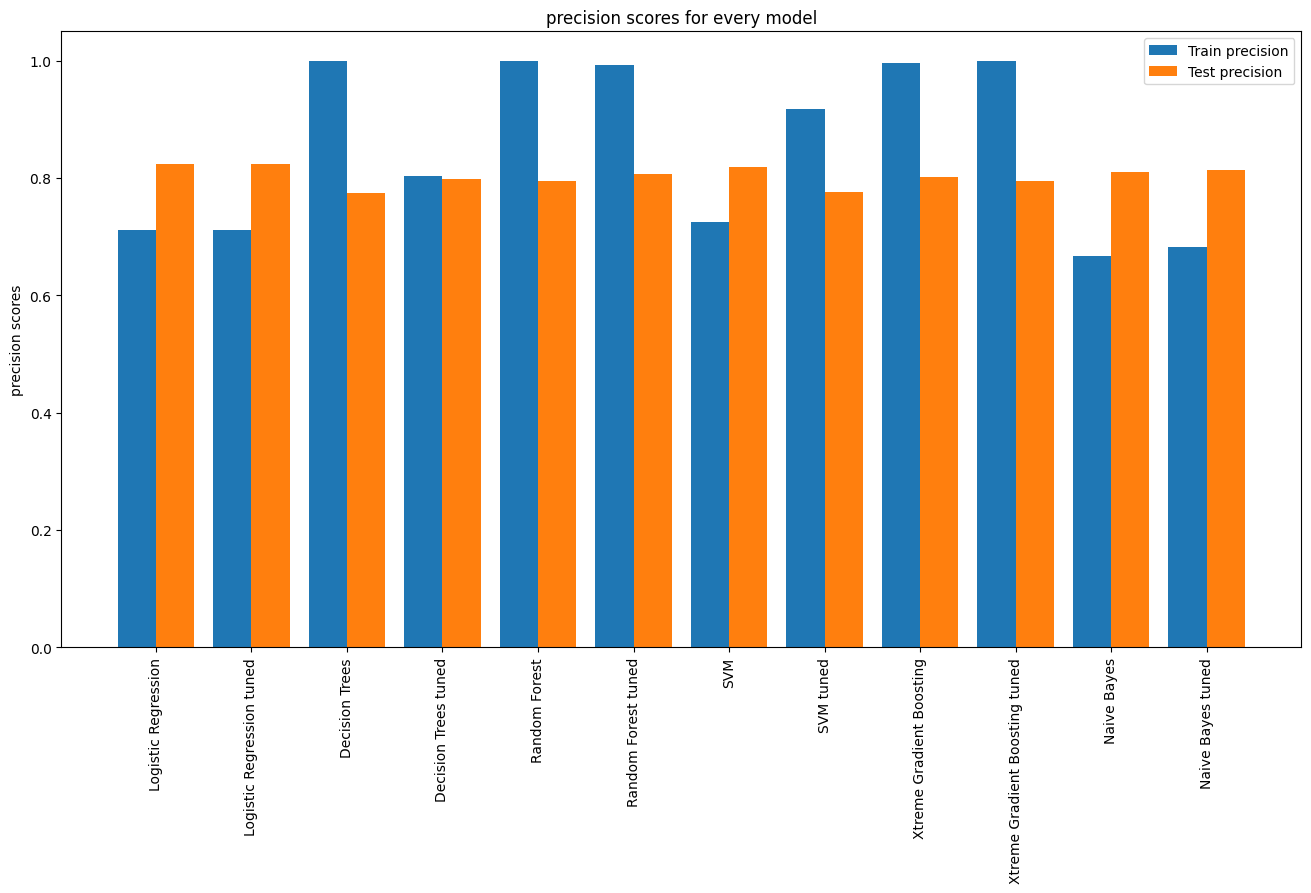

In [125]:
# Plotting the precision scores for every model
plot_score(0,1,'precision')   #0,1 are the indexes of the precision train,test in the scores

#### Recall score

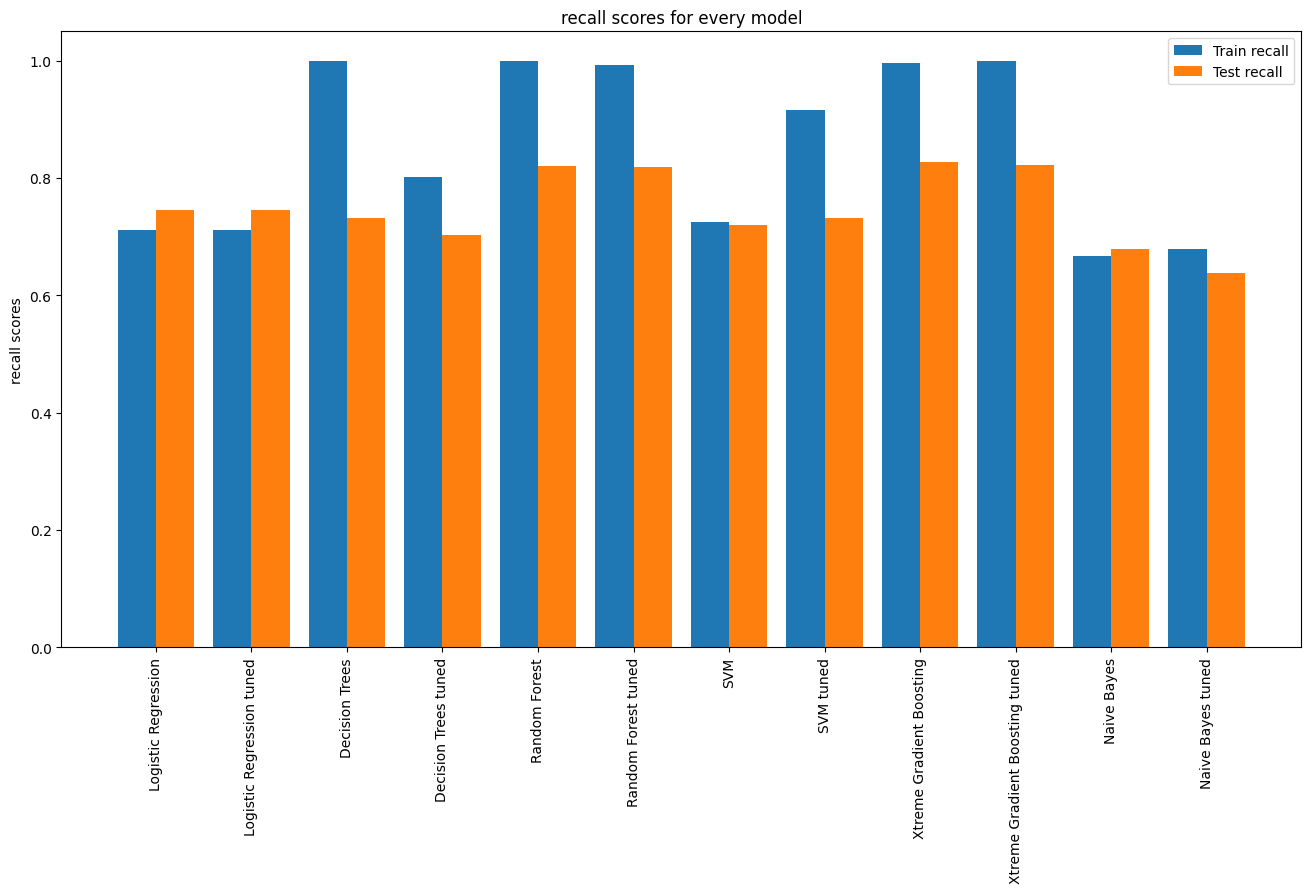

In [126]:
plot_score(2,3,'recall') #2 ,3 are the indexes of train,test recall scores in the scores

#### f1_score

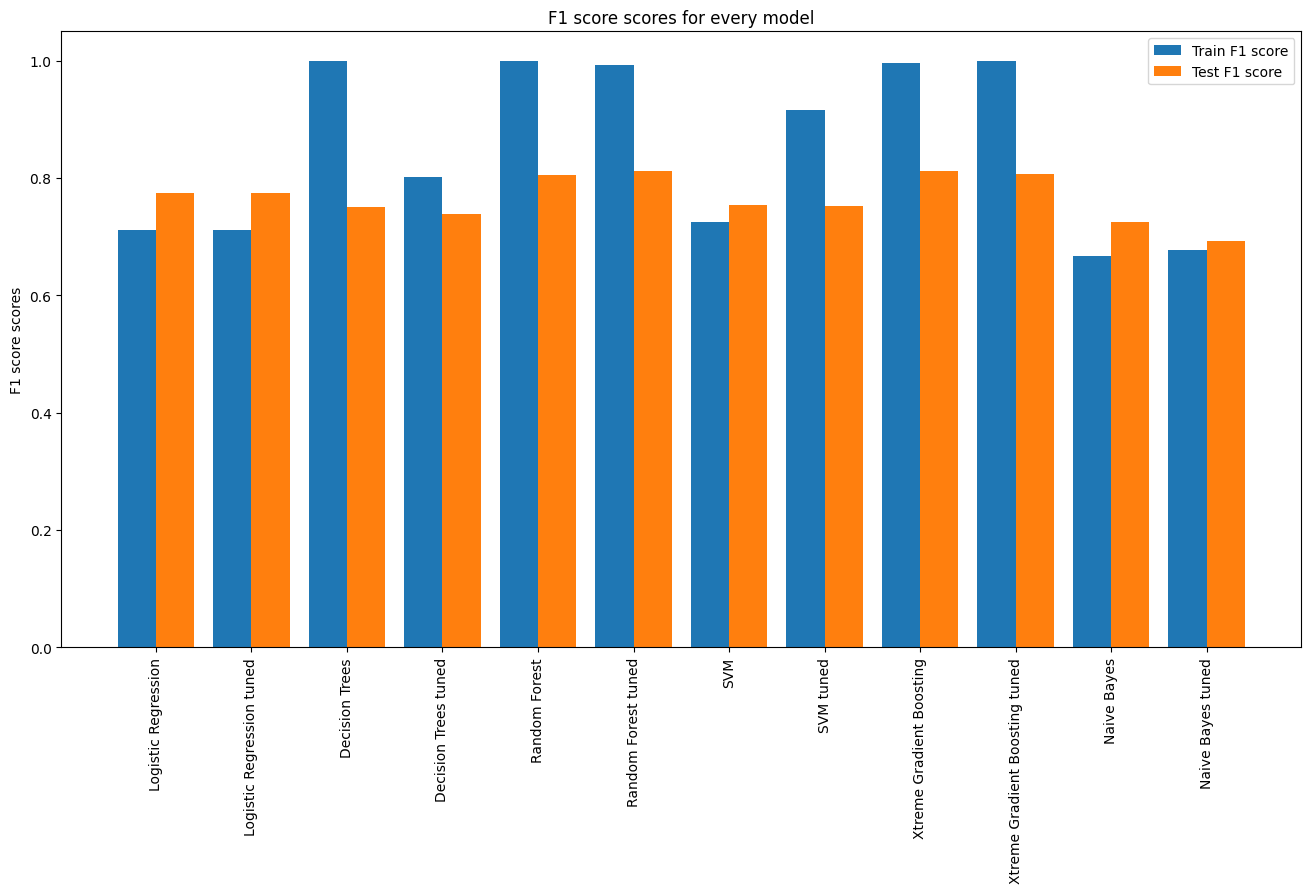

In [127]:
plot_score(4,5,'F1 score') #4, 5 are the indexes of train, test f1_scores in scores

#### Accuracy score


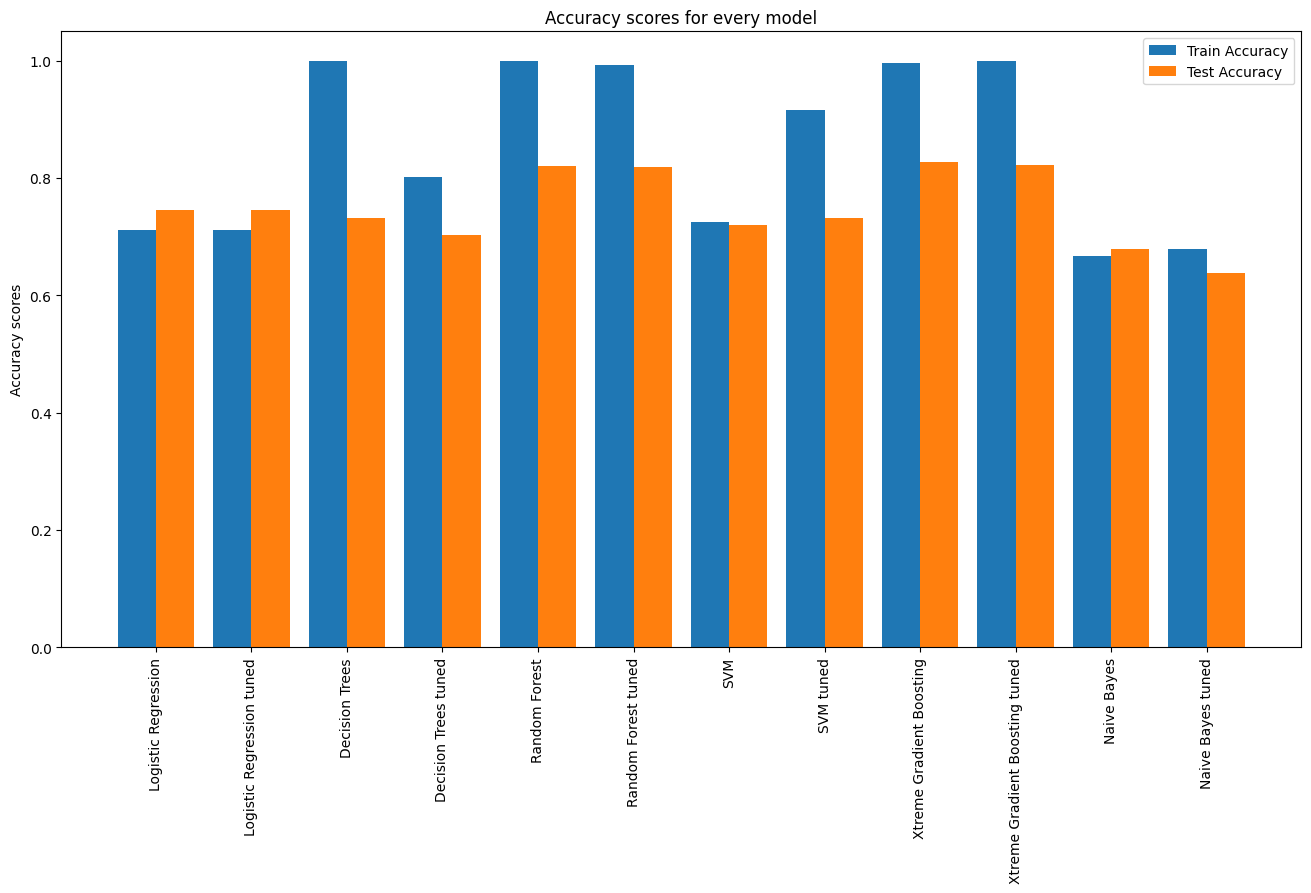

In [128]:
plot_score(6,7,'Accuracy')  # 6, 7 are the indexes of train, test accuracy scores in the scores

#### ROC AUC score

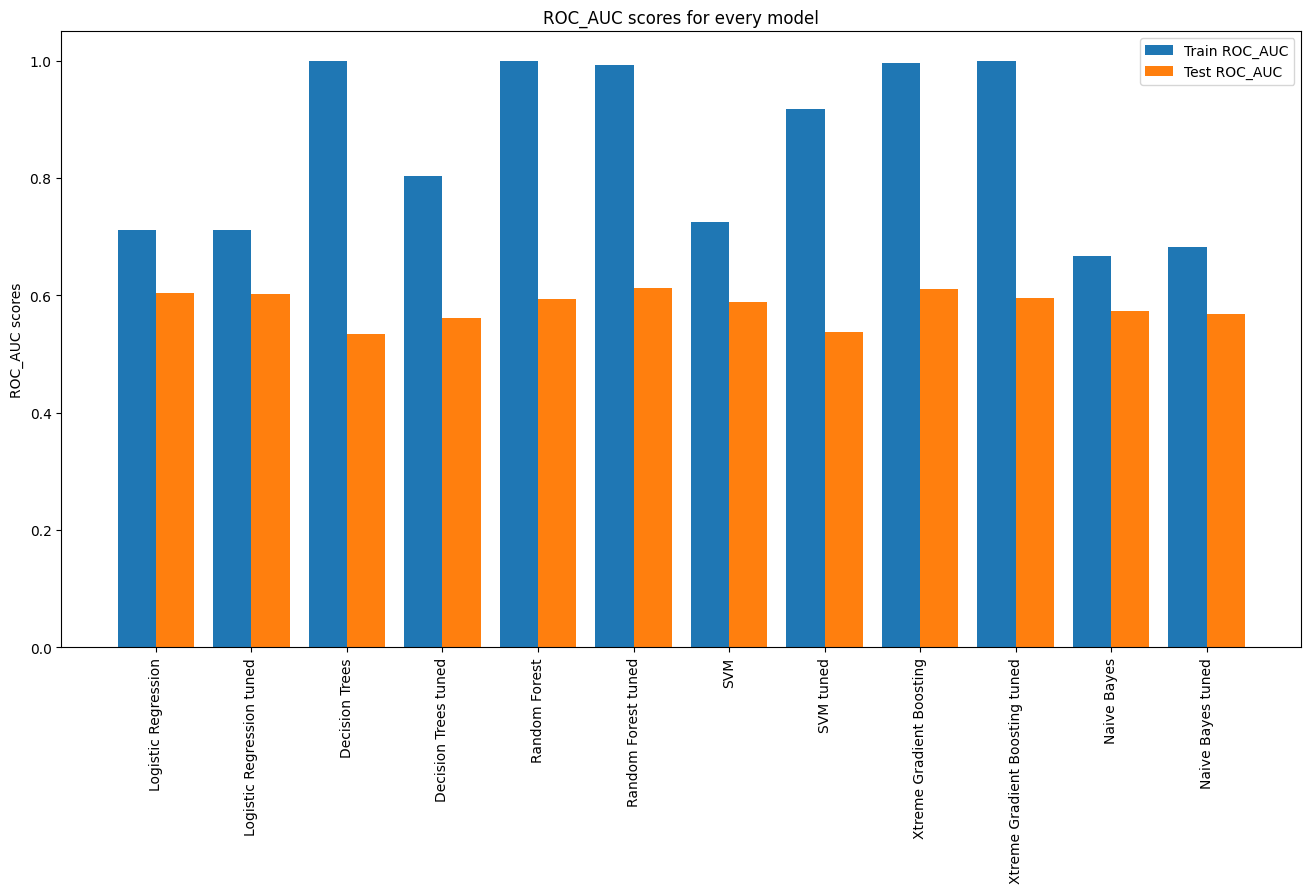

In [129]:
plot_score(8,9,'ROC_AUC') # 8, 9 are the indexes of the train, test roc auc scores in the scores

#### Selection of the best model

In [130]:
scores

Logistic Regression  Logistic Regression tuned  \
Precision_train             0.711761                   0.711771   
Precision_test              0.824708                   0.824328   
Recall_train                0.711606                   0.711606   
Recall_test                 0.746313                   0.744838   
F1_score_train              0.711553                   0.711549   
F1_score_test               0.775134                   0.774013   
Accuracy_train              0.711606                   0.711606   
Accuracy_test               0.746313                   0.744838   
ROC_AUC_train               0.711761                   0.711771   
ROC_AUC_test                0.604107                   0.603217   

                 Decision Trees  Decision Trees tuned  Random Forest  \
Precision_train        1.000000              0.802823       1.000000   
Precision_test         0.775234              0.798051       0.795184   
Recall_train           1.000000              0.802356       1.000000   
Recall_test            0.731563              0.703540       0.820059   
F1_score_train         1.000000              0.802280       1.000000   
F1_score_test          0.751095              0.739449       0.805865   
Accuracy_train         1.000000              0.802356       1.000000   
Accuracy_test          0.731563              0.703540       0.820059   
ROC_AUC_train          1.000000              0.802823       1.000000   
ROC_AUC_test           0.535045              0.562260       0.594523   

                 Random Forest tuned       SVM  SVM tuned  \
Precision_train             0.992455  0.724730   0.918053   
Precision_test              0.806576  0.818119   0.777027   
Recall_train                0.992365  0.724476   0.916667   
Recall_test                 0.818584  0.719764   0.731563   
F1_score_train              0.992364  0.724399   0.916598   
F1_score_test               0.812139  0.754891   0.751756   
Accuracy_train              0.992365  0.724476   0.916667   
Accuracy_test               0.818584  0.719764   0.731563   
ROC_AUC_train               0.992455  0.724730   0.918053   
ROC_AUC_test                0.612846  0.589255   0.537847   

                 Xtreme Gradient Boosting  Xtreme Gradient Boosting tuned  \
Precision_train                  0.996534                        1.000000   
Precision_test                   0.801438                        0.795060   
Recall_train                     0.996510                        1.000000   
Recall_test                      0.827434                        0.823009   
F1_score_train                   0.996510                        1.000000   
F1_score_test                    0.812131                        0.806719   
Accuracy_train                   0.996510                        1.000000   
Accuracy_test                    0.827434                        0.823009   
ROC_AUC_train                    0.996534                        1.000000   
ROC_AUC_test                     0.610800                        0.596129   

                 Naive Bayes  Naive Bayes tuned  
Precision_train     0.667869           0.683084  
Precision_test      0.810807           0.813643  
Recall_train        0.667757           0.679538  
Recall_test         0.679941           0.638643  
F1_score_train      0.667702           0.677978  
F1_score_test       0.724345           0.692208  
Accuracy_train      0.667757           0.679538  
Accuracy_test       0.679941           0.638643  
ROC_AUC_train       0.667869           0.683084  
ROC_AUC_test        0.572690           0.568845

Below, we will consider those models whose scores are lesser than 0.95 and will remove those models which are overfitted.



In [131]:
# Removing those models whose scores are greater than 0.95
scores_t = scores.T   # Taking a transpose of the column
model_names = scores_t.index
lst = []
for i,value in enumerate(scores_t.values):
  if (value >= 0.95).any():                    #condition of the scores
    lst.append((value,model_names[i]))

print(lst)

[(array([1.        , 0.77523419, 1.        , 0.73156342, 1.        ,
       0.75109459, 1.        , 0.73156342, 1.        , 0.53504497]), 'Decision Trees'), (array([1.        , 0.79518374, 1.        , 0.820059  , 1.        ,
       0.80586534, 1.        , 0.820059  , 1.        , 0.59452329]), 'Random Forest'), (array([0.99245483, 0.806576  , 0.99236475, 0.81858407, 0.9923644 ,
       0.81213885, 0.99236475, 0.81858407, 0.99245483, 0.6128458 ]), 'Random Forest tuned'), (array([0.9965338 , 0.8014376 , 0.9965096 , 0.82743363, 0.99650956,
       0.81213097, 0.9965096 , 0.82743363, 0.9965338 , 0.61080008]), 'Xtreme Gradient Boosting'), (array([1.        , 0.79505983, 1.        , 0.82300885, 1.        ,
       0.8067193 , 1.        , 0.82300885, 1.        , 0.59612853]), 'Xtreme Gradient Boosting tuned')]


In [132]:
# assigning new df of scores after filtering the scores
scores_final = scores_t.drop(pd.DataFrame(lst)[1], axis = 0)
scores_final

Precision_train  Precision_test  Recall_train  \
Logistic Regression               0.711761        0.824708      0.711606   
Logistic Regression tuned         0.711771        0.824328      0.711606   
Decision Trees tuned              0.802823        0.798051      0.802356   
SVM                               0.724730        0.818119      0.724476   
SVM tuned                         0.918053        0.777027      0.916667   
Naive Bayes                       0.667869        0.810807      0.667757   
Naive Bayes tuned                 0.683084        0.813643      0.679538   

                           Recall_test  F1_score_train  F1_score_test  \
Logistic Regression           0.746313        0.711553       0.775134   
Logistic Regression tuned     0.744838        0.711549       0.774013   
Decision Trees tuned          0.703540        0.802280       0.739449   
SVM                           0.719764        0.724399       0.754891   
SVM tuned                     0.731563        0.916598       0.751756   
Naive Bayes                   0.679941        0.667702       0.724345   
Naive Bayes tuned             0.638643        0.677978       0.692208   

                           Accuracy_train  Accuracy_test  ROC_AUC_train  \
Logistic Regression              0.711606       0.746313       0.711761   
Logistic Regression tuned        0.711606       0.744838       0.711771   
Decision Trees tuned             0.802356       0.703540       0.802823   
SVM                              0.724476       0.719764       0.724730   
SVM tuned                        0.916667       0.731563       0.918053   
Naive Bayes                      0.667757       0.679941       0.667869   
Naive Bayes tuned                0.679538       0.638643       0.683084   

                           ROC_AUC_test  
Logistic Regression            0.604107  
Logistic Regression tuned      0.603217  
Decision Trees tuned           0.562260  
SVM                            0.589255  
SVM tuned                      0.537847  
Naive Bayes                    0.572690  
Naive Bayes tuned              0.568845

In [133]:
# defining a function to get the best
def best_model(df, metrics):
  best_models = {}
  for metric in metrics:
    best_score = df[metric +'_test'].max()
    model_name  = df[df[metric + '_test'] == best_score].index[0]
    best_models[metric] = model_name
  return best_models

In [134]:
metrics = ['Precision','Recall','F1_score','Accuracy','ROC_AUC']

final_models = best_model(scores_final, metrics)

for metric,best_model in final_models.items():
  print(f"{metric} - {best_model} - {scores_final[metric+'_test'][best_model].round(4)}")


Precision - Logistic Regression - 0.8247
Recall - Logistic Regression - 0.7463
F1_score - Logistic Regression - 0.7751
Accuracy - Logistic Regression - 0.7463
ROC_AUC - Logistic Regression - 0.6041


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

After a thorough assessment of the possible impacts of false positives and false negatives within the scope of our business objectives, I have made the deliberate choice to prioritize the "recall" metric as the primary evaluation criterion for our CHD risk prediction model. In essence, our key aim is to maximize the identification of true positives, accurately recognizing individuals with CHD risk, while concurrently minimizing the occurrence of false negatives—instances where patients with actual CHD risk might be incorrectly classified as not at risk. This approach ensures that our primary focus is on capturing as many patients with CHD risk as possible, even if it results in the inclusion of some false positives in the process.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

After a comprehensive evaluation of various machine learning models using the Framingham Heart Study dataset, our final selection for the prediction model is logistic regression. This decision was driven by the model's outstanding performance in terms of recall, which assesses its ability to accurately identify patients at risk of Coronary Heart Disease (CHD). In our assessment, logistic regression outperformed the other models, yielding the highest recall score.

Our choice to prioritize recall as the primary evaluation metric stems from its crucial role in fulfilling our business objectives. Correctly identifying individuals with CHD risk is paramount, and high recall aids in achieving this goal. We emphasize capturing as many patients at risk as possible, even if it leads to some false positives. In summary, we are confident that logistic regression is the optimal choice to support our specific requirements and contribute positively to our business outcomes.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

#### **SHAP(Shapely Additive Explanations)**

In [135]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 7.2 MB/s eta 0:00:00


In [136]:
# importing shap
import shap

In [148]:
# summarize the background dataset using k-means clustering
X_summary = shap.kmeans(X, 100)

# create an explainer object
explainer = shap.KernelExplainer(lr.predict_proba, X_summary)

# compute the SHAP values for all the samples in the test data
shap_values = explainer.shap_values(X_test)

  0%|          | 0/678 [00:00<?, ?it/s]

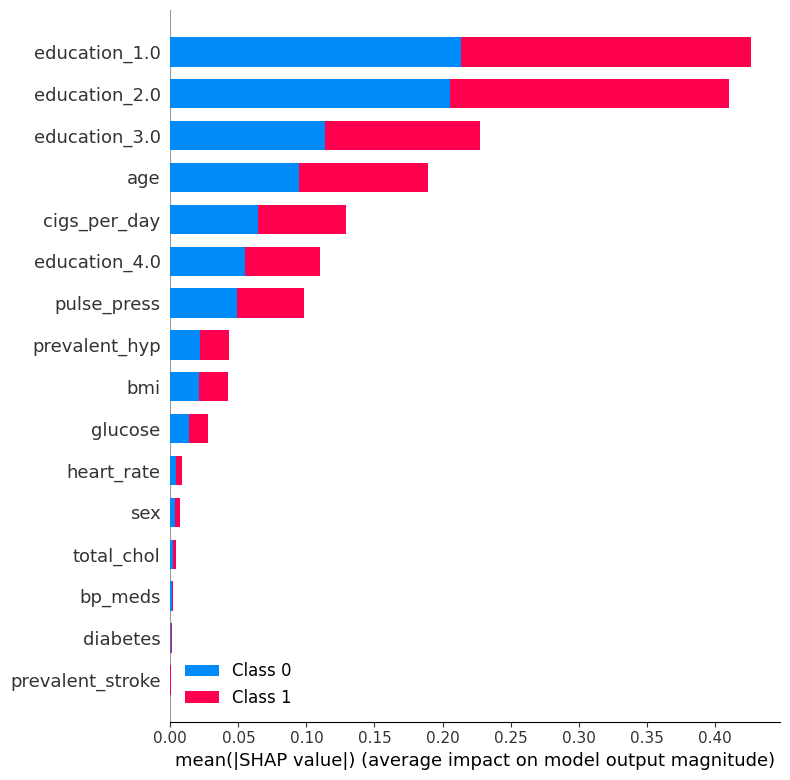

In [149]:
shap.summary_plot(shap_values, X_test,)

SHAP (SHapley Additive exPlanations) is a powerful and versatile tool for model interpretation and explaining the output of machine learning models. It's based on cooperative game theory and the concept of Shapley values.

A SHAP value for a particular feature of an instance represents the contribution of that feature to the difference between the model's prediction for that instance and the average prediction for all instances.

This bar plot illustrates the mean SHAP values corresponding to each feature, providing insights into their average impact on the magnitude of the model output. However, it doesn't explicitly indicate whether the impact is positive or negative on the predictions.


## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [138]:
# importing pickle
import pickle
# saving the best model
pickle.dump(lr,open('lr.pkl','wb'))


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [139]:
# Load the File and predict unseen data.
with open('lr.pkl','rb') as file:
  model_pickle = pickle.load(file)

# picking new testing point
new_point = X_test.iloc[38]
new_point = np.array(new_point).reshape(1,-1)
new_point

array([[-0.86296335,  0.        ,  1.0675686 ,  0.        ,  0.        ,
         0.        ,  0.        , -0.3729292 , -0.78807952,  0.42783785,
        -1.35332724,  0.        ,  1.        ,  0.        ,  0.        ,
         0.39634855]])

In [140]:
# predicting the new point
model_pickle.predict(new_point)

array([0])

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In conclusion, this project demonstrated the potential of machine learning techniques to accurately predict the 10-year risk of future coronary heart disease (CHD) in patients using data from an ongoing cardiovascular study. Key points from this project include:

- Careful data preprocessing and transformation improved the performance of machine learning models and enabled more accurate predictions.
- Feature selection was important for identifying the most relevant predictors of CHD risk.
- The Logistic Regression model was chosen as the final prediction model due to its high recall score.
- Techniques such as SMOTE combined with Tomek links undersampling and standard scalar scaling were used to handle imbalanced data and improve model performance.
- This project provides a valuable example of how machine learning techniques can be applied to real-world problems to achieve positive business impact.

Overall, this project highlights the importance of careful data preparation and analysis in machine learning projects. By taking the time to clean and transform the data, select relevant features, and choose an appropriate model, it is possible to achieve accurate predictions and support decision-making in a wide range of domains.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***